In [1]:
%%capture
!pip install gcpds-cv-pykit

In [2]:
!pip list | grep gcpds

gcpds-cv-pykit                        0.1.0.43


In [3]:
import torch
from gcpds_cv_pykit.datasets import FeetMamitas
from gcpds_cv_pykit.baseline.dataloaders import Segmentation_DataLoader
from gcpds_cv_pykit.visuals import random_sample_visualization
from gcpds_cv_pykit.baseline.trainers import SegmentationModel_Trainer
from gcpds_cv_pykit.baseline.models import DeepLabV3Plus
from gcpds_cv_pykit.baseline import PerformanceModels

In [4]:
# Set a seed
seed = 42

torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)

In [5]:
FeetMamitas()

100%|██████████| 35.4M/35.4M [00:00<00:00, 164MB/s]

Extracting files...


Path to downloaded dataset files: /root/.cache/kagglehub/datasets/lucasiturriago/feet-mamitas/versions/3
Dataset copied to: /content/datasets/feet-mamitas
Original download folder '/root/.cache/kagglehub/datasets/lucasiturriago/feet-mamitas/versions/3' deleted.


'/content/datasets/feet-mamitas'

In [ ]:
config = {"Dir of dataset": "./datasets/feet-mamitas", "Batch size": 36, "Image size": (256,256), "Input size": (3,256,256),
          "Number of classes": 1, "Single class train": None, "Single class test": None, "Single class valid": None, "Images folder": "images",
          "Data augmentation": True, "Epochs": 61, "Device": "cuda:0", "AMixPre": True, "Model": "DeepLabV3+", "Backbone": "resnet34",
          "Pretrained": True, "Activation function": "sigmoid", "Loss function": "DICE", "Save results": True, "Train phases": True,
          "Wandb monitoring": ["WandB_API_Key","MasterTests","FeetMamitas-DeepLabV3+-DICE"]}

In [7]:
train_dataset = Segmentation_DataLoader(config["Dir of dataset"], config["Batch size"], config["Image size"], config["Number of classes"],
                                        "Train", config["Single class train"], config["Data augmentation"], config["Images folder"])

Searching for images in: datasets/feet-mamitas/Train/images
Supported formats: *.png, *.jpg, *.jpeg
Number of image files found: 248


Organizing masks: 100%|██████████| 248/248 [00:00<00:00, 145338.46it/s]


In [8]:
valid_dataset = Segmentation_DataLoader(config["Dir of dataset"], config["Batch size"], config["Image size"], config["Number of classes"],
                                        "Valid", config["Single class valid"], config["Data augmentation"], config["Images folder"])

Searching for images in: datasets/feet-mamitas/Valid/images
Supported formats: *.png, *.jpg, *.jpeg
Number of image files found: 71


Organizing masks: 100%|██████████| 71/71 [00:00<00:00, 152715.68it/s]


In [9]:
test_dataset = Segmentation_DataLoader(config["Dir of dataset"], config["Batch size"], config["Image size"], config["Number of classes"],
                                        "Test", config["Single class test"], config["Data augmentation"], config["Images folder"])

Searching for images in: datasets/feet-mamitas/Test/images
Supported formats: *.png, *.jpg, *.jpeg
Number of image files found: 35


Organizing masks: 100%|██████████| 35/35 [00:00<00:00, 114777.67it/s]


Images in the batch: torch.Size([36, 3, 256, 256]), Masks in the batch: torch.Size([36, 1, 256, 256])


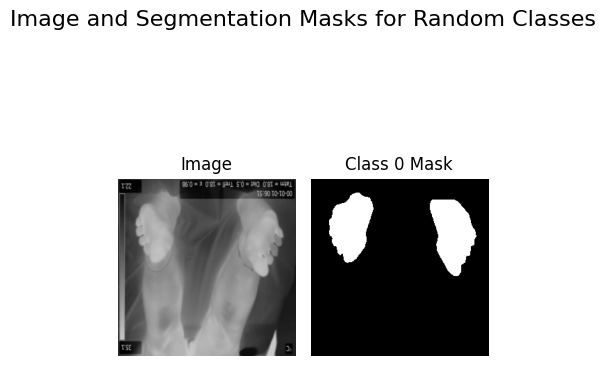

In [10]:
random_sample_visualization(dataset=train_dataset, num_classes=config["Number of classes"],
                            single_class=config['Single class train'],type='baseline')

### DICE Loss

Automatic Mixed Precision (AMP) enabled.
DEVICE INFORMATION
Current device: cuda:0
Device type: cuda
CUDA available: Yes
CUDA version: 12.4
Number of CUDA devices: 1
Current CUDA device index: 0
Current CUDA device name: NVIDIA A100-SXM4-40GB
GPU Memory - Allocated: 0.00 GB
GPU Memory - Reserved: 0.00 GB
GPU Memory - Total: 39.56 GB
GPU Compute Capability: 8.0
GPU Multiprocessors: 108
PyTorch version: 2.6.0+cu124


Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 47.5MB/s]
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: liturriago (gcpds) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin



Epoch 1/61
Training phase 1


Validation Epoch 1/61: 100%|██████████| 2/2 [00:00<00:00,  3.04it/s]


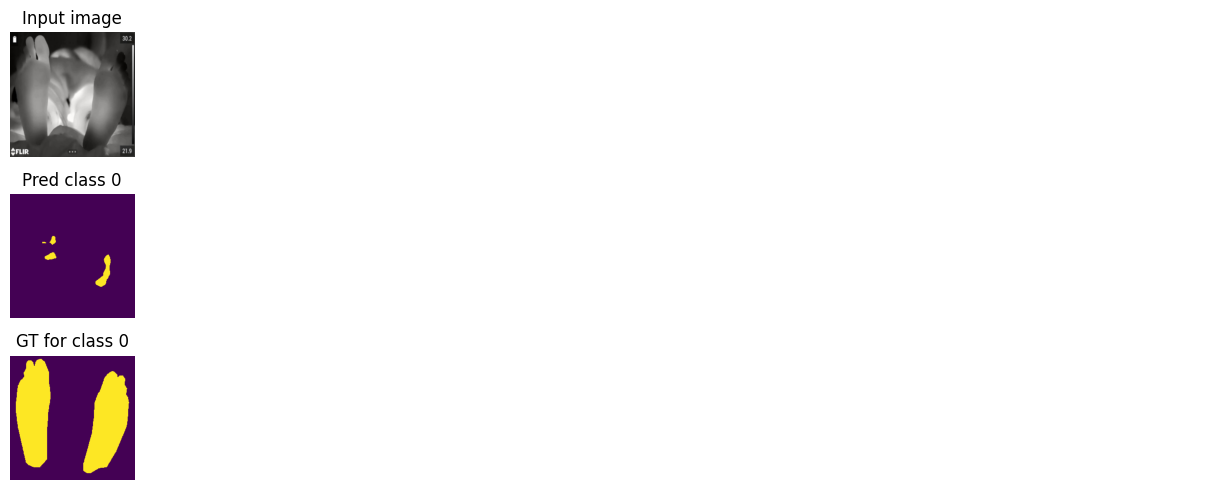

Train loss: 0.64961 | Time: 0m 5s | Val loss: 0.67616
Train_DICE_avg: 0.42879 | Train_Jaccard_avg: 0.28292 | Train_Sensitivity_avg: 0.31120 | Train_Specificity_avg: 0.86042 
Class 0 - Train_DICE: 0.42879 | Train_Jaccard: 0.28292 | Train_Sensitivity: 0.31120 | Train_Specificity: 0.86042 
Val_DICE_avg: 0.35552 | Val_Jaccard_avg: 0.23294 | Val_Sensitivity_avg: 0.53478 | Val_Specificity_avg: 0.79904 
Class 0 - Val_DICE: 0.35552 | Val_Jaccard: 0.23294 | Val_Sensitivity: 0.53478 | Val_Specificity: 0.79904 

Epoch 2/61


Validation Epoch 2/61: 100%|██████████| 2/2 [00:00<00:00,  2.74it/s]


Train loss: 0.58252 | Time: 0m 9s | Val loss: 0.66607
Train_DICE_avg: 0.50613 | Train_Jaccard_avg: 0.34904 | Train_Sensitivity_avg: 0.37064 | Train_Specificity_avg: 0.92972 
Class 0 - Train_DICE: 0.50613 | Train_Jaccard: 0.34904 | Train_Sensitivity: 0.37064 | Train_Specificity: 0.92972 
Val_DICE_avg: 0.54602 | Val_Jaccard_avg: 0.38581 | Val_Sensitivity_avg: 0.43854 | Val_Specificity_avg: 0.89680 
Class 0 - Val_DICE: 0.54602 | Val_Jaccard: 0.38581 | Val_Sensitivity: 0.43854 | Val_Specificity: 0.89680 

Epoch 3/61


Validation Epoch 3/61: 100%|██████████| 2/2 [00:00<00:00,  2.75it/s]


Train loss: 0.54123 | Time: 0m 14s | Val loss: 0.63727
Train_DICE_avg: 0.52458 | Train_Jaccard_avg: 0.36648 | Train_Sensitivity_avg: 0.38753 | Train_Specificity_avg: 0.93846 
Class 0 - Train_DICE: 0.52458 | Train_Jaccard: 0.36648 | Train_Sensitivity: 0.38753 | Train_Specificity: 0.93846 
Val_DICE_avg: 0.57758 | Val_Jaccard_avg: 0.41740 | Val_Sensitivity_avg: 0.47288 | Val_Specificity_avg: 0.90646 
Class 0 - Val_DICE: 0.57758 | Val_Jaccard: 0.41740 | Val_Sensitivity: 0.47288 | Val_Specificity: 0.90646 

Epoch 4/61


Validation Epoch 4/61: 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]


Train loss: 0.50917 | Time: 0m 17s | Val loss: 0.58484
Train_DICE_avg: 0.54701 | Train_Jaccard_avg: 0.38777 | Train_Sensitivity_avg: 0.40972 | Train_Specificity_avg: 0.94480 
Class 0 - Train_DICE: 0.54701 | Train_Jaccard: 0.38777 | Train_Sensitivity: 0.40972 | Train_Specificity: 0.94480 
Val_DICE_avg: 0.64280 | Val_Jaccard_avg: 0.48575 | Val_Sensitivity_avg: 0.57756 | Val_Specificity_avg: 0.90837 
Class 0 - Val_DICE: 0.64280 | Val_Jaccard: 0.48575 | Val_Sensitivity: 0.57756 | Val_Specificity: 0.90837 

Epoch 5/61


Validation Epoch 5/61: 100%|██████████| 2/2 [00:00<00:00,  3.19it/s]


Train loss: 0.48126 | Time: 0m 21s | Val loss: 0.51205
Train_DICE_avg: 0.57882 | Train_Jaccard_avg: 0.41946 | Train_Sensitivity_avg: 0.44284 | Train_Specificity_avg: 0.95266 
Class 0 - Train_DICE: 0.57882 | Train_Jaccard: 0.41946 | Train_Sensitivity: 0.44284 | Train_Specificity: 0.95266 
Val_DICE_avg: 0.68217 | Val_Jaccard_avg: 0.53181 | Val_Sensitivity_avg: 0.63003 | Val_Specificity_avg: 0.91998 
Class 0 - Val_DICE: 0.68217 | Val_Jaccard: 0.53181 | Val_Sensitivity: 0.63003 | Val_Specificity: 0.91998 

Epoch 6/61


Validation Epoch 6/61: 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]


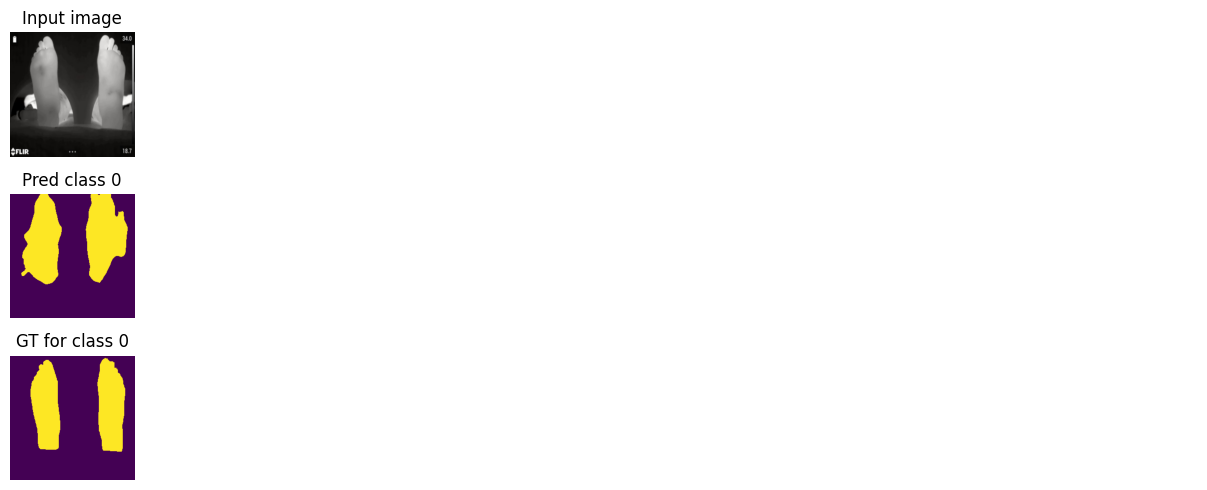

Train loss: 0.45867 | Time: 0m 26s | Val loss: 0.44163
Train_DICE_avg: 0.60692 | Train_Jaccard_avg: 0.44901 | Train_Sensitivity_avg: 0.47754 | Train_Specificity_avg: 0.95496 
Class 0 - Train_DICE: 0.60692 | Train_Jaccard: 0.44901 | Train_Sensitivity: 0.47754 | Train_Specificity: 0.95496 
Val_DICE_avg: 0.68442 | Val_Jaccard_avg: 0.53536 | Val_Sensitivity_avg: 0.58444 | Val_Specificity_avg: 0.94765 
Class 0 - Val_DICE: 0.68442 | Val_Jaccard: 0.53536 | Val_Sensitivity: 0.58444 | Val_Specificity: 0.94765 

Epoch 7/61


Validation Epoch 7/61: 100%|██████████| 2/2 [00:00<00:00,  3.22it/s]


Train loss: 0.43862 | Time: 0m 29s | Val loss: 0.41216
Train_DICE_avg: 0.62597 | Train_Jaccard_avg: 0.46892 | Train_Sensitivity_avg: 0.50225 | Train_Specificity_avg: 0.95231 
Class 0 - Train_DICE: 0.62597 | Train_Jaccard: 0.46892 | Train_Sensitivity: 0.50225 | Train_Specificity: 0.95231 
Val_DICE_avg: 0.67225 | Val_Jaccard_avg: 0.52190 | Val_Sensitivity_avg: 0.54787 | Val_Specificity_avg: 0.96662 
Class 0 - Val_DICE: 0.67225 | Val_Jaccard: 0.52190 | Val_Sensitivity: 0.54787 | Val_Specificity: 0.96662 

Epoch 8/61


Validation Epoch 8/61: 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]


Train loss: 0.42242 | Time: 0m 33s | Val loss: 0.40132
Train_DICE_avg: 0.64122 | Train_Jaccard_avg: 0.48614 | Train_Sensitivity_avg: 0.52266 | Train_Specificity_avg: 0.95331 
Class 0 - Train_DICE: 0.64122 | Train_Jaccard: 0.48614 | Train_Sensitivity: 0.52266 | Train_Specificity: 0.95331 
Val_DICE_avg: 0.66603 | Val_Jaccard_avg: 0.51487 | Val_Sensitivity_avg: 0.53296 | Val_Specificity_avg: 0.97521 
Class 0 - Val_DICE: 0.66603 | Val_Jaccard: 0.51487 | Val_Sensitivity: 0.53296 | Val_Specificity: 0.97521 

Epoch 9/61


Validation Epoch 9/61: 100%|██████████| 2/2 [00:00<00:00,  2.94it/s]


Train loss: 0.41071 | Time: 0m 37s | Val loss: 0.39928
Train_DICE_avg: 0.65117 | Train_Jaccard_avg: 0.49661 | Train_Sensitivity_avg: 0.53898 | Train_Specificity_avg: 0.94873 
Class 0 - Train_DICE: 0.65117 | Train_Jaccard: 0.49661 | Train_Sensitivity: 0.53898 | Train_Specificity: 0.94873 
Val_DICE_avg: 0.66104 | Val_Jaccard_avg: 0.50912 | Val_Sensitivity_avg: 0.52123 | Val_Specificity_avg: 0.98267 
Class 0 - Val_DICE: 0.66104 | Val_Jaccard: 0.50912 | Val_Sensitivity: 0.52123 | Val_Specificity: 0.98267 

Epoch 10/61


Validation Epoch 10/61: 100%|██████████| 2/2 [00:00<00:00,  3.23it/s]


Train loss: 0.39480 | Time: 0m 40s | Val loss: 0.37749
Train_DICE_avg: 0.66753 | Train_Jaccard_avg: 0.51395 | Train_Sensitivity_avg: 0.55631 | Train_Specificity_avg: 0.95250 
Class 0 - Train_DICE: 0.66753 | Train_Jaccard: 0.51395 | Train_Sensitivity: 0.55631 | Train_Specificity: 0.95250 
Val_DICE_avg: 0.68708 | Val_Jaccard_avg: 0.53767 | Val_Sensitivity_avg: 0.55508 | Val_Specificity_avg: 0.98034 
Class 0 - Val_DICE: 0.68708 | Val_Jaccard: 0.53767 | Val_Sensitivity: 0.55508 | Val_Specificity: 0.98034 

Epoch 11/61
Training phase 2


Validation Epoch 11/61: 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]


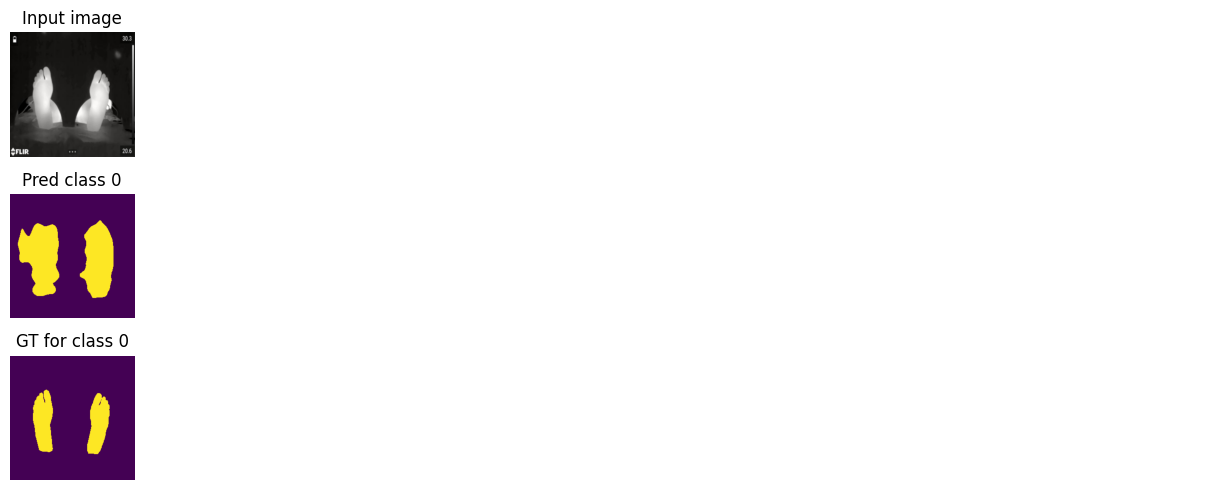

Train loss: 0.38985 | Time: 0m 45s | Val loss: 0.36550
Train_DICE_avg: 0.67092 | Train_Jaccard_avg: 0.51676 | Train_Sensitivity_avg: 0.56764 | Train_Specificity_avg: 0.94858 
Class 0 - Train_DICE: 0.67092 | Train_Jaccard: 0.51676 | Train_Sensitivity: 0.56764 | Train_Specificity: 0.94858 
Val_DICE_avg: 0.69998 | Val_Jaccard_avg: 0.55184 | Val_Sensitivity_avg: 0.57275 | Val_Specificity_avg: 0.97761 
Class 0 - Val_DICE: 0.69998 | Val_Jaccard: 0.55184 | Val_Sensitivity: 0.57275 | Val_Specificity: 0.97761 

Epoch 12/61


Validation Epoch 12/61: 100%|██████████| 2/2 [00:00<00:00,  2.96it/s]


Train loss: 0.37253 | Time: 0m 49s | Val loss: 0.33992
Train_DICE_avg: 0.68878 | Train_Jaccard_avg: 0.53761 | Train_Sensitivity_avg: 0.58493 | Train_Specificity_avg: 0.95331 
Class 0 - Train_DICE: 0.68878 | Train_Jaccard: 0.53761 | Train_Sensitivity: 0.58493 | Train_Specificity: 0.95331 
Val_DICE_avg: 0.73191 | Val_Jaccard_avg: 0.58961 | Val_Sensitivity_avg: 0.62727 | Val_Specificity_avg: 0.96726 
Class 0 - Val_DICE: 0.73191 | Val_Jaccard: 0.58961 | Val_Sensitivity: 0.62727 | Val_Specificity: 0.96726 

Epoch 13/61


Validation Epoch 13/61: 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]


Train loss: 0.36177 | Time: 0m 53s | Val loss: 0.33683
Train_DICE_avg: 0.69902 | Train_Jaccard_avg: 0.55000 | Train_Sensitivity_avg: 0.59757 | Train_Specificity_avg: 0.95451 
Class 0 - Train_DICE: 0.69902 | Train_Jaccard: 0.55000 | Train_Sensitivity: 0.59757 | Train_Specificity: 0.95451 
Val_DICE_avg: 0.73007 | Val_Jaccard_avg: 0.58779 | Val_Sensitivity_avg: 0.61961 | Val_Specificity_avg: 0.97005 
Class 0 - Val_DICE: 0.73007 | Val_Jaccard: 0.58779 | Val_Sensitivity: 0.61961 | Val_Specificity: 0.97005 

Epoch 14/61


Validation Epoch 14/61: 100%|██████████| 2/2 [00:00<00:00,  3.23it/s]


Train loss: 0.36060 | Time: 0m 56s | Val loss: 0.33171
Train_DICE_avg: 0.69510 | Train_Jaccard_avg: 0.54485 | Train_Sensitivity_avg: 0.59664 | Train_Specificity_avg: 0.95197 
Class 0 - Train_DICE: 0.69510 | Train_Jaccard: 0.54485 | Train_Sensitivity: 0.59664 | Train_Specificity: 0.95197 
Val_DICE_avg: 0.73105 | Val_Jaccard_avg: 0.58908 | Val_Sensitivity_avg: 0.62192 | Val_Specificity_avg: 0.96939 
Class 0 - Val_DICE: 0.73105 | Val_Jaccard: 0.58908 | Val_Sensitivity: 0.62192 | Val_Specificity: 0.96939 

Epoch 15/61


Validation Epoch 15/61: 100%|██████████| 2/2 [00:00<00:00,  3.04it/s]


Train loss: 0.35227 | Time: 1m 0s | Val loss: 0.32644
Train_DICE_avg: 0.70248 | Train_Jaccard_avg: 0.55454 | Train_Sensitivity_avg: 0.60645 | Train_Specificity_avg: 0.95241 
Class 0 - Train_DICE: 0.70248 | Train_Jaccard: 0.55454 | Train_Sensitivity: 0.60645 | Train_Specificity: 0.95241 
Val_DICE_avg: 0.73734 | Val_Jaccard_avg: 0.59677 | Val_Sensitivity_avg: 0.63274 | Val_Specificity_avg: 0.96961 
Class 0 - Val_DICE: 0.73734 | Val_Jaccard: 0.59677 | Val_Sensitivity: 0.63274 | Val_Specificity: 0.96961 

Epoch 16/61


Validation Epoch 16/61: 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]


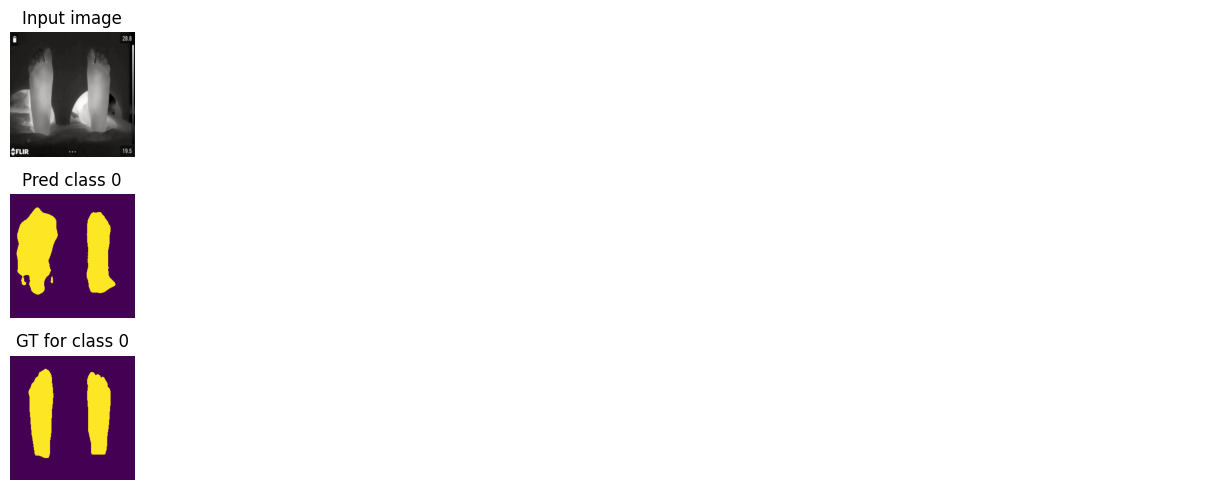

Train loss: 0.34131 | Time: 1m 5s | Val loss: 0.31724
Train_DICE_avg: 0.71520 | Train_Jaccard_avg: 0.56896 | Train_Sensitivity_avg: 0.62158 | Train_Specificity_avg: 0.95486 
Class 0 - Train_DICE: 0.71520 | Train_Jaccard: 0.56896 | Train_Sensitivity: 0.62158 | Train_Specificity: 0.95486 
Val_DICE_avg: 0.74284 | Val_Jaccard_avg: 0.60334 | Val_Sensitivity_avg: 0.63866 | Val_Specificity_avg: 0.97057 
Class 0 - Val_DICE: 0.74284 | Val_Jaccard: 0.60334 | Val_Sensitivity: 0.63866 | Val_Specificity: 0.97057 

Epoch 17/61


Validation Epoch 17/61: 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]


Train loss: 0.33167 | Time: 1m 9s | Val loss: 0.31267
Train_DICE_avg: 0.72287 | Train_Jaccard_avg: 0.57836 | Train_Sensitivity_avg: 0.62840 | Train_Specificity_avg: 0.95755 
Class 0 - Train_DICE: 0.72287 | Train_Jaccard: 0.57836 | Train_Sensitivity: 0.62840 | Train_Specificity: 0.95755 
Val_DICE_avg: 0.74340 | Val_Jaccard_avg: 0.60455 | Val_Sensitivity_avg: 0.63509 | Val_Specificity_avg: 0.97339 
Class 0 - Val_DICE: 0.74340 | Val_Jaccard: 0.60455 | Val_Sensitivity: 0.63509 | Val_Specificity: 0.97339 

Epoch 18/61


Validation Epoch 18/61: 100%|██████████| 2/2 [00:00<00:00,  2.94it/s]


Train loss: 0.33211 | Time: 1m 13s | Val loss: 0.29344
Train_DICE_avg: 0.71990 | Train_Jaccard_avg: 0.57444 | Train_Sensitivity_avg: 0.62846 | Train_Specificity_avg: 0.95419 
Class 0 - Train_DICE: 0.71990 | Train_Jaccard: 0.57444 | Train_Sensitivity: 0.62846 | Train_Specificity: 0.95419 
Val_DICE_avg: 0.76638 | Val_Jaccard_avg: 0.63350 | Val_Sensitivity_avg: 0.68178 | Val_Specificity_avg: 0.96355 
Class 0 - Val_DICE: 0.76638 | Val_Jaccard: 0.63350 | Val_Sensitivity: 0.68178 | Val_Specificity: 0.96355 

Epoch 19/61


Validation Epoch 19/61: 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]


Train loss: 0.32638 | Time: 1m 17s | Val loss: 0.28414
Train_DICE_avg: 0.72404 | Train_Jaccard_avg: 0.58094 | Train_Sensitivity_avg: 0.63481 | Train_Specificity_avg: 0.95561 
Class 0 - Train_DICE: 0.72404 | Train_Jaccard: 0.58094 | Train_Sensitivity: 0.63481 | Train_Specificity: 0.95561 
Val_DICE_avg: 0.77435 | Val_Jaccard_avg: 0.64353 | Val_Sensitivity_avg: 0.69314 | Val_Specificity_avg: 0.96408 
Class 0 - Val_DICE: 0.77435 | Val_Jaccard: 0.64353 | Val_Sensitivity: 0.69314 | Val_Specificity: 0.96408 

Epoch 20/61


Validation Epoch 20/61: 100%|██████████| 2/2 [00:00<00:00,  3.19it/s]


Train loss: 0.32159 | Time: 1m 20s | Val loss: 0.29353
Train_DICE_avg: 0.72639 | Train_Jaccard_avg: 0.58346 | Train_Sensitivity_avg: 0.63652 | Train_Specificity_avg: 0.95607 
Class 0 - Train_DICE: 0.72639 | Train_Jaccard: 0.58346 | Train_Sensitivity: 0.63652 | Train_Specificity: 0.95607 
Val_DICE_avg: 0.75535 | Val_Jaccard_avg: 0.62024 | Val_Sensitivity_avg: 0.65111 | Val_Specificity_avg: 0.97335 
Class 0 - Val_DICE: 0.75535 | Val_Jaccard: 0.62024 | Val_Sensitivity: 0.65111 | Val_Specificity: 0.97335 

Epoch 21/61
Training phase 3


Validation Epoch 21/61: 100%|██████████| 2/2 [00:00<00:00,  2.98it/s]


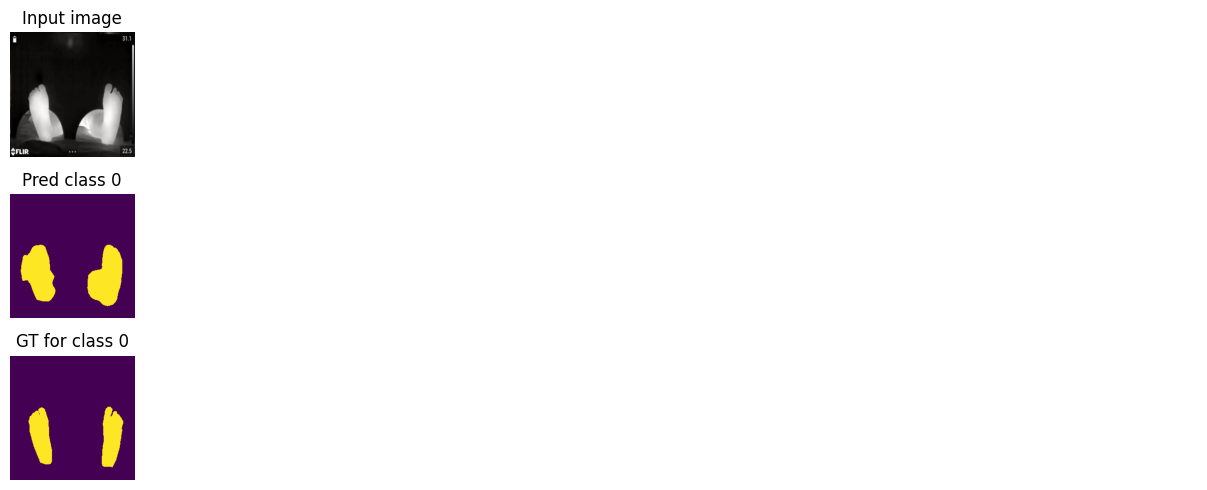

Train loss: 0.32025 | Time: 1m 25s | Val loss: 0.27583
Train_DICE_avg: 0.72831 | Train_Jaccard_avg: 0.58472 | Train_Sensitivity_avg: 0.64503 | Train_Specificity_avg: 0.95269 
Class 0 - Train_DICE: 0.72831 | Train_Jaccard: 0.58472 | Train_Sensitivity: 0.64503 | Train_Specificity: 0.95269 
Val_DICE_avg: 0.78250 | Val_Jaccard_avg: 0.65355 | Val_Sensitivity_avg: 0.74045 | Val_Specificity_avg: 0.94651 
Class 0 - Val_DICE: 0.78250 | Val_Jaccard: 0.65355 | Val_Sensitivity: 0.74045 | Val_Specificity: 0.94651 

Epoch 22/61


Validation Epoch 22/61: 100%|██████████| 2/2 [00:00<00:00,  3.14it/s]


Train loss: 0.31015 | Time: 1m 29s | Val loss: 0.26172
Train_DICE_avg: 0.73746 | Train_Jaccard_avg: 0.59713 | Train_Sensitivity_avg: 0.65587 | Train_Specificity_avg: 0.95374 
Class 0 - Train_DICE: 0.73746 | Train_Jaccard: 0.59713 | Train_Sensitivity: 0.65587 | Train_Specificity: 0.95374 
Val_DICE_avg: 0.79289 | Val_Jaccard_avg: 0.66699 | Val_Sensitivity_avg: 0.73090 | Val_Specificity_avg: 0.95984 
Class 0 - Val_DICE: 0.79289 | Val_Jaccard: 0.66699 | Val_Sensitivity: 0.73090 | Val_Specificity: 0.95984 

Epoch 23/61


Validation Epoch 23/61: 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]


Train loss: 0.30545 | Time: 1m 33s | Val loss: 0.25043
Train_DICE_avg: 0.74106 | Train_Jaccard_avg: 0.60172 | Train_Sensitivity_avg: 0.66129 | Train_Specificity_avg: 0.95467 
Class 0 - Train_DICE: 0.74106 | Train_Jaccard: 0.60172 | Train_Sensitivity: 0.66129 | Train_Specificity: 0.95467 
Val_DICE_avg: 0.80354 | Val_Jaccard_avg: 0.68122 | Val_Sensitivity_avg: 0.75706 | Val_Specificity_avg: 0.95410 
Class 0 - Val_DICE: 0.80354 | Val_Jaccard: 0.68122 | Val_Sensitivity: 0.75706 | Val_Specificity: 0.95410 

Epoch 24/61


Validation Epoch 24/61: 100%|██████████| 2/2 [00:00<00:00,  2.85it/s]


Train loss: 0.29547 | Time: 1m 37s | Val loss: 0.25259
Train_DICE_avg: 0.75086 | Train_Jaccard_avg: 0.61466 | Train_Sensitivity_avg: 0.66986 | Train_Specificity_avg: 0.95883 
Class 0 - Train_DICE: 0.75086 | Train_Jaccard: 0.61466 | Train_Sensitivity: 0.66986 | Train_Specificity: 0.95883 
Val_DICE_avg: 0.79593 | Val_Jaccard_avg: 0.67172 | Val_Sensitivity_avg: 0.72120 | Val_Specificity_avg: 0.96552 
Class 0 - Val_DICE: 0.79593 | Val_Jaccard: 0.67172 | Val_Sensitivity: 0.72120 | Val_Specificity: 0.96552 

Epoch 25/61


Validation Epoch 25/61: 100%|██████████| 2/2 [00:00<00:00,  3.17it/s]


Train loss: 0.28948 | Time: 1m 40s | Val loss: 0.24772
Train_DICE_avg: 0.75511 | Train_Jaccard_avg: 0.61923 | Train_Sensitivity_avg: 0.67534 | Train_Specificity_avg: 0.95775 
Class 0 - Train_DICE: 0.75511 | Train_Jaccard: 0.61923 | Train_Sensitivity: 0.67534 | Train_Specificity: 0.95775 
Val_DICE_avg: 0.80060 | Val_Jaccard_avg: 0.67866 | Val_Sensitivity_avg: 0.72961 | Val_Specificity_avg: 0.96571 
Class 0 - Val_DICE: 0.80060 | Val_Jaccard: 0.67866 | Val_Sensitivity: 0.72961 | Val_Specificity: 0.96571 

Epoch 26/61


Validation Epoch 26/61: 100%|██████████| 2/2 [00:00<00:00,  3.21it/s]


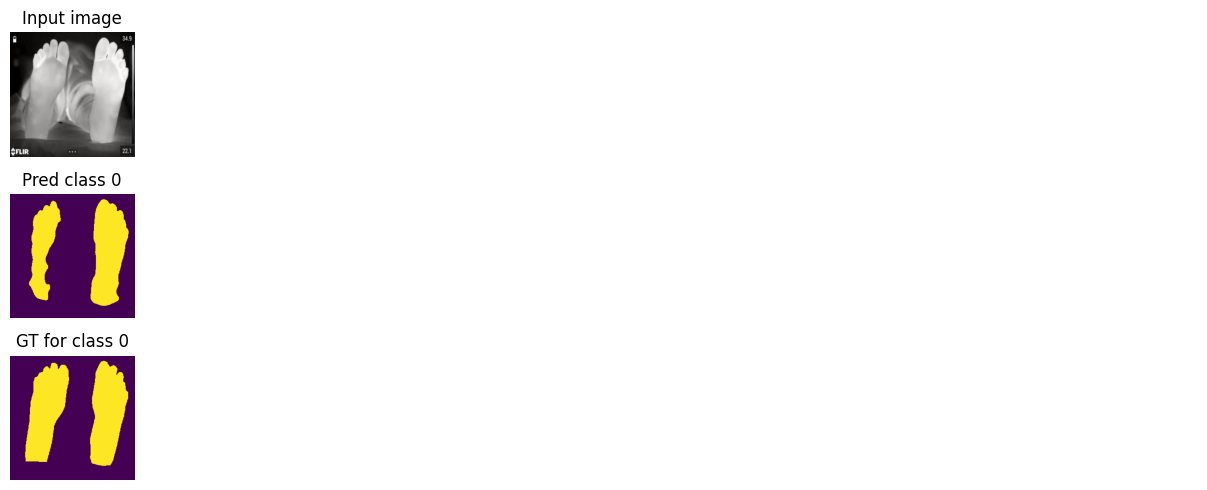

Train loss: 0.28173 | Time: 1m 45s | Val loss: 0.24216
Train_DICE_avg: 0.76496 | Train_Jaccard_avg: 0.63189 | Train_Sensitivity_avg: 0.69044 | Train_Specificity_avg: 0.95836 
Class 0 - Train_DICE: 0.76496 | Train_Jaccard: 0.63189 | Train_Sensitivity: 0.69044 | Train_Specificity: 0.95836 
Val_DICE_avg: 0.80641 | Val_Jaccard_avg: 0.68743 | Val_Sensitivity_avg: 0.74731 | Val_Specificity_avg: 0.96332 
Class 0 - Val_DICE: 0.80641 | Val_Jaccard: 0.68743 | Val_Sensitivity: 0.74731 | Val_Specificity: 0.96332 

Epoch 27/61


Validation Epoch 27/61: 100%|██████████| 2/2 [00:00<00:00,  2.72it/s]


Train loss: 0.27587 | Time: 1m 49s | Val loss: 0.23809
Train_DICE_avg: 0.76890 | Train_Jaccard_avg: 0.63807 | Train_Sensitivity_avg: 0.69373 | Train_Specificity_avg: 0.95998 
Class 0 - Train_DICE: 0.76890 | Train_Jaccard: 0.63807 | Train_Sensitivity: 0.69373 | Train_Specificity: 0.95998 
Val_DICE_avg: 0.80849 | Val_Jaccard_avg: 0.69030 | Val_Sensitivity_avg: 0.74633 | Val_Specificity_avg: 0.96511 
Class 0 - Val_DICE: 0.80849 | Val_Jaccard: 0.69030 | Val_Sensitivity: 0.74633 | Val_Specificity: 0.96511 

Epoch 28/61


Validation Epoch 28/61: 100%|██████████| 2/2 [00:00<00:00,  3.14it/s]


Train loss: 0.27206 | Time: 1m 53s | Val loss: 0.23593
Train_DICE_avg: 0.77249 | Train_Jaccard_avg: 0.64219 | Train_Sensitivity_avg: 0.69923 | Train_Specificity_avg: 0.95878 
Class 0 - Train_DICE: 0.77249 | Train_Jaccard: 0.64219 | Train_Sensitivity: 0.69923 | Train_Specificity: 0.95878 
Val_DICE_avg: 0.80897 | Val_Jaccard_avg: 0.69051 | Val_Sensitivity_avg: 0.73350 | Val_Specificity_avg: 0.97153 
Class 0 - Val_DICE: 0.80897 | Val_Jaccard: 0.69051 | Val_Sensitivity: 0.73350 | Val_Specificity: 0.97153 

Epoch 29/61


Validation Epoch 29/61: 100%|██████████| 2/2 [00:00<00:00,  3.20it/s]


Train loss: 0.26847 | Time: 1m 57s | Val loss: 0.22967
Train_DICE_avg: 0.77537 | Train_Jaccard_avg: 0.64556 | Train_Sensitivity_avg: 0.70497 | Train_Specificity_avg: 0.95840 
Class 0 - Train_DICE: 0.77537 | Train_Jaccard: 0.64556 | Train_Sensitivity: 0.70497 | Train_Specificity: 0.95840 
Val_DICE_avg: 0.81418 | Val_Jaccard_avg: 0.69791 | Val_Sensitivity_avg: 0.74814 | Val_Specificity_avg: 0.96913 
Class 0 - Val_DICE: 0.81418 | Val_Jaccard: 0.69791 | Val_Sensitivity: 0.74814 | Val_Specificity: 0.96913 

Epoch 30/61


Validation Epoch 30/61: 100%|██████████| 2/2 [00:00<00:00,  2.98it/s]


Train loss: 0.26172 | Time: 2m 1s | Val loss: 0.22572
Train_DICE_avg: 0.78214 | Train_Jaccard_avg: 0.65390 | Train_Sensitivity_avg: 0.71170 | Train_Specificity_avg: 0.95939 
Class 0 - Train_DICE: 0.78214 | Train_Jaccard: 0.65390 | Train_Sensitivity: 0.71170 | Train_Specificity: 0.95939 
Val_DICE_avg: 0.81634 | Val_Jaccard_avg: 0.70032 | Val_Sensitivity_avg: 0.74840 | Val_Specificity_avg: 0.97040 
Class 0 - Val_DICE: 0.81634 | Val_Jaccard: 0.70032 | Val_Sensitivity: 0.74840 | Val_Specificity: 0.97040 

Epoch 31/61
Training phase 4


Validation Epoch 31/61: 100%|██████████| 2/2 [00:00<00:00,  3.14it/s]


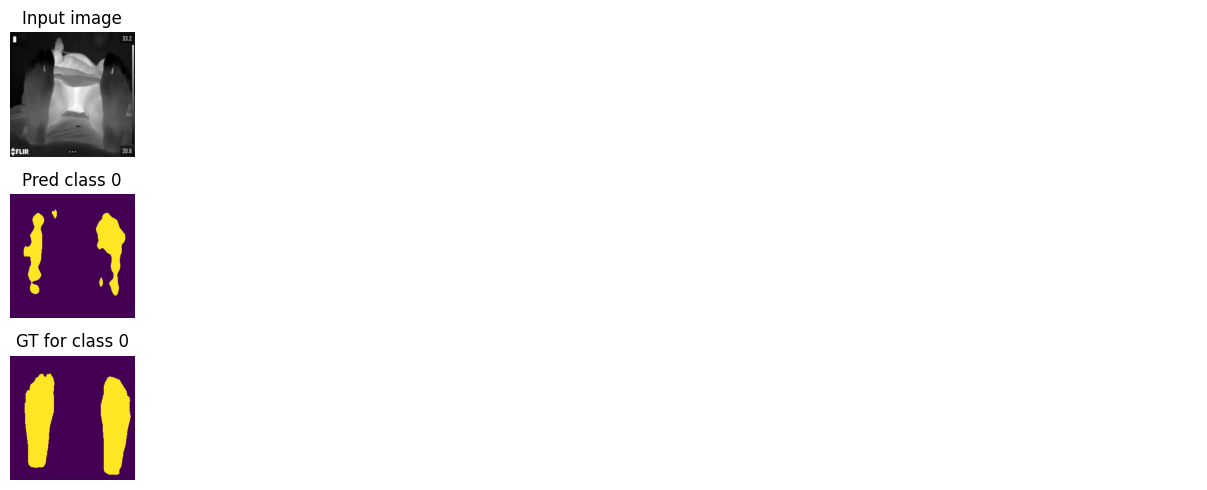

Train loss: 0.26578 | Time: 2m 5s | Val loss: 0.22551
Train_DICE_avg: 0.77712 | Train_Jaccard_avg: 0.64745 | Train_Sensitivity_avg: 0.71914 | Train_Specificity_avg: 0.95393 
Class 0 - Train_DICE: 0.77712 | Train_Jaccard: 0.64745 | Train_Sensitivity: 0.71914 | Train_Specificity: 0.95393 
Val_DICE_avg: 0.81888 | Val_Jaccard_avg: 0.70429 | Val_Sensitivity_avg: 0.80356 | Val_Specificity_avg: 0.95044 
Class 0 - Val_DICE: 0.81888 | Val_Jaccard: 0.70429 | Val_Sensitivity: 0.80356 | Val_Specificity: 0.95044 

Epoch 32/61


Validation Epoch 32/61: 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]


Train loss: 0.25077 | Time: 2m 9s | Val loss: 0.21012
Train_DICE_avg: 0.79099 | Train_Jaccard_avg: 0.66676 | Train_Sensitivity_avg: 0.72748 | Train_Specificity_avg: 0.95963 
Class 0 - Train_DICE: 0.79099 | Train_Jaccard: 0.66676 | Train_Sensitivity: 0.72748 | Train_Specificity: 0.95963 
Val_DICE_avg: 0.83259 | Val_Jaccard_avg: 0.72266 | Val_Sensitivity_avg: 0.83715 | Val_Specificity_avg: 0.94459 
Class 0 - Val_DICE: 0.83259 | Val_Jaccard: 0.72266 | Val_Sensitivity: 0.83715 | Val_Specificity: 0.94459 

Epoch 33/61


Validation Epoch 33/61: 100%|██████████| 2/2 [00:00<00:00,  3.00it/s]


Train loss: 0.24631 | Time: 2m 13s | Val loss: 0.20424
Train_DICE_avg: 0.79366 | Train_Jaccard_avg: 0.67033 | Train_Sensitivity_avg: 0.73068 | Train_Specificity_avg: 0.96078 
Class 0 - Train_DICE: 0.79366 | Train_Jaccard: 0.67033 | Train_Sensitivity: 0.73068 | Train_Specificity: 0.96078 
Val_DICE_avg: 0.83381 | Val_Jaccard_avg: 0.72392 | Val_Sensitivity_avg: 0.77964 | Val_Specificity_avg: 0.96653 
Class 0 - Val_DICE: 0.83381 | Val_Jaccard: 0.72392 | Val_Sensitivity: 0.77964 | Val_Specificity: 0.96653 

Epoch 34/61


Validation Epoch 34/61: 100%|██████████| 2/2 [00:00<00:00,  3.19it/s]


Train loss: 0.24042 | Time: 2m 17s | Val loss: 0.20293
Train_DICE_avg: 0.79912 | Train_Jaccard_avg: 0.67690 | Train_Sensitivity_avg: 0.73770 | Train_Specificity_avg: 0.96103 
Class 0 - Train_DICE: 0.79912 | Train_Jaccard: 0.67690 | Train_Sensitivity: 0.73770 | Train_Specificity: 0.96103 
Val_DICE_avg: 0.83271 | Val_Jaccard_avg: 0.72310 | Val_Sensitivity_avg: 0.77226 | Val_Specificity_avg: 0.96962 
Class 0 - Val_DICE: 0.83271 | Val_Jaccard: 0.72310 | Val_Sensitivity: 0.77226 | Val_Specificity: 0.96962 

Epoch 35/61


Validation Epoch 35/61: 100%|██████████| 2/2 [00:00<00:00,  3.21it/s]


Train loss: 0.23564 | Time: 2m 21s | Val loss: 0.19727
Train_DICE_avg: 0.80487 | Train_Jaccard_avg: 0.68483 | Train_Sensitivity_avg: 0.74910 | Train_Specificity_avg: 0.96046 
Class 0 - Train_DICE: 0.80487 | Train_Jaccard: 0.68483 | Train_Sensitivity: 0.74910 | Train_Specificity: 0.96046 
Val_DICE_avg: 0.84025 | Val_Jaccard_avg: 0.73428 | Val_Sensitivity_avg: 0.79782 | Val_Specificity_avg: 0.96506 
Class 0 - Val_DICE: 0.84025 | Val_Jaccard: 0.73428 | Val_Sensitivity: 0.79782 | Val_Specificity: 0.96506 

Epoch 36/61


Validation Epoch 36/61: 100%|██████████| 2/2 [00:00<00:00,  2.99it/s]


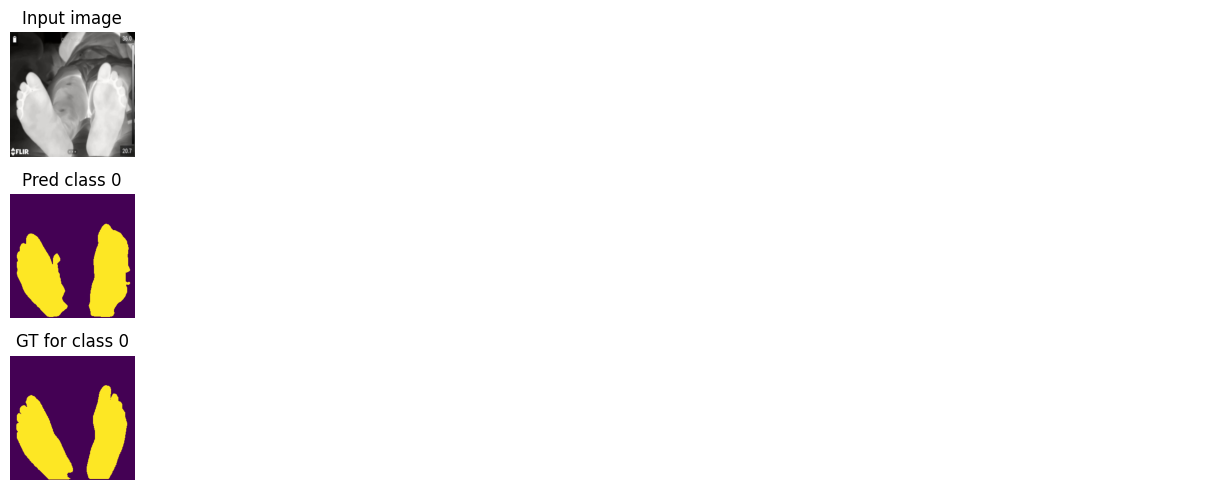

Train loss: 0.22857 | Time: 2m 25s | Val loss: 0.19624
Train_DICE_avg: 0.81150 | Train_Jaccard_avg: 0.69356 | Train_Sensitivity_avg: 0.75452 | Train_Specificity_avg: 0.96317 
Class 0 - Train_DICE: 0.81150 | Train_Jaccard: 0.69356 | Train_Sensitivity: 0.75452 | Train_Specificity: 0.96317 
Val_DICE_avg: 0.84076 | Val_Jaccard_avg: 0.73561 | Val_Sensitivity_avg: 0.79707 | Val_Specificity_avg: 0.96632 
Class 0 - Val_DICE: 0.84076 | Val_Jaccard: 0.73561 | Val_Sensitivity: 0.79707 | Val_Specificity: 0.96632 

Epoch 37/61


Validation Epoch 37/61: 100%|██████████| 2/2 [00:00<00:00,  3.20it/s]


Train loss: 0.22294 | Time: 2m 29s | Val loss: 0.19493
Train_DICE_avg: 0.81749 | Train_Jaccard_avg: 0.70235 | Train_Sensitivity_avg: 0.76159 | Train_Specificity_avg: 0.96325 
Class 0 - Train_DICE: 0.81749 | Train_Jaccard: 0.70235 | Train_Sensitivity: 0.76159 | Train_Specificity: 0.96325 
Val_DICE_avg: 0.84100 | Val_Jaccard_avg: 0.73578 | Val_Sensitivity_avg: 0.78756 | Val_Specificity_avg: 0.96956 
Class 0 - Val_DICE: 0.84100 | Val_Jaccard: 0.73578 | Val_Sensitivity: 0.78756 | Val_Specificity: 0.96956 

Epoch 38/61


Validation Epoch 38/61: 100%|██████████| 2/2 [00:00<00:00,  3.19it/s]


Train loss: 0.22197 | Time: 2m 33s | Val loss: 0.19039
Train_DICE_avg: 0.81704 | Train_Jaccard_avg: 0.70104 | Train_Sensitivity_avg: 0.76305 | Train_Specificity_avg: 0.96168 
Class 0 - Train_DICE: 0.81704 | Train_Jaccard: 0.70104 | Train_Sensitivity: 0.76305 | Train_Specificity: 0.96168 
Val_DICE_avg: 0.84474 | Val_Jaccard_avg: 0.74045 | Val_Sensitivity_avg: 0.78731 | Val_Specificity_avg: 0.97141 
Class 0 - Val_DICE: 0.84474 | Val_Jaccard: 0.74045 | Val_Sensitivity: 0.78731 | Val_Specificity: 0.97141 

Epoch 39/61


Validation Epoch 39/61: 100%|██████████| 2/2 [00:00<00:00,  2.98it/s]


Train loss: 0.21653 | Time: 2m 37s | Val loss: 0.18471
Train_DICE_avg: 0.82176 | Train_Jaccard_avg: 0.70759 | Train_Sensitivity_avg: 0.76967 | Train_Specificity_avg: 0.96282 
Class 0 - Train_DICE: 0.82176 | Train_Jaccard: 0.70759 | Train_Sensitivity: 0.76967 | Train_Specificity: 0.96282 
Val_DICE_avg: 0.85083 | Val_Jaccard_avg: 0.74903 | Val_Sensitivity_avg: 0.80036 | Val_Specificity_avg: 0.97036 
Class 0 - Val_DICE: 0.85083 | Val_Jaccard: 0.74903 | Val_Sensitivity: 0.80036 | Val_Specificity: 0.97036 

Epoch 40/61


Validation Epoch 40/61: 100%|██████████| 2/2 [00:00<00:00,  3.22it/s]


Train loss: 0.20983 | Time: 2m 41s | Val loss: 0.18112
Train_DICE_avg: 0.82986 | Train_Jaccard_avg: 0.71853 | Train_Sensitivity_avg: 0.78095 | Train_Specificity_avg: 0.96388 
Class 0 - Train_DICE: 0.82986 | Train_Jaccard: 0.71853 | Train_Sensitivity: 0.78095 | Train_Specificity: 0.96388 
Val_DICE_avg: 0.85501 | Val_Jaccard_avg: 0.75542 | Val_Sensitivity_avg: 0.82028 | Val_Specificity_avg: 0.96504 
Class 0 - Val_DICE: 0.85501 | Val_Jaccard: 0.75542 | Val_Sensitivity: 0.82028 | Val_Specificity: 0.96504 

Epoch 41/61


Validation Epoch 41/61: 100%|██████████| 2/2 [00:00<00:00,  3.14it/s]


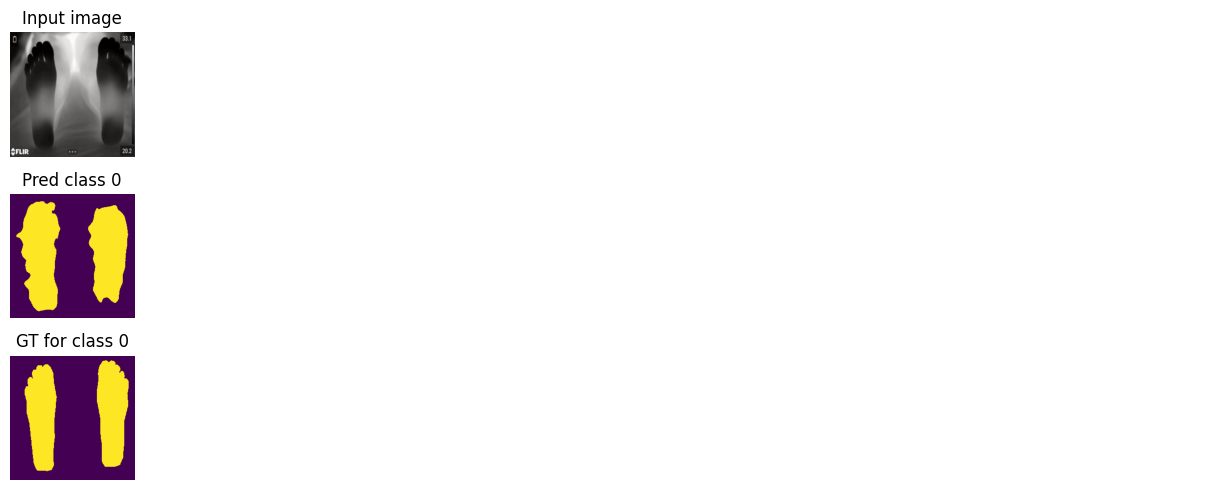

Train loss: 0.20824 | Time: 2m 45s | Val loss: 0.17803
Train_DICE_avg: 0.83106 | Train_Jaccard_avg: 0.71985 | Train_Sensitivity_avg: 0.78283 | Train_Specificity_avg: 0.96307 
Class 0 - Train_DICE: 0.83106 | Train_Jaccard: 0.71985 | Train_Sensitivity: 0.78283 | Train_Specificity: 0.96307 
Val_DICE_avg: 0.85700 | Val_Jaccard_avg: 0.75854 | Val_Sensitivity_avg: 0.81158 | Val_Specificity_avg: 0.96986 
Class 0 - Val_DICE: 0.85700 | Val_Jaccard: 0.75854 | Val_Sensitivity: 0.81158 | Val_Specificity: 0.96986 

Epoch 42/61


Validation Epoch 42/61: 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]


Train loss: 0.20329 | Time: 2m 49s | Val loss: 0.17609
Train_DICE_avg: 0.83524 | Train_Jaccard_avg: 0.72677 | Train_Sensitivity_avg: 0.78871 | Train_Specificity_avg: 0.96476 
Class 0 - Train_DICE: 0.83524 | Train_Jaccard: 0.72677 | Train_Sensitivity: 0.78871 | Train_Specificity: 0.96476 
Val_DICE_avg: 0.85819 | Val_Jaccard_avg: 0.76038 | Val_Sensitivity_avg: 0.80970 | Val_Specificity_avg: 0.97185 
Class 0 - Val_DICE: 0.85819 | Val_Jaccard: 0.76038 | Val_Sensitivity: 0.80970 | Val_Specificity: 0.97185 

Epoch 43/61


Validation Epoch 43/61: 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]


Train loss: 0.19887 | Time: 2m 53s | Val loss: 0.17494
Train_DICE_avg: 0.83900 | Train_Jaccard_avg: 0.73213 | Train_Sensitivity_avg: 0.79090 | Train_Specificity_avg: 0.96588 
Class 0 - Train_DICE: 0.83900 | Train_Jaccard: 0.73213 | Train_Sensitivity: 0.79090 | Train_Specificity: 0.96588 
Val_DICE_avg: 0.85904 | Val_Jaccard_avg: 0.76175 | Val_Sensitivity_avg: 0.81689 | Val_Specificity_avg: 0.96974 
Class 0 - Val_DICE: 0.85904 | Val_Jaccard: 0.76175 | Val_Sensitivity: 0.81689 | Val_Specificity: 0.96974 

Epoch 44/61


Validation Epoch 44/61: 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]


Train loss: 0.19878 | Time: 2m 57s | Val loss: 0.16698
Train_DICE_avg: 0.83869 | Train_Jaccard_avg: 0.73140 | Train_Sensitivity_avg: 0.79337 | Train_Specificity_avg: 0.96526 
Class 0 - Train_DICE: 0.83869 | Train_Jaccard: 0.73140 | Train_Sensitivity: 0.79337 | Train_Specificity: 0.96526 
Val_DICE_avg: 0.86905 | Val_Jaccard_avg: 0.77553 | Val_Sensitivity_avg: 0.85162 | Val_Specificity_avg: 0.96285 
Class 0 - Val_DICE: 0.86905 | Val_Jaccard: 0.77553 | Val_Sensitivity: 0.85162 | Val_Specificity: 0.96285 

Epoch 45/61


Validation Epoch 45/61: 100%|██████████| 2/2 [00:00<00:00,  2.98it/s]


Train loss: 0.19668 | Time: 3m 1s | Val loss: 0.16712
Train_DICE_avg: 0.84102 | Train_Jaccard_avg: 0.73385 | Train_Sensitivity_avg: 0.79716 | Train_Specificity_avg: 0.96533 
Class 0 - Train_DICE: 0.84102 | Train_Jaccard: 0.73385 | Train_Sensitivity: 0.79716 | Train_Specificity: 0.96533 
Val_DICE_avg: 0.86705 | Val_Jaccard_avg: 0.77315 | Val_Sensitivity_avg: 0.83650 | Val_Specificity_avg: 0.96698 
Class 0 - Val_DICE: 0.86705 | Val_Jaccard: 0.77315 | Val_Sensitivity: 0.83650 | Val_Specificity: 0.96698 

Epoch 46/61


Validation Epoch 46/61: 100%|██████████| 2/2 [00:00<00:00,  3.18it/s]


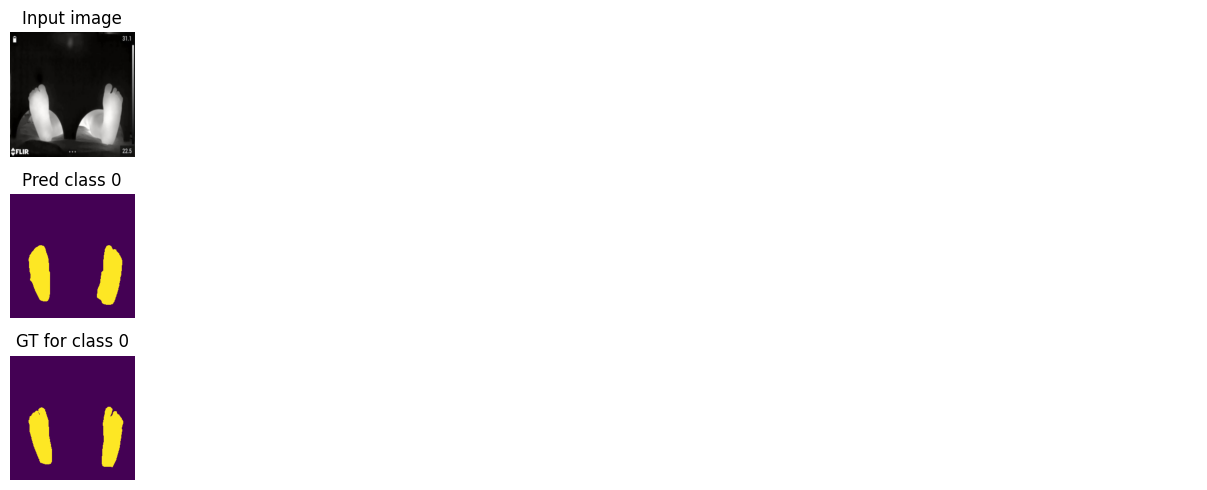

Train loss: 0.19561 | Time: 3m 5s | Val loss: 0.16439
Train_DICE_avg: 0.84152 | Train_Jaccard_avg: 0.73435 | Train_Sensitivity_avg: 0.79860 | Train_Specificity_avg: 0.96404 
Class 0 - Train_DICE: 0.84152 | Train_Jaccard: 0.73435 | Train_Sensitivity: 0.79860 | Train_Specificity: 0.96404 
Val_DICE_avg: 0.86997 | Val_Jaccard_avg: 0.77743 | Val_Sensitivity_avg: 0.84227 | Val_Specificity_avg: 0.96644 
Class 0 - Val_DICE: 0.86997 | Val_Jaccard: 0.77743 | Val_Sensitivity: 0.84227 | Val_Specificity: 0.96644 

Epoch 47/61


Validation Epoch 47/61: 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]


Train loss: 0.19046 | Time: 3m 9s | Val loss: 0.16282
Train_DICE_avg: 0.84627 | Train_Jaccard_avg: 0.74246 | Train_Sensitivity_avg: 0.80390 | Train_Specificity_avg: 0.96563 
Class 0 - Train_DICE: 0.84627 | Train_Jaccard: 0.74246 | Train_Sensitivity: 0.80390 | Train_Specificity: 0.96563 
Val_DICE_avg: 0.87134 | Val_Jaccard_avg: 0.77914 | Val_Sensitivity_avg: 0.84905 | Val_Specificity_avg: 0.96421 
Class 0 - Val_DICE: 0.87134 | Val_Jaccard: 0.77914 | Val_Sensitivity: 0.84905 | Val_Specificity: 0.96421 

Epoch 48/61


Validation Epoch 48/61: 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]


Train loss: 0.19120 | Time: 3m 13s | Val loss: 0.16103
Train_DICE_avg: 0.84533 | Train_Jaccard_avg: 0.74058 | Train_Sensitivity_avg: 0.80353 | Train_Specificity_avg: 0.96491 
Class 0 - Train_DICE: 0.84533 | Train_Jaccard: 0.74058 | Train_Sensitivity: 0.80353 | Train_Specificity: 0.96491 
Val_DICE_avg: 0.87222 | Val_Jaccard_avg: 0.78071 | Val_Sensitivity_avg: 0.84219 | Val_Specificity_avg: 0.96764 
Class 0 - Val_DICE: 0.87222 | Val_Jaccard: 0.78071 | Val_Sensitivity: 0.84219 | Val_Specificity: 0.96764 

Epoch 49/61


Validation Epoch 49/61: 100%|██████████| 2/2 [00:00<00:00,  3.19it/s]


Train loss: 0.18949 | Time: 3m 17s | Val loss: 0.16066
Train_DICE_avg: 0.84724 | Train_Jaccard_avg: 0.74338 | Train_Sensitivity_avg: 0.80657 | Train_Specificity_avg: 0.96477 
Class 0 - Train_DICE: 0.84724 | Train_Jaccard: 0.74338 | Train_Sensitivity: 0.80657 | Train_Specificity: 0.96477 
Val_DICE_avg: 0.87192 | Val_Jaccard_avg: 0.78027 | Val_Sensitivity_avg: 0.83734 | Val_Specificity_avg: 0.96957 
Class 0 - Val_DICE: 0.87192 | Val_Jaccard: 0.78027 | Val_Sensitivity: 0.83734 | Val_Specificity: 0.96957 

Epoch 50/61


Validation Epoch 50/61: 100%|██████████| 2/2 [00:00<00:00,  3.17it/s]


Train loss: 0.18494 | Time: 3m 21s | Val loss: 0.15890
Train_DICE_avg: 0.85137 | Train_Jaccard_avg: 0.74939 | Train_Sensitivity_avg: 0.81143 | Train_Specificity_avg: 0.96597 
Class 0 - Train_DICE: 0.85137 | Train_Jaccard: 0.74939 | Train_Sensitivity: 0.81143 | Train_Specificity: 0.96597 
Val_DICE_avg: 0.87369 | Val_Jaccard_avg: 0.78265 | Val_Sensitivity_avg: 0.84542 | Val_Specificity_avg: 0.96725 
Class 0 - Val_DICE: 0.87369 | Val_Jaccard: 0.78265 | Val_Sensitivity: 0.84542 | Val_Specificity: 0.96725 

Epoch 51/61


Validation Epoch 51/61: 100%|██████████| 2/2 [00:00<00:00,  2.96it/s]


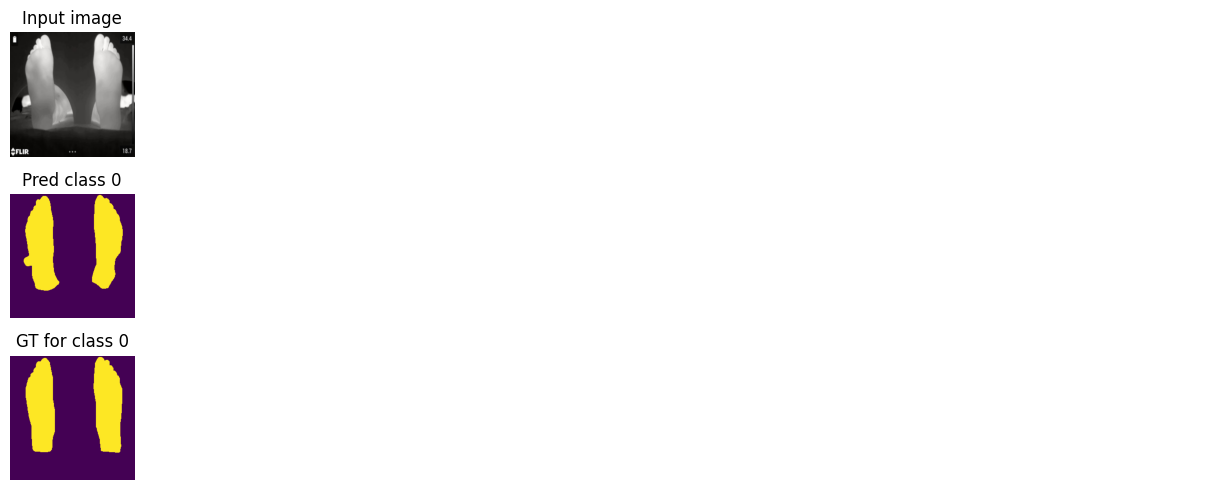

Train loss: 0.18458 | Time: 3m 26s | Val loss: 0.15814
Train_DICE_avg: 0.85187 | Train_Jaccard_avg: 0.75030 | Train_Sensitivity_avg: 0.81404 | Train_Specificity_avg: 0.96469 
Class 0 - Train_DICE: 0.85187 | Train_Jaccard: 0.75030 | Train_Sensitivity: 0.81404 | Train_Specificity: 0.96469 
Val_DICE_avg: 0.87419 | Val_Jaccard_avg: 0.78347 | Val_Sensitivity_avg: 0.84283 | Val_Specificity_avg: 0.96919 
Class 0 - Val_DICE: 0.87419 | Val_Jaccard: 0.78347 | Val_Sensitivity: 0.84283 | Val_Specificity: 0.96919 

Epoch 52/61


Validation Epoch 52/61: 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]


Train loss: 0.18545 | Time: 3m 29s | Val loss: 0.15816
Train_DICE_avg: 0.85007 | Train_Jaccard_avg: 0.74891 | Train_Sensitivity_avg: 0.81268 | Train_Specificity_avg: 0.96494 
Class 0 - Train_DICE: 0.85007 | Train_Jaccard: 0.74891 | Train_Sensitivity: 0.81268 | Train_Specificity: 0.96494 
Val_DICE_avg: 0.87329 | Val_Jaccard_avg: 0.78210 | Val_Sensitivity_avg: 0.83821 | Val_Specificity_avg: 0.97074 
Class 0 - Val_DICE: 0.87329 | Val_Jaccard: 0.78210 | Val_Sensitivity: 0.83821 | Val_Specificity: 0.97074 

Epoch 53/61


Validation Epoch 53/61: 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]


Train loss: 0.18133 | Time: 3m 33s | Val loss: 0.15678
Train_DICE_avg: 0.85479 | Train_Jaccard_avg: 0.75379 | Train_Sensitivity_avg: 0.81518 | Train_Specificity_avg: 0.96686 
Class 0 - Train_DICE: 0.85479 | Train_Jaccard: 0.75379 | Train_Sensitivity: 0.81518 | Train_Specificity: 0.96686 
Val_DICE_avg: 0.87456 | Val_Jaccard_avg: 0.78381 | Val_Sensitivity_avg: 0.84322 | Val_Specificity_avg: 0.96980 
Class 0 - Val_DICE: 0.87456 | Val_Jaccard: 0.78381 | Val_Sensitivity: 0.84322 | Val_Specificity: 0.96980 

Epoch 54/61


Validation Epoch 54/61: 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]


Train loss: 0.17876 | Time: 3m 37s | Val loss: 0.15292
Train_DICE_avg: 0.85785 | Train_Jaccard_avg: 0.75925 | Train_Sensitivity_avg: 0.82014 | Train_Specificity_avg: 0.96755 
Class 0 - Train_DICE: 0.85785 | Train_Jaccard: 0.75925 | Train_Sensitivity: 0.82014 | Train_Specificity: 0.96755 
Val_DICE_avg: 0.87879 | Val_Jaccard_avg: 0.79021 | Val_Sensitivity_avg: 0.85209 | Val_Specificity_avg: 0.96890 
Class 0 - Val_DICE: 0.87879 | Val_Jaccard: 0.79021 | Val_Sensitivity: 0.85209 | Val_Specificity: 0.96890 

Epoch 55/61


Validation Epoch 55/61: 100%|██████████| 2/2 [00:00<00:00,  3.18it/s]


Train loss: 0.17819 | Time: 3m 41s | Val loss: 0.15307
Train_DICE_avg: 0.85773 | Train_Jaccard_avg: 0.75852 | Train_Sensitivity_avg: 0.81903 | Train_Specificity_avg: 0.96749 
Class 0 - Train_DICE: 0.85773 | Train_Jaccard: 0.75852 | Train_Sensitivity: 0.81903 | Train_Specificity: 0.96749 
Val_DICE_avg: 0.87791 | Val_Jaccard_avg: 0.78903 | Val_Sensitivity_avg: 0.84776 | Val_Specificity_avg: 0.96950 
Class 0 - Val_DICE: 0.87791 | Val_Jaccard: 0.78903 | Val_Sensitivity: 0.84776 | Val_Specificity: 0.96950 

Epoch 56/61


Validation Epoch 56/61: 100%|██████████| 2/2 [00:00<00:00,  3.20it/s]


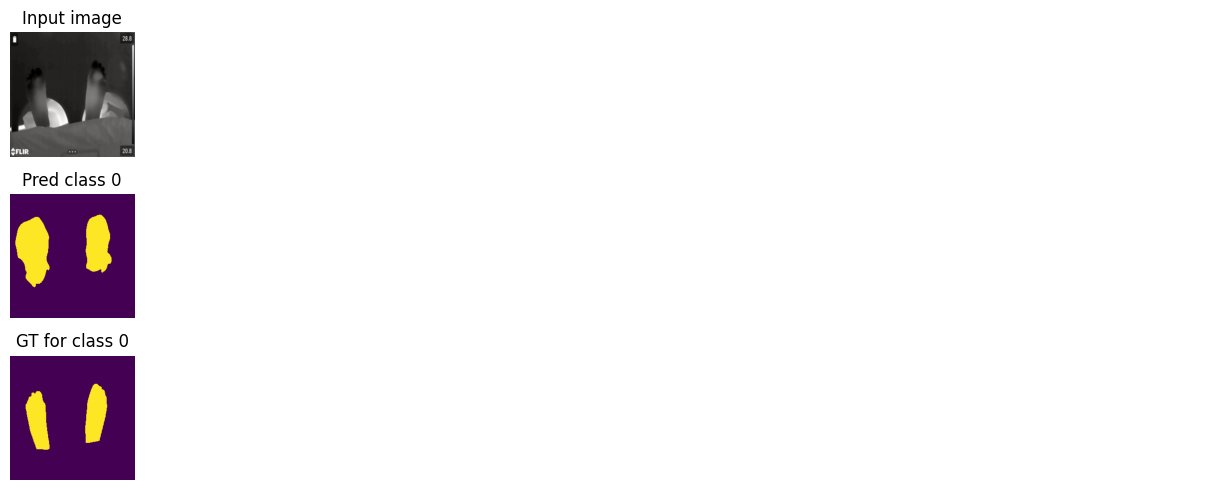

Train loss: 0.17590 | Time: 3m 46s | Val loss: 0.15202
Train_DICE_avg: 0.86005 | Train_Jaccard_avg: 0.76188 | Train_Sensitivity_avg: 0.82303 | Train_Specificity_avg: 0.96733 
Class 0 - Train_DICE: 0.86005 | Train_Jaccard: 0.76188 | Train_Sensitivity: 0.82303 | Train_Specificity: 0.96733 
Val_DICE_avg: 0.87932 | Val_Jaccard_avg: 0.79103 | Val_Sensitivity_avg: 0.85626 | Val_Specificity_avg: 0.96684 
Class 0 - Val_DICE: 0.87932 | Val_Jaccard: 0.79103 | Val_Sensitivity: 0.85626 | Val_Specificity: 0.96684 

Epoch 57/61


Validation Epoch 57/61: 100%|██████████| 2/2 [00:00<00:00,  3.01it/s]


Train loss: 0.17809 | Time: 3m 50s | Val loss: 0.15090
Train_DICE_avg: 0.85715 | Train_Jaccard_avg: 0.75704 | Train_Sensitivity_avg: 0.82156 | Train_Specificity_avg: 0.96506 
Class 0 - Train_DICE: 0.85715 | Train_Jaccard: 0.75704 | Train_Sensitivity: 0.82156 | Train_Specificity: 0.96506 
Val_DICE_avg: 0.88058 | Val_Jaccard_avg: 0.79284 | Val_Sensitivity_avg: 0.86102 | Val_Specificity_avg: 0.96594 
Class 0 - Val_DICE: 0.88058 | Val_Jaccard: 0.79284 | Val_Sensitivity: 0.86102 | Val_Specificity: 0.96594 

Epoch 58/61


Validation Epoch 58/61: 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]


Train loss: 0.17479 | Time: 3m 54s | Val loss: 0.15034
Train_DICE_avg: 0.86098 | Train_Jaccard_avg: 0.76420 | Train_Sensitivity_avg: 0.82540 | Train_Specificity_avg: 0.96707 
Class 0 - Train_DICE: 0.86098 | Train_Jaccard: 0.76420 | Train_Sensitivity: 0.82540 | Train_Specificity: 0.96707 
Val_DICE_avg: 0.88103 | Val_Jaccard_avg: 0.79353 | Val_Sensitivity_avg: 0.86452 | Val_Specificity_avg: 0.96492 
Class 0 - Val_DICE: 0.88103 | Val_Jaccard: 0.79353 | Val_Sensitivity: 0.86452 | Val_Specificity: 0.96492 

Epoch 59/61


Validation Epoch 59/61: 100%|██████████| 2/2 [00:00<00:00,  3.21it/s]


Train loss: 0.17536 | Time: 3m 58s | Val loss: 0.14967
Train_DICE_avg: 0.85978 | Train_Jaccard_avg: 0.76203 | Train_Sensitivity_avg: 0.82627 | Train_Specificity_avg: 0.96606 
Class 0 - Train_DICE: 0.85978 | Train_Jaccard: 0.76203 | Train_Sensitivity: 0.82627 | Train_Specificity: 0.96606 
Val_DICE_avg: 0.88146 | Val_Jaccard_avg: 0.79438 | Val_Sensitivity_avg: 0.86120 | Val_Specificity_avg: 0.96653 
Class 0 - Val_DICE: 0.88146 | Val_Jaccard: 0.79438 | Val_Sensitivity: 0.86120 | Val_Specificity: 0.96653 

Epoch 60/61


Validation Epoch 60/61: 100%|██████████| 2/2 [00:00<00:00,  2.96it/s]


Train loss: 0.17163 | Time: 4m 2s | Val loss: 0.14734
Train_DICE_avg: 0.86345 | Train_Jaccard_avg: 0.76655 | Train_Sensitivity_avg: 0.82619 | Train_Specificity_avg: 0.96773 
Class 0 - Train_DICE: 0.86345 | Train_Jaccard: 0.76655 | Train_Sensitivity: 0.82619 | Train_Specificity: 0.96773 
Val_DICE_avg: 0.88393 | Val_Jaccard_avg: 0.79792 | Val_Sensitivity_avg: 0.86781 | Val_Specificity_avg: 0.96538 
Class 0 - Val_DICE: 0.88393 | Val_Jaccard: 0.79792 | Val_Sensitivity: 0.86781 | Val_Specificity: 0.96538 

Epoch 61/61


Validation Epoch 61/61: 100%|██████████| 2/2 [00:00<00:00,  3.17it/s]


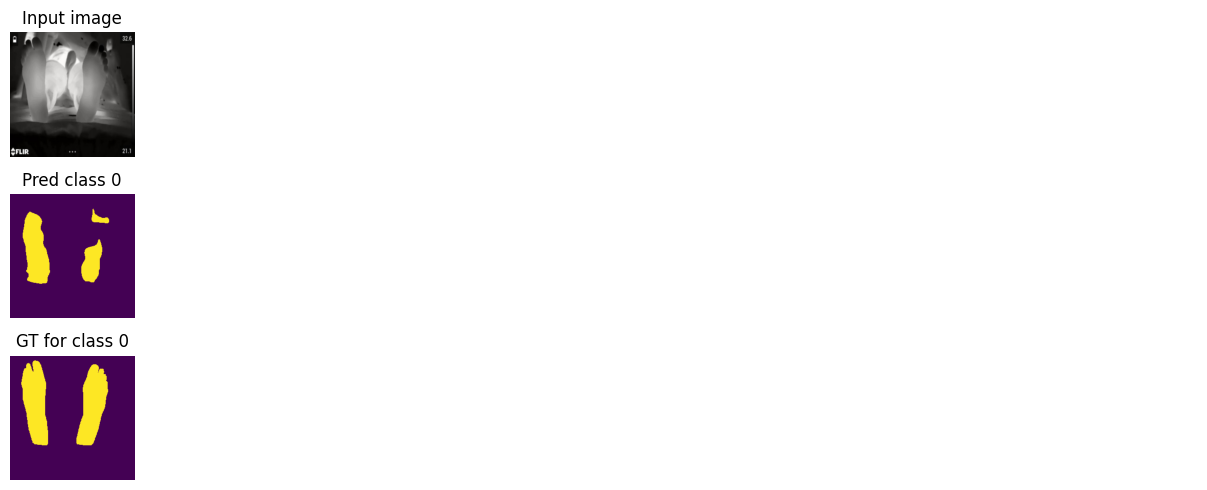

Train loss: 0.17312 | Time: 4m 6s | Val loss: 0.14739
Train_DICE_avg: 0.86223 | Train_Jaccard_avg: 0.76464 | Train_Sensitivity_avg: 0.82901 | Train_Specificity_avg: 0.96578 
Class 0 - Train_DICE: 0.86223 | Train_Jaccard: 0.76464 | Train_Sensitivity: 0.82901 | Train_Specificity: 0.96578 
Val_DICE_avg: 0.88334 | Val_Jaccard_avg: 0.79714 | Val_Sensitivity_avg: 0.86296 | Val_Specificity_avg: 0.96698 
Class 0 - Val_DICE: 0.88334 | Val_Jaccard: 0.79714 | Val_Sensitivity: 0.86296 | Val_Specificity: 0.96698 


Training DICE,▁▁▂▃▃▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇▇█████████████
Training Jaccard,▁▁▂▂▃▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇██████████
Training Loss,█▇▇▆▆▆▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁
Training Sensitivity,▁▂▂▃▃▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇▇▇████████████
Training Specificity,▁▃▆▅▅▅▆▅▆▆▆▆▅▅▆▆▆▆▇▇▇▇▇▇▇▇▇██▇█▇█▇██████
Validation DICE,▁▃▄▄▄▄▄▅▅▅▅▆▅▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇███████████
Validation Jaccard,▁▂▃▄▃▄▄▄▄▄▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇▇█████████████
Validation Loss,██▇▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Validation Sensitivity,▁▂▃▄▃▂▃▃▄▄▅▅▅▆▆▆▆▆▆▆▇█▇▇▇▇▇▇▇▇██████████
Validation Specificity,▁▂▂▃▅▇███▇▇▇▇▆▆▅▆▇▆▇▇▇▅▇▇▇▇▇▇▇▇▆▆▇▇▇▇▇▇▇
Training DICE,0.86223



Training complete!


In [ ]:
trainer = SegmentationModel_Trainer(train_loader=train_dataset,valid_loader=valid_dataset,config=config)
trainer.start()

In [11]:
model = DeepLabV3Plus(in_channels=config["Input size"][0],out_channels=config["Number of classes"], final_activation=config["Activation function"])
state_dict = torch.load('./models/best_model(1).pt', weights_only=True)
model.load_state_dict(state_dict)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 188MB/s]


<All keys matched successfully>

In [12]:
PerformanceModels(model=model,test_dataset=test_dataset,config=config)

Testing model's performance: 100%|██████████| 1/1 [00:01<00:00,  1.04s/it]


Global Performance Metrics:
Loss mean: 0.16934, std: 0.00000
Dice Coefficient mean: 0.86117, std: 0.10621
Jaccard Index mean: 0.76871, std: 0.13608
Sensitivity mean: 0.91367, std: 0.07657
Specificity mean: 0.94556, std: 0.03805

Per-Class Performance Metrics:

Class 0:
Dice mean: 0.86117, std: 0.10621
Jaccard mean: 0.76871, std: 0.13608
Sensitivity mean: 0.91367, std: 0.07657
Specificity mean: 0.94556, std: 0.03805


### Cross-Entropy Loss

In [13]:
config["Activation function"] = None
config["Loss function"] = "CrossEntropy"
config["Wandb monitoring"] = ["5092b6e1a9fb50d7448b32f2db4d0163bb5ef14f","MasterTests","FeetMamitas-DeepLabV3+-CrossEntropy"]

Automatic Mixed Precision (AMP) enabled.
DEVICE INFORMATION
Current device: cuda:0
Device type: cuda
CUDA available: Yes
CUDA version: 12.4
Number of CUDA devices: 1
Current CUDA device index: 0
Current CUDA device name: NVIDIA A100-SXM4-40GB
GPU Memory - Allocated: 0.56 GB
GPU Memory - Reserved: 1.38 GB
GPU Memory - Total: 39.56 GB
GPU Compute Capability: 8.0
GPU Multiprocessors: 108
PyTorch version: 2.6.0+cu124


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc



Epoch 1/61
Training phase 1


Validation Epoch 1/61: 100%|██████████| 2/2 [00:00<00:00,  3.18it/s]


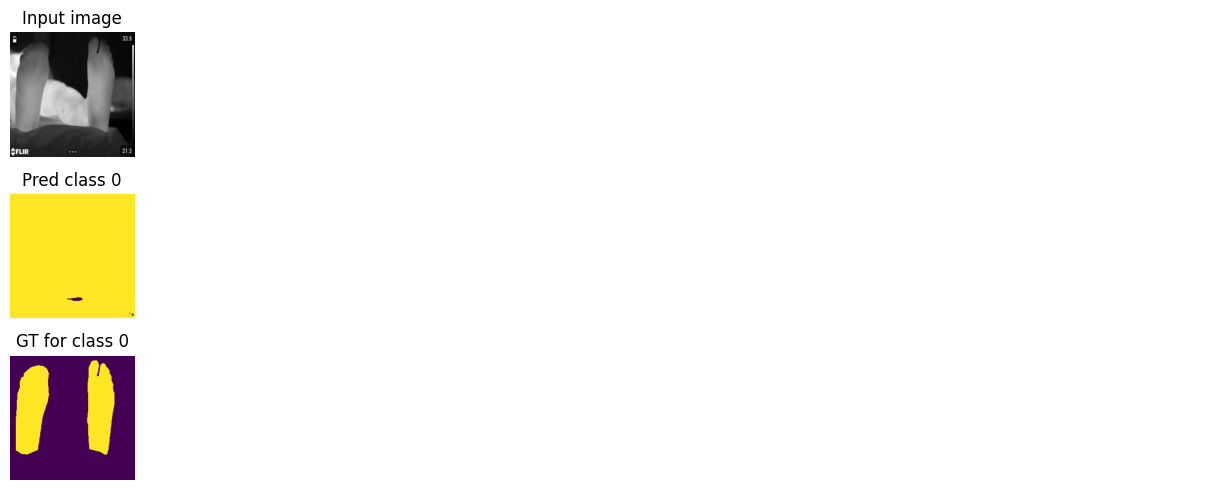

Train loss: 0.75882 | Time: 0m 4s | Val loss: 0.69695
Train_DICE_avg: 0.36405 | Train_Jaccard_avg: 0.23314 | Train_Sensitivity_avg: 0.35356 | Train_Specificity_avg: 0.80771 
Class 0 - Train_DICE: 0.36405 | Train_Jaccard: 0.23314 | Train_Sensitivity: 0.35356 | Train_Specificity: 0.80771 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 2/61


Validation Epoch 2/61: 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]


Train loss: 0.67253 | Time: 0m 7s | Val loss: 0.68370
Train_DICE_avg: 0.54664 | Train_Jaccard_avg: 0.38739 | Train_Sensitivity_avg: 0.49254 | Train_Specificity_avg: 0.88417 
Class 0 - Train_DICE: 0.54664 | Train_Jaccard: 0.38739 | Train_Sensitivity: 0.49254 | Train_Specificity: 0.88417 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 3/61


Validation Epoch 3/61: 100%|██████████| 2/2 [00:00<00:00,  3.03it/s]


Train loss: 0.61161 | Time: 0m 11s | Val loss: 0.64538
Train_DICE_avg: 0.60665 | Train_Jaccard_avg: 0.44753 | Train_Sensitivity_avg: 0.55888 | Train_Specificity_avg: 0.90109 
Class 0 - Train_DICE: 0.60665 | Train_Jaccard: 0.44753 | Train_Sensitivity: 0.55888 | Train_Specificity: 0.90109 
Val_DICE_avg: 0.11220 | Val_Jaccard_avg: 0.06717 | Val_Sensitivity_avg: 0.97194 | Val_Specificity_avg: 0.76003 
Class 0 - Val_DICE: 0.11220 | Val_Jaccard: 0.06717 | Val_Sensitivity: 0.97194 | Val_Specificity: 0.76003 

Epoch 4/61


Validation Epoch 4/61: 100%|██████████| 2/2 [00:00<00:00,  3.08it/s]


Train loss: 0.56623 | Time: 0m 15s | Val loss: 0.59039
Train_DICE_avg: 0.63310 | Train_Jaccard_avg: 0.47649 | Train_Sensitivity_avg: 0.59245 | Train_Specificity_avg: 0.90642 
Class 0 - Train_DICE: 0.63310 | Train_Jaccard: 0.47649 | Train_Sensitivity: 0.59245 | Train_Specificity: 0.90642 
Val_DICE_avg: 0.62702 | Val_Jaccard_avg: 0.47435 | Val_Sensitivity_avg: 0.78292 | Val_Specificity_avg: 0.86350 
Class 0 - Val_DICE: 0.62702 | Val_Jaccard: 0.47435 | Val_Sensitivity: 0.78292 | Val_Specificity: 0.86350 

Epoch 5/61


Validation Epoch 5/61: 100%|██████████| 2/2 [00:00<00:00,  3.21it/s]


Train loss: 0.52828 | Time: 0m 19s | Val loss: 0.57093
Train_DICE_avg: 0.64794 | Train_Jaccard_avg: 0.49276 | Train_Sensitivity_avg: 0.61408 | Train_Specificity_avg: 0.90725 
Class 0 - Train_DICE: 0.64794 | Train_Jaccard: 0.49276 | Train_Sensitivity: 0.61408 | Train_Specificity: 0.90725 
Val_DICE_avg: 0.71603 | Val_Jaccard_avg: 0.56785 | Val_Sensitivity_avg: 0.66225 | Val_Specificity_avg: 0.93256 
Class 0 - Val_DICE: 0.71603 | Val_Jaccard: 0.56785 | Val_Sensitivity: 0.66225 | Val_Specificity: 0.93256 

Epoch 6/61


Validation Epoch 6/61: 100%|██████████| 2/2 [00:00<00:00,  3.06it/s]


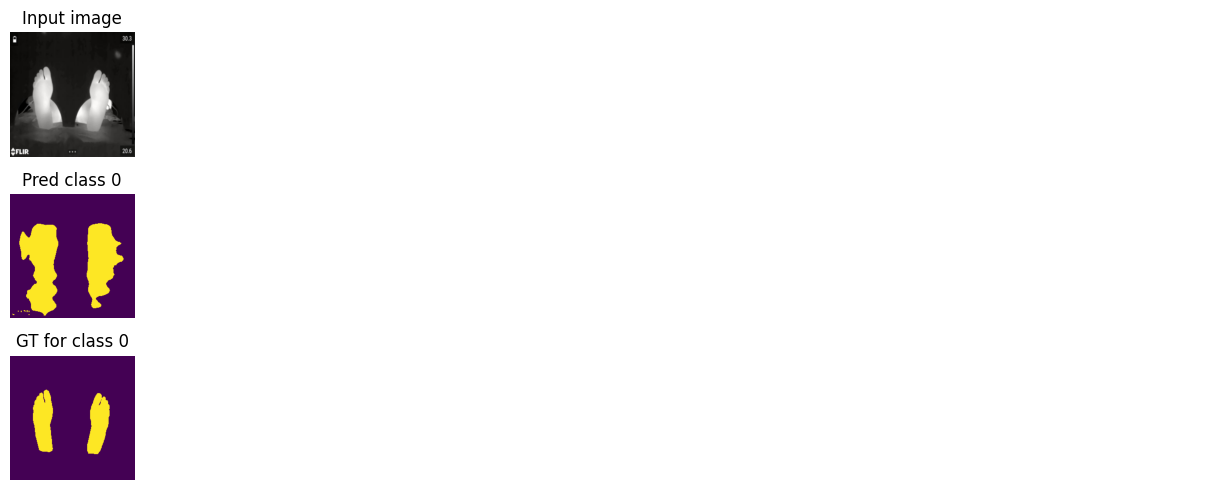

Train loss: 0.49902 | Time: 0m 23s | Val loss: 0.57778
Train_DICE_avg: 0.66221 | Train_Jaccard_avg: 0.50900 | Train_Sensitivity_avg: 0.63779 | Train_Specificity_avg: 0.90822 
Class 0 - Train_DICE: 0.66221 | Train_Jaccard: 0.50900 | Train_Sensitivity: 0.63779 | Train_Specificity: 0.90822 
Val_DICE_avg: 0.71273 | Val_Jaccard_avg: 0.56437 | Val_Sensitivity_avg: 0.61340 | Val_Specificity_avg: 0.95651 
Class 0 - Val_DICE: 0.71273 | Val_Jaccard: 0.56437 | Val_Sensitivity: 0.61340 | Val_Specificity: 0.95651 

Epoch 7/61


Validation Epoch 7/61: 100%|██████████| 2/2 [00:00<00:00,  3.06it/s]


Train loss: 0.47318 | Time: 0m 27s | Val loss: 0.62399
Train_DICE_avg: 0.67077 | Train_Jaccard_avg: 0.51715 | Train_Sensitivity_avg: 0.66173 | Train_Specificity_avg: 0.90488 
Class 0 - Train_DICE: 0.67077 | Train_Jaccard: 0.51715 | Train_Sensitivity: 0.66173 | Train_Specificity: 0.90488 
Val_DICE_avg: 0.69690 | Val_Jaccard_avg: 0.54546 | Val_Sensitivity_avg: 0.56837 | Val_Specificity_avg: 0.97331 
Class 0 - Val_DICE: 0.69690 | Val_Jaccard: 0.54546 | Val_Sensitivity: 0.56837 | Val_Specificity: 0.97331 

Epoch 8/61


Validation Epoch 8/61: 100%|██████████| 2/2 [00:00<00:00,  3.19it/s]


Train loss: 0.44813 | Time: 0m 31s | Val loss: 0.54793
Train_DICE_avg: 0.67817 | Train_Jaccard_avg: 0.52606 | Train_Sensitivity_avg: 0.69073 | Train_Specificity_avg: 0.90283 
Class 0 - Train_DICE: 0.67817 | Train_Jaccard: 0.52606 | Train_Sensitivity: 0.69073 | Train_Specificity: 0.90283 
Val_DICE_avg: 0.72298 | Val_Jaccard_avg: 0.57610 | Val_Sensitivity_avg: 0.61663 | Val_Specificity_avg: 0.96398 
Class 0 - Val_DICE: 0.72298 | Val_Jaccard: 0.57610 | Val_Sensitivity: 0.61663 | Val_Specificity: 0.96398 

Epoch 9/61


Validation Epoch 9/61: 100%|██████████| 2/2 [00:00<00:00,  3.22it/s]


Train loss: 0.42296 | Time: 0m 34s | Val loss: 0.48349
Train_DICE_avg: 0.68838 | Train_Jaccard_avg: 0.53800 | Train_Sensitivity_avg: 0.71122 | Train_Specificity_avg: 0.90411 
Class 0 - Train_DICE: 0.68838 | Train_Jaccard: 0.53800 | Train_Sensitivity: 0.71122 | Train_Specificity: 0.90411 
Val_DICE_avg: 0.75088 | Val_Jaccard_avg: 0.61035 | Val_Sensitivity_avg: 0.66653 | Val_Specificity_avg: 0.95734 
Class 0 - Val_DICE: 0.75088 | Val_Jaccard: 0.61035 | Val_Sensitivity: 0.66653 | Val_Specificity: 0.95734 

Epoch 10/61


Validation Epoch 10/61: 100%|██████████| 2/2 [00:00<00:00,  3.21it/s]


Train loss: 0.40779 | Time: 0m 38s | Val loss: 0.40282
Train_DICE_avg: 0.68865 | Train_Jaccard_avg: 0.53900 | Train_Sensitivity_avg: 0.71882 | Train_Specificity_avg: 0.90101 
Class 0 - Train_DICE: 0.68865 | Train_Jaccard: 0.53900 | Train_Sensitivity: 0.71882 | Train_Specificity: 0.90101 
Val_DICE_avg: 0.76968 | Val_Jaccard_avg: 0.63596 | Val_Sensitivity_avg: 0.73375 | Val_Specificity_avg: 0.94122 
Class 0 - Val_DICE: 0.76968 | Val_Jaccard: 0.63596 | Val_Sensitivity: 0.73375 | Val_Specificity: 0.94122 

Epoch 11/61
Training phase 2


Validation Epoch 11/61: 100%|██████████| 2/2 [00:00<00:00,  3.19it/s]


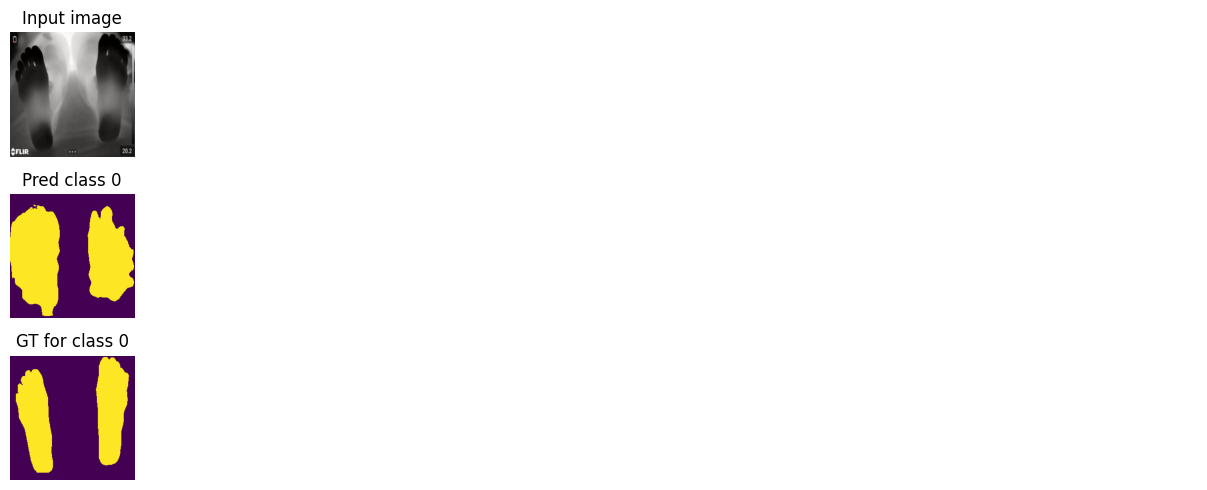

Train loss: 0.40017 | Time: 0m 43s | Val loss: 0.37226
Train_DICE_avg: 0.68341 | Train_Jaccard_avg: 0.53346 | Train_Sensitivity_avg: 0.73079 | Train_Specificity_avg: 0.89543 
Class 0 - Train_DICE: 0.68341 | Train_Jaccard: 0.53346 | Train_Sensitivity: 0.73079 | Train_Specificity: 0.89543 
Val_DICE_avg: 0.76968 | Val_Jaccard_avg: 0.63716 | Val_Sensitivity_avg: 0.76412 | Val_Specificity_avg: 0.93133 
Class 0 - Val_DICE: 0.76968 | Val_Jaccard: 0.63716 | Val_Sensitivity: 0.76412 | Val_Specificity: 0.93133 

Epoch 12/61


Validation Epoch 12/61: 100%|██████████| 2/2 [00:00<00:00,  3.18it/s]


Train loss: 0.37844 | Time: 0m 47s | Val loss: 0.33321
Train_DICE_avg: 0.69008 | Train_Jaccard_avg: 0.54256 | Train_Sensitivity_avg: 0.74778 | Train_Specificity_avg: 0.89639 
Class 0 - Train_DICE: 0.69008 | Train_Jaccard: 0.54256 | Train_Sensitivity: 0.74778 | Train_Specificity: 0.89639 
Val_DICE_avg: 0.77343 | Val_Jaccard_avg: 0.64303 | Val_Sensitivity_avg: 0.79515 | Val_Specificity_avg: 0.92316 
Class 0 - Val_DICE: 0.77343 | Val_Jaccard: 0.64303 | Val_Sensitivity: 0.79515 | Val_Specificity: 0.92316 

Epoch 13/61


Validation Epoch 13/61: 100%|██████████| 2/2 [00:00<00:00,  3.14it/s]


Train loss: 0.37026 | Time: 0m 51s | Val loss: 0.32192
Train_DICE_avg: 0.68692 | Train_Jaccard_avg: 0.54017 | Train_Sensitivity_avg: 0.75344 | Train_Specificity_avg: 0.89487 
Class 0 - Train_DICE: 0.68692 | Train_Jaccard: 0.54017 | Train_Sensitivity: 0.75344 | Train_Specificity: 0.89487 
Val_DICE_avg: 0.77723 | Val_Jaccard_avg: 0.64878 | Val_Sensitivity_avg: 0.79793 | Val_Specificity_avg: 0.92378 
Class 0 - Val_DICE: 0.77723 | Val_Jaccard: 0.64878 | Val_Sensitivity: 0.79793 | Val_Specificity: 0.92378 

Epoch 14/61


Validation Epoch 14/61: 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]


Train loss: 0.35068 | Time: 0m 54s | Val loss: 0.30197
Train_DICE_avg: 0.69986 | Train_Jaccard_avg: 0.55340 | Train_Sensitivity_avg: 0.77289 | Train_Specificity_avg: 0.89529 
Class 0 - Train_DICE: 0.69986 | Train_Jaccard: 0.55340 | Train_Sensitivity: 0.77289 | Train_Specificity: 0.89529 
Val_DICE_avg: 0.76817 | Val_Jaccard_avg: 0.63979 | Val_Sensitivity_avg: 0.82289 | Val_Specificity_avg: 0.91402 
Class 0 - Val_DICE: 0.76817 | Val_Jaccard: 0.63979 | Val_Sensitivity: 0.82289 | Val_Specificity: 0.91402 

Epoch 15/61


Validation Epoch 15/61: 100%|██████████| 2/2 [00:00<00:00,  3.18it/s]


Train loss: 0.33792 | Time: 0m 58s | Val loss: 0.29662
Train_DICE_avg: 0.70097 | Train_Jaccard_avg: 0.55666 | Train_Sensitivity_avg: 0.78402 | Train_Specificity_avg: 0.89479 
Class 0 - Train_DICE: 0.70097 | Train_Jaccard: 0.55666 | Train_Sensitivity: 0.78402 | Train_Specificity: 0.89479 
Val_DICE_avg: 0.77545 | Val_Jaccard_avg: 0.65011 | Val_Sensitivity_avg: 0.81736 | Val_Specificity_avg: 0.92098 
Class 0 - Val_DICE: 0.77545 | Val_Jaccard: 0.65011 | Val_Sensitivity: 0.81736 | Val_Specificity: 0.92098 

Epoch 16/61


Validation Epoch 16/61: 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]


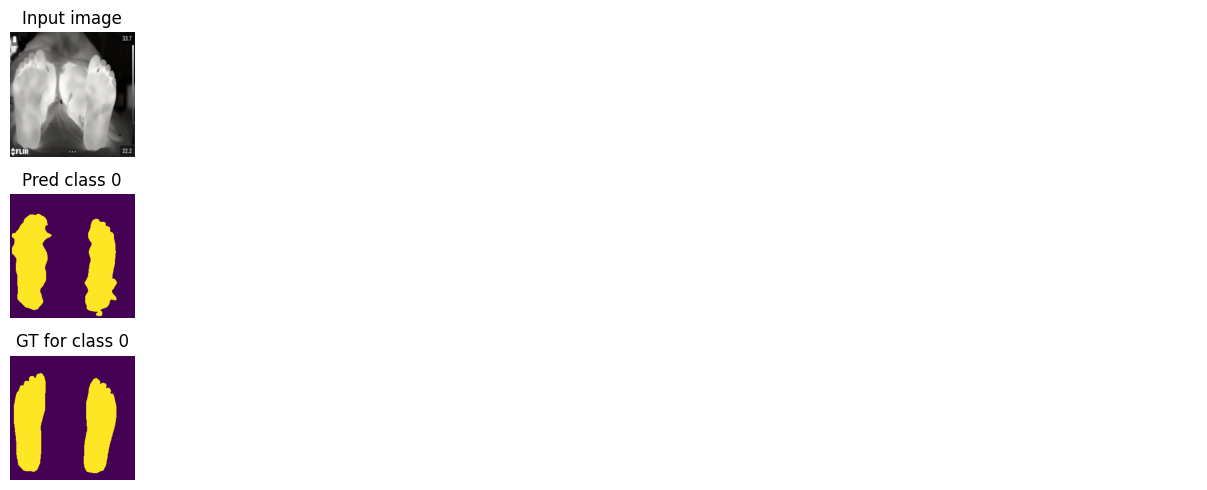

Train loss: 0.33013 | Time: 1m 3s | Val loss: 0.28064
Train_DICE_avg: 0.70251 | Train_Jaccard_avg: 0.56067 | Train_Sensitivity_avg: 0.79036 | Train_Specificity_avg: 0.89594 
Class 0 - Train_DICE: 0.70251 | Train_Jaccard: 0.56067 | Train_Sensitivity: 0.79036 | Train_Specificity: 0.89594 
Val_DICE_avg: 0.78353 | Val_Jaccard_avg: 0.66052 | Val_Sensitivity_avg: 0.83016 | Val_Specificity_avg: 0.92066 
Class 0 - Val_DICE: 0.78353 | Val_Jaccard: 0.66052 | Val_Sensitivity: 0.83016 | Val_Specificity: 0.92066 

Epoch 17/61


Validation Epoch 17/61: 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]


Train loss: 0.31557 | Time: 1m 6s | Val loss: 0.25793
Train_DICE_avg: 0.71740 | Train_Jaccard_avg: 0.57555 | Train_Sensitivity_avg: 0.80430 | Train_Specificity_avg: 0.89783 
Class 0 - Train_DICE: 0.71740 | Train_Jaccard: 0.57555 | Train_Sensitivity: 0.80430 | Train_Specificity: 0.89783 
Val_DICE_avg: 0.75488 | Val_Jaccard_avg: 0.62601 | Val_Sensitivity_avg: 0.87727 | Val_Specificity_avg: 0.89836 
Class 0 - Val_DICE: 0.75488 | Val_Jaccard: 0.62601 | Val_Sensitivity: 0.87727 | Val_Specificity: 0.89836 

Epoch 18/61


Validation Epoch 18/61: 100%|██████████| 2/2 [00:00<00:00,  3.20it/s]


Train loss: 0.31159 | Time: 1m 10s | Val loss: 0.25498
Train_DICE_avg: 0.70757 | Train_Jaccard_avg: 0.56634 | Train_Sensitivity_avg: 0.80171 | Train_Specificity_avg: 0.89562 
Class 0 - Train_DICE: 0.70757 | Train_Jaccard: 0.56634 | Train_Sensitivity: 0.80171 | Train_Specificity: 0.89562 
Val_DICE_avg: 0.77409 | Val_Jaccard_avg: 0.64962 | Val_Sensitivity_avg: 0.85930 | Val_Specificity_avg: 0.90901 
Class 0 - Val_DICE: 0.77409 | Val_Jaccard: 0.64962 | Val_Sensitivity: 0.85930 | Val_Specificity: 0.90901 

Epoch 19/61


Validation Epoch 19/61: 100%|██████████| 2/2 [00:00<00:00,  3.18it/s]


Train loss: 0.30216 | Time: 1m 14s | Val loss: 0.25153
Train_DICE_avg: 0.71586 | Train_Jaccard_avg: 0.57353 | Train_Sensitivity_avg: 0.81074 | Train_Specificity_avg: 0.89539 
Class 0 - Train_DICE: 0.71586 | Train_Jaccard: 0.57353 | Train_Sensitivity: 0.81074 | Train_Specificity: 0.89539 
Val_DICE_avg: 0.77855 | Val_Jaccard_avg: 0.65558 | Val_Sensitivity_avg: 0.86024 | Val_Specificity_avg: 0.91125 
Class 0 - Val_DICE: 0.77855 | Val_Jaccard: 0.65558 | Val_Sensitivity: 0.86024 | Val_Specificity: 0.91125 

Epoch 20/61


Validation Epoch 20/61: 100%|██████████| 2/2 [00:00<00:00,  3.17it/s]


Train loss: 0.29463 | Time: 1m 18s | Val loss: 0.24771
Train_DICE_avg: 0.72583 | Train_Jaccard_avg: 0.58653 | Train_Sensitivity_avg: 0.81348 | Train_Specificity_avg: 0.89815 
Class 0 - Train_DICE: 0.72583 | Train_Jaccard: 0.58653 | Train_Sensitivity: 0.81348 | Train_Specificity: 0.89815 
Val_DICE_avg: 0.77796 | Val_Jaccard_avg: 0.65683 | Val_Sensitivity_avg: 0.85608 | Val_Specificity_avg: 0.91556 
Class 0 - Val_DICE: 0.77796 | Val_Jaccard: 0.65683 | Val_Sensitivity: 0.85608 | Val_Specificity: 0.91556 

Epoch 21/61
Training phase 3


Validation Epoch 21/61: 100%|██████████| 2/2 [00:00<00:00,  3.18it/s]


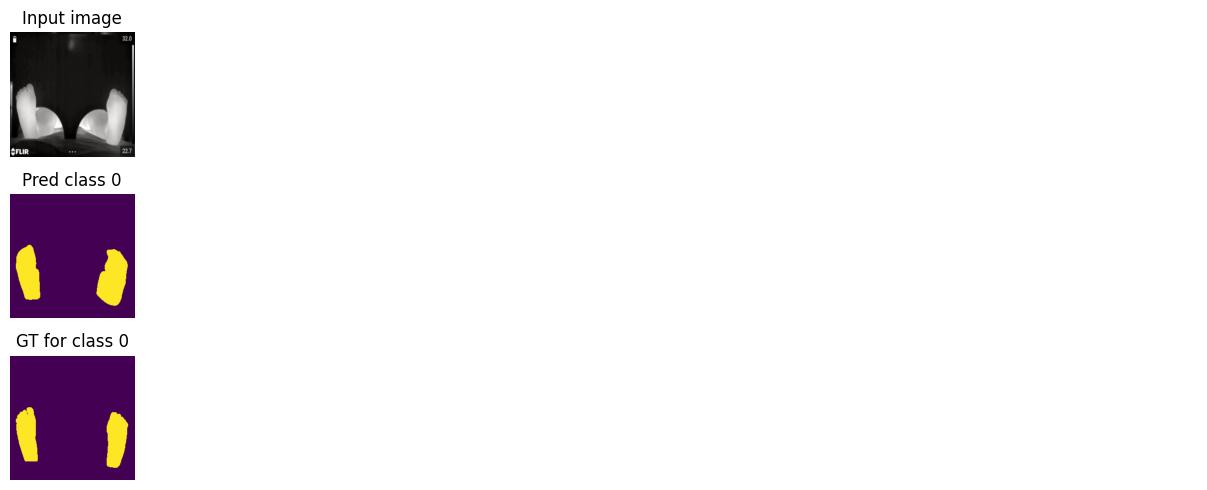

Train loss: 0.29937 | Time: 1m 22s | Val loss: 0.24220
Train_DICE_avg: 0.70756 | Train_Jaccard_avg: 0.56547 | Train_Sensitivity_avg: 0.80836 | Train_Specificity_avg: 0.89228 
Class 0 - Train_DICE: 0.70756 | Train_Jaccard: 0.56547 | Train_Sensitivity: 0.80836 | Train_Specificity: 0.89228 
Val_DICE_avg: 0.74447 | Val_Jaccard_avg: 0.61839 | Val_Sensitivity_avg: 0.89553 | Val_Specificity_avg: 0.89780 
Class 0 - Val_DICE: 0.74447 | Val_Jaccard: 0.61839 | Val_Sensitivity: 0.89553 | Val_Specificity: 0.89780 

Epoch 22/61


Validation Epoch 22/61: 100%|██████████| 2/2 [00:00<00:00,  3.19it/s]


Train loss: 0.28222 | Time: 1m 25s | Val loss: 0.23679
Train_DICE_avg: 0.71861 | Train_Jaccard_avg: 0.58103 | Train_Sensitivity_avg: 0.82925 | Train_Specificity_avg: 0.89641 
Class 0 - Train_DICE: 0.71861 | Train_Jaccard: 0.58103 | Train_Sensitivity: 0.82925 | Train_Specificity: 0.89641 
Val_DICE_avg: 0.75658 | Val_Jaccard_avg: 0.63071 | Val_Sensitivity_avg: 0.87918 | Val_Specificity_avg: 0.90354 
Class 0 - Val_DICE: 0.75658 | Val_Jaccard: 0.63071 | Val_Sensitivity: 0.87918 | Val_Specificity: 0.90354 

Epoch 23/61


Validation Epoch 23/61: 100%|██████████| 2/2 [00:00<00:00,  3.23it/s]


Train loss: 0.27413 | Time: 1m 29s | Val loss: 0.23121
Train_DICE_avg: 0.73187 | Train_Jaccard_avg: 0.59464 | Train_Sensitivity_avg: 0.82659 | Train_Specificity_avg: 0.90023 
Class 0 - Train_DICE: 0.73187 | Train_Jaccard: 0.59464 | Train_Sensitivity: 0.82659 | Train_Specificity: 0.90023 
Val_DICE_avg: 0.80095 | Val_Jaccard_avg: 0.68453 | Val_Sensitivity_avg: 0.85901 | Val_Specificity_avg: 0.92413 
Class 0 - Val_DICE: 0.80095 | Val_Jaccard: 0.68453 | Val_Sensitivity: 0.85901 | Val_Specificity: 0.92413 

Epoch 24/61


Validation Epoch 24/61: 100%|██████████| 2/2 [00:00<00:00,  3.19it/s]


Train loss: 0.26438 | Time: 1m 33s | Val loss: 0.21990
Train_DICE_avg: 0.74752 | Train_Jaccard_avg: 0.61151 | Train_Sensitivity_avg: 0.84040 | Train_Specificity_avg: 0.90262 
Class 0 - Train_DICE: 0.74752 | Train_Jaccard: 0.61151 | Train_Sensitivity: 0.84040 | Train_Specificity: 0.90262 
Val_DICE_avg: 0.77700 | Val_Jaccard_avg: 0.65398 | Val_Sensitivity_avg: 0.89322 | Val_Specificity_avg: 0.90539 
Class 0 - Val_DICE: 0.77700 | Val_Jaccard: 0.65398 | Val_Sensitivity: 0.89322 | Val_Specificity: 0.90539 

Epoch 25/61


Validation Epoch 25/61: 100%|██████████| 2/2 [00:00<00:00,  3.18it/s]


Train loss: 0.25562 | Time: 1m 37s | Val loss: 0.22241
Train_DICE_avg: 0.74862 | Train_Jaccard_avg: 0.61448 | Train_Sensitivity_avg: 0.84872 | Train_Specificity_avg: 0.90337 
Class 0 - Train_DICE: 0.74862 | Train_Jaccard: 0.61448 | Train_Sensitivity: 0.84872 | Train_Specificity: 0.90337 
Val_DICE_avg: 0.81579 | Val_Jaccard_avg: 0.70287 | Val_Sensitivity_avg: 0.85179 | Val_Specificity_avg: 0.93211 
Class 0 - Val_DICE: 0.81579 | Val_Jaccard: 0.70287 | Val_Sensitivity: 0.85179 | Val_Specificity: 0.93211 

Epoch 26/61


Validation Epoch 26/61: 100%|██████████| 2/2 [00:00<00:00,  3.17it/s]


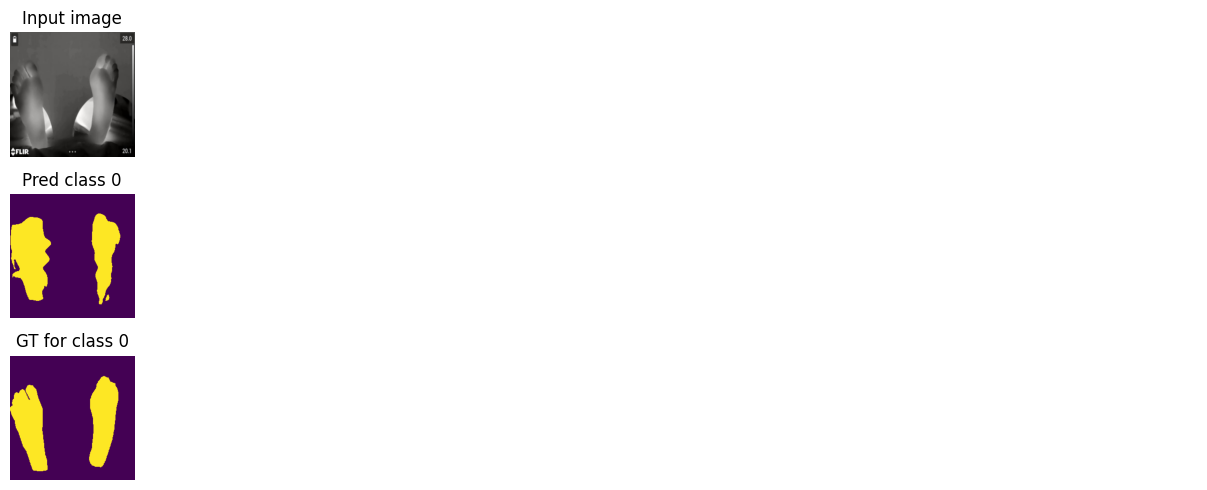

Train loss: 0.24701 | Time: 1m 41s | Val loss: 0.21211
Train_DICE_avg: 0.75627 | Train_Jaccard_avg: 0.62364 | Train_Sensitivity_avg: 0.85049 | Train_Specificity_avg: 0.90679 
Class 0 - Train_DICE: 0.75627 | Train_Jaccard: 0.62364 | Train_Sensitivity: 0.85049 | Train_Specificity: 0.90679 
Val_DICE_avg: 0.79769 | Val_Jaccard_avg: 0.68076 | Val_Sensitivity_avg: 0.87863 | Val_Specificity_avg: 0.91652 
Class 0 - Val_DICE: 0.79769 | Val_Jaccard: 0.68076 | Val_Sensitivity: 0.87863 | Val_Specificity: 0.91652 

Epoch 27/61


Validation Epoch 27/61: 100%|██████████| 2/2 [00:00<00:00,  3.21it/s]


Train loss: 0.24172 | Time: 1m 45s | Val loss: 0.20848
Train_DICE_avg: 0.76269 | Train_Jaccard_avg: 0.62996 | Train_Sensitivity_avg: 0.84986 | Train_Specificity_avg: 0.90912 
Class 0 - Train_DICE: 0.76269 | Train_Jaccard: 0.62996 | Train_Sensitivity: 0.84986 | Train_Specificity: 0.90912 
Val_DICE_avg: 0.76907 | Val_Jaccard_avg: 0.64479 | Val_Sensitivity_avg: 0.92212 | Val_Specificity_avg: 0.89635 
Class 0 - Val_DICE: 0.76907 | Val_Jaccard: 0.64479 | Val_Sensitivity: 0.92212 | Val_Specificity: 0.89635 

Epoch 28/61


Validation Epoch 28/61: 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]


Train loss: 0.23719 | Time: 1m 49s | Val loss: 0.19962
Train_DICE_avg: 0.76639 | Train_Jaccard_avg: 0.63698 | Train_Sensitivity_avg: 0.85654 | Train_Specificity_avg: 0.90928 
Class 0 - Train_DICE: 0.76639 | Train_Jaccard: 0.63698 | Train_Sensitivity: 0.85654 | Train_Specificity: 0.90928 
Val_DICE_avg: 0.82105 | Val_Jaccard_avg: 0.71163 | Val_Sensitivity_avg: 0.87868 | Val_Specificity_avg: 0.92877 
Class 0 - Val_DICE: 0.82105 | Val_Jaccard: 0.71163 | Val_Sensitivity: 0.87868 | Val_Specificity: 0.92877 

Epoch 29/61


Validation Epoch 29/61: 100%|██████████| 2/2 [00:00<00:00,  3.21it/s]


Train loss: 0.23045 | Time: 1m 53s | Val loss: 0.19352
Train_DICE_avg: 0.77159 | Train_Jaccard_avg: 0.64364 | Train_Sensitivity_avg: 0.86203 | Train_Specificity_avg: 0.91126 
Class 0 - Train_DICE: 0.77159 | Train_Jaccard: 0.64364 | Train_Sensitivity: 0.86203 | Train_Specificity: 0.91126 
Val_DICE_avg: 0.82264 | Val_Jaccard_avg: 0.71274 | Val_Sensitivity_avg: 0.89152 | Val_Specificity_avg: 0.92477 
Class 0 - Val_DICE: 0.82264 | Val_Jaccard: 0.71274 | Val_Sensitivity: 0.89152 | Val_Specificity: 0.92477 

Epoch 30/61


Validation Epoch 30/61: 100%|██████████| 2/2 [00:00<00:00,  3.20it/s]


Train loss: 0.22159 | Time: 1m 57s | Val loss: 0.18943
Train_DICE_avg: 0.78141 | Train_Jaccard_avg: 0.65457 | Train_Sensitivity_avg: 0.86727 | Train_Specificity_avg: 0.91316 
Class 0 - Train_DICE: 0.78141 | Train_Jaccard: 0.65457 | Train_Sensitivity: 0.86727 | Train_Specificity: 0.91316 
Val_DICE_avg: 0.82225 | Val_Jaccard_avg: 0.71234 | Val_Sensitivity_avg: 0.90017 | Val_Specificity_avg: 0.92279 
Class 0 - Val_DICE: 0.82225 | Val_Jaccard: 0.71234 | Val_Sensitivity: 0.90017 | Val_Specificity: 0.92279 

Epoch 31/61
Training phase 4


Validation Epoch 31/61: 100%|██████████| 2/2 [00:00<00:00,  2.94it/s]


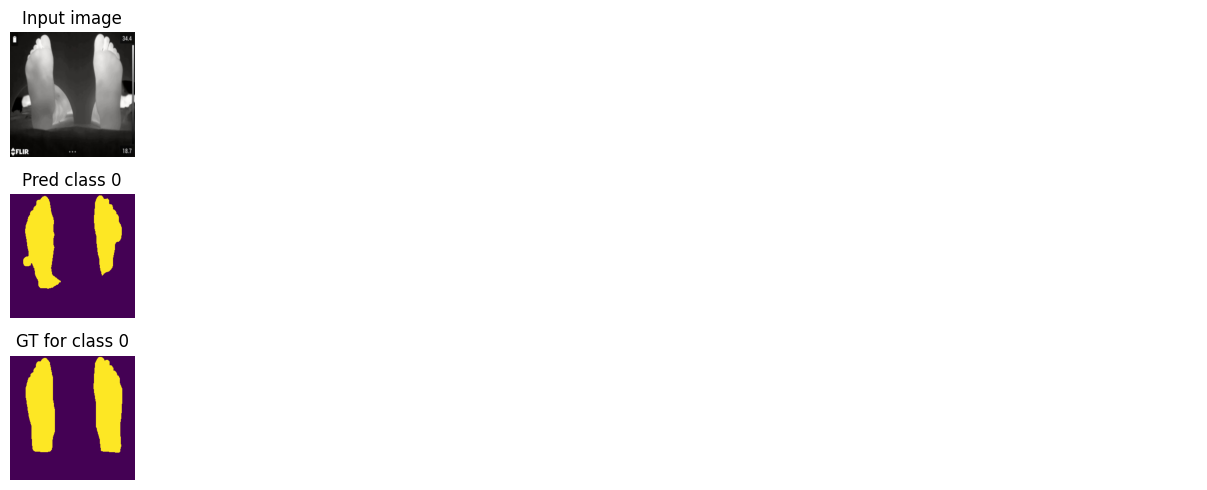

Train loss: 0.22005 | Time: 2m 1s | Val loss: 0.18584
Train_DICE_avg: 0.77290 | Train_Jaccard_avg: 0.64612 | Train_Sensitivity_avg: 0.87274 | Train_Specificity_avg: 0.91031 
Class 0 - Train_DICE: 0.77290 | Train_Jaccard: 0.64612 | Train_Sensitivity: 0.87274 | Train_Specificity: 0.91031 
Val_DICE_avg: 0.80091 | Val_Jaccard_avg: 0.68816 | Val_Sensitivity_avg: 0.90967 | Val_Specificity_avg: 0.91769 
Class 0 - Val_DICE: 0.80091 | Val_Jaccard: 0.68816 | Val_Sensitivity: 0.90967 | Val_Specificity: 0.91769 

Epoch 32/61


Validation Epoch 32/61: 100%|██████████| 2/2 [00:00<00:00,  3.17it/s]


Train loss: 0.21902 | Time: 2m 5s | Val loss: 0.18184
Train_DICE_avg: 0.77597 | Train_Jaccard_avg: 0.65065 | Train_Sensitivity_avg: 0.87263 | Train_Specificity_avg: 0.91224 
Class 0 - Train_DICE: 0.77597 | Train_Jaccard: 0.65065 | Train_Sensitivity: 0.87263 | Train_Specificity: 0.91224 
Val_DICE_avg: 0.82469 | Val_Jaccard_avg: 0.71505 | Val_Sensitivity_avg: 0.90922 | Val_Specificity_avg: 0.92358 
Class 0 - Val_DICE: 0.82469 | Val_Jaccard: 0.71505 | Val_Sensitivity: 0.90922 | Val_Specificity: 0.92358 

Epoch 33/61


Validation Epoch 33/61: 100%|██████████| 2/2 [00:00<00:00,  3.20it/s]


Train loss: 0.20892 | Time: 2m 9s | Val loss: 0.17919
Train_DICE_avg: 0.78758 | Train_Jaccard_avg: 0.66513 | Train_Sensitivity_avg: 0.87603 | Train_Specificity_avg: 0.91769 
Class 0 - Train_DICE: 0.78758 | Train_Jaccard: 0.66513 | Train_Sensitivity: 0.87603 | Train_Specificity: 0.91769 
Val_DICE_avg: 0.84055 | Val_Jaccard_avg: 0.73855 | Val_Sensitivity_avg: 0.88632 | Val_Specificity_avg: 0.93796 
Class 0 - Val_DICE: 0.84055 | Val_Jaccard: 0.73855 | Val_Sensitivity: 0.88632 | Val_Specificity: 0.93796 

Epoch 34/61


Validation Epoch 34/61: 100%|██████████| 2/2 [00:00<00:00,  2.96it/s]


Train loss: 0.19968 | Time: 2m 13s | Val loss: 0.17162
Train_DICE_avg: 0.80626 | Train_Jaccard_avg: 0.68679 | Train_Sensitivity_avg: 0.88285 | Train_Specificity_avg: 0.92159 
Class 0 - Train_DICE: 0.80626 | Train_Jaccard: 0.68679 | Train_Sensitivity: 0.88285 | Train_Specificity: 0.92159 
Val_DICE_avg: 0.82952 | Val_Jaccard_avg: 0.72290 | Val_Sensitivity_avg: 0.91747 | Val_Specificity_avg: 0.92224 
Class 0 - Val_DICE: 0.82952 | Val_Jaccard: 0.72290 | Val_Sensitivity: 0.91747 | Val_Specificity: 0.92224 

Epoch 35/61


Validation Epoch 35/61: 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]


Train loss: 0.19179 | Time: 2m 17s | Val loss: 0.16725
Train_DICE_avg: 0.81013 | Train_Jaccard_avg: 0.69462 | Train_Sensitivity_avg: 0.89224 | Train_Specificity_avg: 0.92265 
Class 0 - Train_DICE: 0.81013 | Train_Jaccard: 0.69462 | Train_Sensitivity: 0.89224 | Train_Specificity: 0.92265 
Val_DICE_avg: 0.85721 | Val_Jaccard_avg: 0.75981 | Val_Sensitivity_avg: 0.89645 | Val_Specificity_avg: 0.94008 
Class 0 - Val_DICE: 0.85721 | Val_Jaccard: 0.75981 | Val_Sensitivity: 0.89645 | Val_Specificity: 0.94008 

Epoch 36/61


Validation Epoch 36/61: 100%|██████████| 2/2 [00:00<00:00,  3.21it/s]


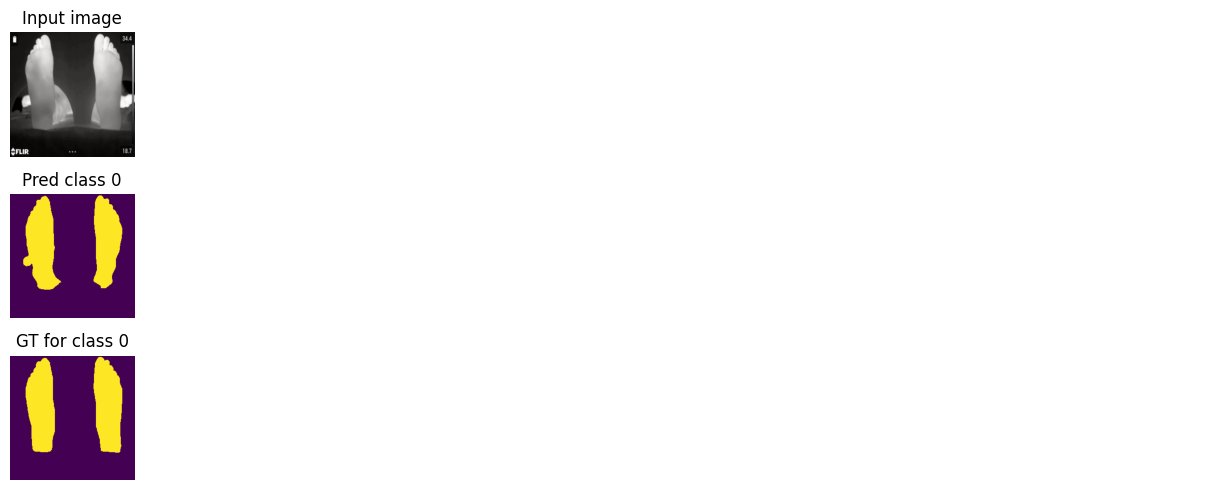

Train loss: 0.18762 | Time: 2m 21s | Val loss: 0.15983
Train_DICE_avg: 0.81503 | Train_Jaccard_avg: 0.69927 | Train_Sensitivity_avg: 0.89351 | Train_Specificity_avg: 0.92305 
Class 0 - Train_DICE: 0.81503 | Train_Jaccard: 0.69927 | Train_Sensitivity: 0.89351 | Train_Specificity: 0.92305 
Val_DICE_avg: 0.85725 | Val_Jaccard_avg: 0.75939 | Val_Sensitivity_avg: 0.90901 | Val_Specificity_avg: 0.93661 
Class 0 - Val_DICE: 0.85725 | Val_Jaccard: 0.75939 | Val_Sensitivity: 0.90901 | Val_Specificity: 0.93661 

Epoch 37/61


Validation Epoch 37/61: 100%|██████████| 2/2 [00:00<00:00,  3.17it/s]


Train loss: 0.18167 | Time: 2m 25s | Val loss: 0.15496
Train_DICE_avg: 0.82715 | Train_Jaccard_avg: 0.71375 | Train_Sensitivity_avg: 0.89251 | Train_Specificity_avg: 0.92855 
Class 0 - Train_DICE: 0.82715 | Train_Jaccard: 0.71375 | Train_Sensitivity: 0.89251 | Train_Specificity: 0.92855 
Val_DICE_avg: 0.85735 | Val_Jaccard_avg: 0.75944 | Val_Sensitivity_avg: 0.91789 | Val_Specificity_avg: 0.93500 
Class 0 - Val_DICE: 0.85735 | Val_Jaccard: 0.75944 | Val_Sensitivity: 0.91789 | Val_Specificity: 0.93500 

Epoch 38/61


Validation Epoch 38/61: 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]


Train loss: 0.17560 | Time: 2m 29s | Val loss: 0.15194
Train_DICE_avg: 0.83311 | Train_Jaccard_avg: 0.72363 | Train_Sensitivity_avg: 0.90273 | Train_Specificity_avg: 0.92960 
Class 0 - Train_DICE: 0.83311 | Train_Jaccard: 0.72363 | Train_Sensitivity: 0.90273 | Train_Specificity: 0.92960 
Val_DICE_avg: 0.86548 | Val_Jaccard_avg: 0.77148 | Val_Sensitivity_avg: 0.90960 | Val_Specificity_avg: 0.94208 
Class 0 - Val_DICE: 0.86548 | Val_Jaccard: 0.77148 | Val_Sensitivity: 0.90960 | Val_Specificity: 0.94208 

Epoch 39/61


Validation Epoch 39/61: 100%|██████████| 2/2 [00:00<00:00,  3.19it/s]


Train loss: 0.17565 | Time: 2m 33s | Val loss: 0.14681
Train_DICE_avg: 0.82894 | Train_Jaccard_avg: 0.71865 | Train_Sensitivity_avg: 0.90526 | Train_Specificity_avg: 0.92847 
Class 0 - Train_DICE: 0.82894 | Train_Jaccard: 0.71865 | Train_Sensitivity: 0.90526 | Train_Specificity: 0.92847 
Val_DICE_avg: 0.87282 | Val_Jaccard_avg: 0.78203 | Val_Sensitivity_avg: 0.91471 | Val_Specificity_avg: 0.94441 
Class 0 - Val_DICE: 0.87282 | Val_Jaccard: 0.78203 | Val_Sensitivity: 0.91471 | Val_Specificity: 0.94441 

Epoch 40/61


Validation Epoch 40/61: 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]


Train loss: 0.17339 | Time: 2m 37s | Val loss: 0.14387
Train_DICE_avg: 0.82987 | Train_Jaccard_avg: 0.72128 | Train_Sensitivity_avg: 0.89923 | Train_Specificity_avg: 0.92972 
Class 0 - Train_DICE: 0.82987 | Train_Jaccard: 0.72128 | Train_Sensitivity: 0.89923 | Train_Specificity: 0.92972 
Val_DICE_avg: 0.87657 | Val_Jaccard_avg: 0.78754 | Val_Sensitivity_avg: 0.91203 | Val_Specificity_avg: 0.94668 
Class 0 - Val_DICE: 0.87657 | Val_Jaccard: 0.78754 | Val_Sensitivity: 0.91203 | Val_Specificity: 0.94668 

Epoch 41/61


Validation Epoch 41/61: 100%|██████████| 2/2 [00:00<00:00,  3.18it/s]


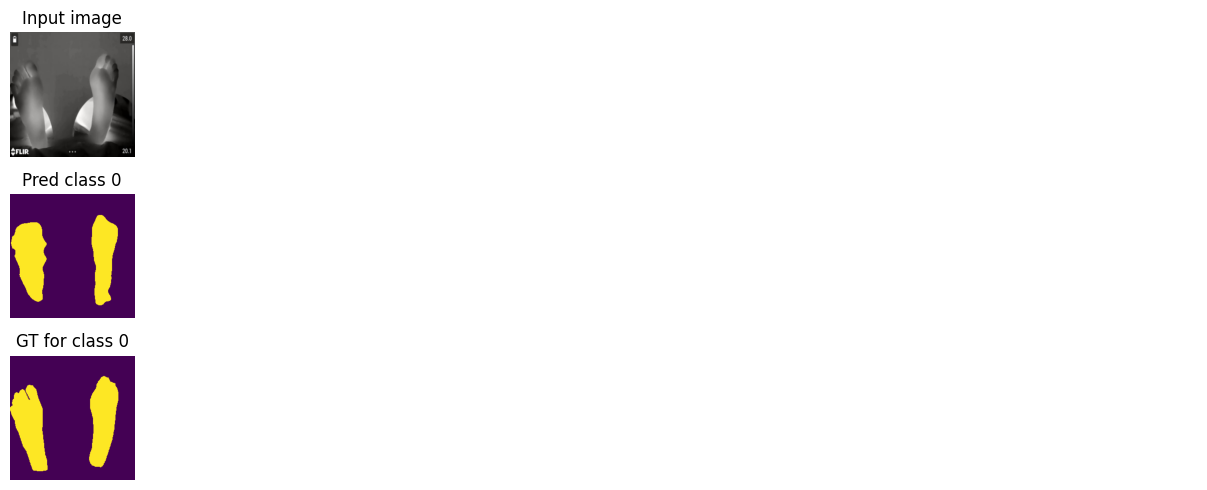

Train loss: 0.17084 | Time: 2m 41s | Val loss: 0.14245
Train_DICE_avg: 0.83716 | Train_Jaccard_avg: 0.72894 | Train_Sensitivity_avg: 0.90450 | Train_Specificity_avg: 0.93156 
Class 0 - Train_DICE: 0.83716 | Train_Jaccard: 0.72894 | Train_Sensitivity: 0.90450 | Train_Specificity: 0.93156 
Val_DICE_avg: 0.86731 | Val_Jaccard_avg: 0.77294 | Val_Sensitivity_avg: 0.93033 | Val_Specificity_avg: 0.93642 
Class 0 - Val_DICE: 0.86731 | Val_Jaccard: 0.77294 | Val_Sensitivity: 0.93033 | Val_Specificity: 0.93642 

Epoch 42/61


Validation Epoch 42/61: 100%|██████████| 2/2 [00:00<00:00,  3.22it/s]


Train loss: 0.16707 | Time: 2m 45s | Val loss: 0.13955
Train_DICE_avg: 0.83972 | Train_Jaccard_avg: 0.73279 | Train_Sensitivity_avg: 0.90694 | Train_Specificity_avg: 0.93226 
Class 0 - Train_DICE: 0.83972 | Train_Jaccard: 0.73279 | Train_Sensitivity: 0.90694 | Train_Specificity: 0.93226 
Val_DICE_avg: 0.87064 | Val_Jaccard_avg: 0.77852 | Val_Sensitivity_avg: 0.93241 | Val_Specificity_avg: 0.93963 
Class 0 - Val_DICE: 0.87064 | Val_Jaccard: 0.77852 | Val_Sensitivity: 0.93241 | Val_Specificity: 0.93963 

Epoch 43/61


Validation Epoch 43/61: 100%|██████████| 2/2 [00:00<00:00,  3.17it/s]


Train loss: 0.16265 | Time: 2m 49s | Val loss: 0.14072
Train_DICE_avg: 0.84234 | Train_Jaccard_avg: 0.73638 | Train_Sensitivity_avg: 0.90991 | Train_Specificity_avg: 0.93331 
Class 0 - Train_DICE: 0.84234 | Train_Jaccard: 0.73638 | Train_Sensitivity: 0.90991 | Train_Specificity: 0.93331 
Val_DICE_avg: 0.87521 | Val_Jaccard_avg: 0.78460 | Val_Sensitivity_avg: 0.92257 | Val_Specificity_avg: 0.94272 
Class 0 - Val_DICE: 0.87521 | Val_Jaccard: 0.78460 | Val_Sensitivity: 0.92257 | Val_Specificity: 0.94272 

Epoch 44/61


Validation Epoch 44/61: 100%|██████████| 2/2 [00:00<00:00,  3.18it/s]


Train loss: 0.16314 | Time: 2m 53s | Val loss: 0.13726
Train_DICE_avg: 0.84070 | Train_Jaccard_avg: 0.73490 | Train_Sensitivity_avg: 0.90786 | Train_Specificity_avg: 0.93309 
Class 0 - Train_DICE: 0.84070 | Train_Jaccard: 0.73490 | Train_Sensitivity: 0.90786 | Train_Specificity: 0.93309 
Val_DICE_avg: 0.88033 | Val_Jaccard_avg: 0.79302 | Val_Sensitivity_avg: 0.92323 | Val_Specificity_avg: 0.94637 
Class 0 - Val_DICE: 0.88033 | Val_Jaccard: 0.79302 | Val_Sensitivity: 0.92323 | Val_Specificity: 0.94637 

Epoch 45/61


Validation Epoch 45/61: 100%|██████████| 2/2 [00:00<00:00,  3.21it/s]


Train loss: 0.16037 | Time: 2m 57s | Val loss: 0.13627
Train_DICE_avg: 0.84799 | Train_Jaccard_avg: 0.74455 | Train_Sensitivity_avg: 0.91002 | Train_Specificity_avg: 0.93455 
Class 0 - Train_DICE: 0.84799 | Train_Jaccard: 0.74455 | Train_Sensitivity: 0.91002 | Train_Specificity: 0.93455 
Val_DICE_avg: 0.88028 | Val_Jaccard_avg: 0.79204 | Val_Sensitivity_avg: 0.92452 | Val_Specificity_avg: 0.94392 
Class 0 - Val_DICE: 0.88028 | Val_Jaccard: 0.79204 | Val_Sensitivity: 0.92452 | Val_Specificity: 0.94392 

Epoch 46/61


Validation Epoch 46/61: 100%|██████████| 2/2 [00:00<00:00,  2.88it/s]


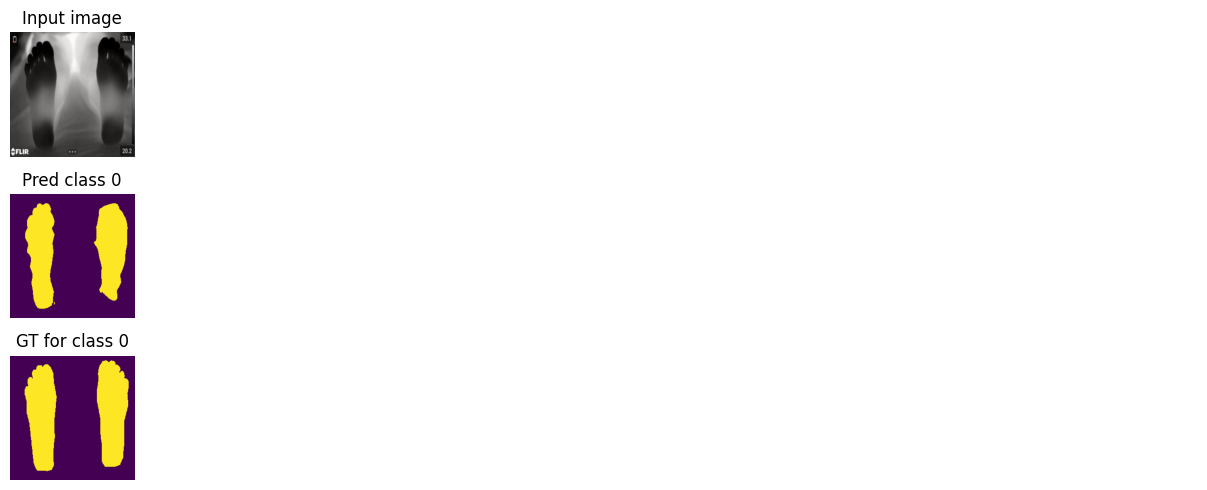

Train loss: 0.15685 | Time: 3m 1s | Val loss: 0.13143
Train_DICE_avg: 0.84966 | Train_Jaccard_avg: 0.74646 | Train_Sensitivity_avg: 0.91370 | Train_Specificity_avg: 0.93615 
Class 0 - Train_DICE: 0.84966 | Train_Jaccard: 0.74646 | Train_Sensitivity: 0.91370 | Train_Specificity: 0.93615 
Val_DICE_avg: 0.88118 | Val_Jaccard_avg: 0.79350 | Val_Sensitivity_avg: 0.93789 | Val_Specificity_avg: 0.94164 
Class 0 - Val_DICE: 0.88118 | Val_Jaccard: 0.79350 | Val_Sensitivity: 0.93789 | Val_Specificity: 0.94164 

Epoch 47/61


Validation Epoch 47/61: 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]


Train loss: 0.15048 | Time: 3m 5s | Val loss: 0.13019
Train_DICE_avg: 0.85833 | Train_Jaccard_avg: 0.75830 | Train_Sensitivity_avg: 0.91795 | Train_Specificity_avg: 0.93852 
Class 0 - Train_DICE: 0.85833 | Train_Jaccard: 0.75830 | Train_Sensitivity: 0.91795 | Train_Specificity: 0.93852 
Val_DICE_avg: 0.88541 | Val_Jaccard_avg: 0.80013 | Val_Sensitivity_avg: 0.93172 | Val_Specificity_avg: 0.94541 
Class 0 - Val_DICE: 0.88541 | Val_Jaccard: 0.80013 | Val_Sensitivity: 0.93172 | Val_Specificity: 0.94541 

Epoch 48/61


Validation Epoch 48/61: 100%|██████████| 2/2 [00:00<00:00,  3.21it/s]


Train loss: 0.15129 | Time: 3m 9s | Val loss: 0.13061
Train_DICE_avg: 0.85810 | Train_Jaccard_avg: 0.75837 | Train_Sensitivity_avg: 0.91933 | Train_Specificity_avg: 0.93795 
Class 0 - Train_DICE: 0.85810 | Train_Jaccard: 0.75837 | Train_Sensitivity: 0.91933 | Train_Specificity: 0.93795 
Val_DICE_avg: 0.88413 | Val_Jaccard_avg: 0.79853 | Val_Sensitivity_avg: 0.92963 | Val_Specificity_avg: 0.94601 
Class 0 - Val_DICE: 0.88413 | Val_Jaccard: 0.79853 | Val_Sensitivity: 0.92963 | Val_Specificity: 0.94601 

Epoch 49/61


Validation Epoch 49/61: 100%|██████████| 2/2 [00:00<00:00,  3.18it/s]


Train loss: 0.14960 | Time: 3m 13s | Val loss: 0.12807
Train_DICE_avg: 0.85822 | Train_Jaccard_avg: 0.75984 | Train_Sensitivity_avg: 0.91937 | Train_Specificity_avg: 0.93892 
Class 0 - Train_DICE: 0.85822 | Train_Jaccard: 0.75984 | Train_Sensitivity: 0.91937 | Train_Specificity: 0.93892 
Val_DICE_avg: 0.88945 | Val_Jaccard_avg: 0.80645 | Val_Sensitivity_avg: 0.92943 | Val_Specificity_avg: 0.94915 
Class 0 - Val_DICE: 0.88945 | Val_Jaccard: 0.80645 | Val_Sensitivity: 0.92943 | Val_Specificity: 0.94915 

Epoch 50/61


Validation Epoch 50/61: 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]


Train loss: 0.14319 | Time: 3m 17s | Val loss: 0.12830
Train_DICE_avg: 0.86588 | Train_Jaccard_avg: 0.76993 | Train_Sensitivity_avg: 0.92474 | Train_Specificity_avg: 0.94141 
Class 0 - Train_DICE: 0.86588 | Train_Jaccard: 0.76993 | Train_Sensitivity: 0.92474 | Train_Specificity: 0.94141 
Val_DICE_avg: 0.88953 | Val_Jaccard_avg: 0.80615 | Val_Sensitivity_avg: 0.92706 | Val_Specificity_avg: 0.94869 
Class 0 - Val_DICE: 0.88953 | Val_Jaccard: 0.80615 | Val_Sensitivity: 0.92706 | Val_Specificity: 0.94869 

Epoch 51/61


Validation Epoch 51/61: 100%|██████████| 2/2 [00:00<00:00,  3.19it/s]


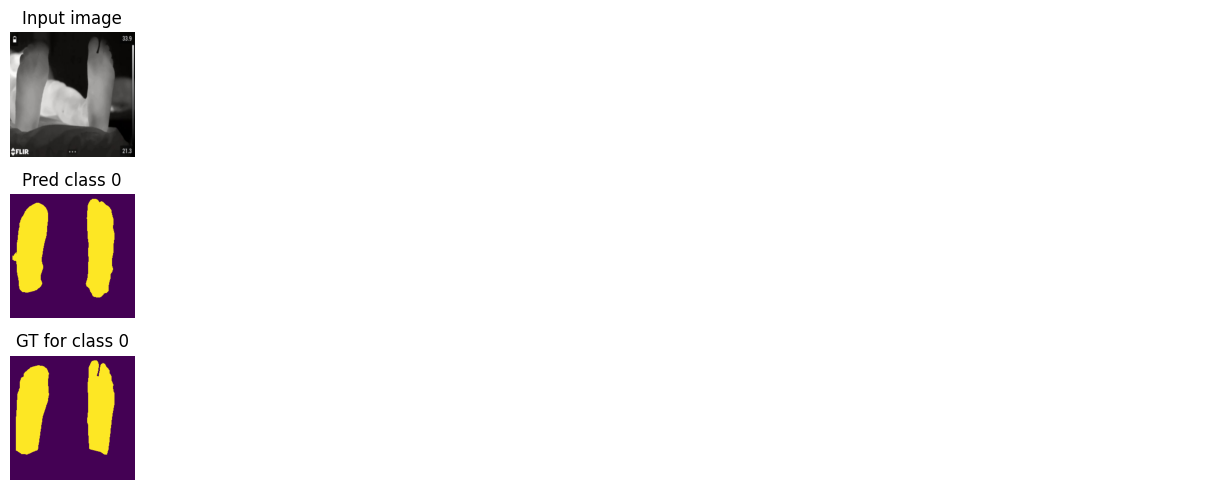

Train loss: 0.14711 | Time: 3m 21s | Val loss: 0.12803
Train_DICE_avg: 0.85912 | Train_Jaccard_avg: 0.76036 | Train_Sensitivity_avg: 0.92112 | Train_Specificity_avg: 0.93999 
Class 0 - Train_DICE: 0.85912 | Train_Jaccard: 0.76036 | Train_Sensitivity: 0.92112 | Train_Specificity: 0.93999 
Val_DICE_avg: 0.88900 | Val_Jaccard_avg: 0.80531 | Val_Sensitivity_avg: 0.92677 | Val_Specificity_avg: 0.94822 
Class 0 - Val_DICE: 0.88900 | Val_Jaccard: 0.80531 | Val_Sensitivity: 0.92677 | Val_Specificity: 0.94822 

Epoch 52/61


Validation Epoch 52/61: 100%|██████████| 2/2 [00:00<00:00,  3.22it/s]


Train loss: 0.14463 | Time: 3m 25s | Val loss: 0.12529
Train_DICE_avg: 0.86731 | Train_Jaccard_avg: 0.77113 | Train_Sensitivity_avg: 0.92145 | Train_Specificity_avg: 0.94117 
Class 0 - Train_DICE: 0.86731 | Train_Jaccard: 0.77113 | Train_Sensitivity: 0.92145 | Train_Specificity: 0.94117 
Val_DICE_avg: 0.89004 | Val_Jaccard_avg: 0.80716 | Val_Sensitivity_avg: 0.93359 | Val_Specificity_avg: 0.94774 
Class 0 - Val_DICE: 0.89004 | Val_Jaccard: 0.80716 | Val_Sensitivity: 0.93359 | Val_Specificity: 0.94774 

Epoch 53/61


Validation Epoch 53/61: 100%|██████████| 2/2 [00:00<00:00,  3.23it/s]


Train loss: 0.14429 | Time: 3m 29s | Val loss: 0.12452
Train_DICE_avg: 0.86450 | Train_Jaccard_avg: 0.76777 | Train_Sensitivity_avg: 0.91879 | Train_Specificity_avg: 0.94164 
Class 0 - Train_DICE: 0.86450 | Train_Jaccard: 0.76777 | Train_Sensitivity: 0.91879 | Train_Specificity: 0.94164 
Val_DICE_avg: 0.88693 | Val_Jaccard_avg: 0.80283 | Val_Sensitivity_avg: 0.93724 | Val_Specificity_avg: 0.94564 
Class 0 - Val_DICE: 0.88693 | Val_Jaccard: 0.80283 | Val_Sensitivity: 0.93724 | Val_Specificity: 0.94564 

Epoch 54/61


Validation Epoch 54/61: 100%|██████████| 2/2 [00:00<00:00,  3.17it/s]


Train loss: 0.14007 | Time: 3m 33s | Val loss: 0.12437
Train_DICE_avg: 0.86987 | Train_Jaccard_avg: 0.77579 | Train_Sensitivity_avg: 0.92436 | Train_Specificity_avg: 0.94272 
Class 0 - Train_DICE: 0.86987 | Train_Jaccard: 0.77579 | Train_Sensitivity: 0.92436 | Train_Specificity: 0.94272 
Val_DICE_avg: 0.88578 | Val_Jaccard_avg: 0.80114 | Val_Sensitivity_avg: 0.93879 | Val_Specificity_avg: 0.94462 
Class 0 - Val_DICE: 0.88578 | Val_Jaccard: 0.80114 | Val_Sensitivity: 0.93879 | Val_Specificity: 0.94462 

Epoch 55/61


Validation Epoch 55/61: 100%|██████████| 2/2 [00:00<00:00,  3.06it/s]


Train loss: 0.14004 | Time: 3m 37s | Val loss: 0.12268
Train_DICE_avg: 0.86948 | Train_Jaccard_avg: 0.77580 | Train_Sensitivity_avg: 0.92553 | Train_Specificity_avg: 0.94315 
Class 0 - Train_DICE: 0.86948 | Train_Jaccard: 0.77580 | Train_Sensitivity: 0.92553 | Train_Specificity: 0.94315 
Val_DICE_avg: 0.89220 | Val_Jaccard_avg: 0.81077 | Val_Sensitivity_avg: 0.93402 | Val_Specificity_avg: 0.94987 
Class 0 - Val_DICE: 0.89220 | Val_Jaccard: 0.81077 | Val_Sensitivity: 0.93402 | Val_Specificity: 0.94987 

Epoch 56/61


Validation Epoch 56/61: 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]


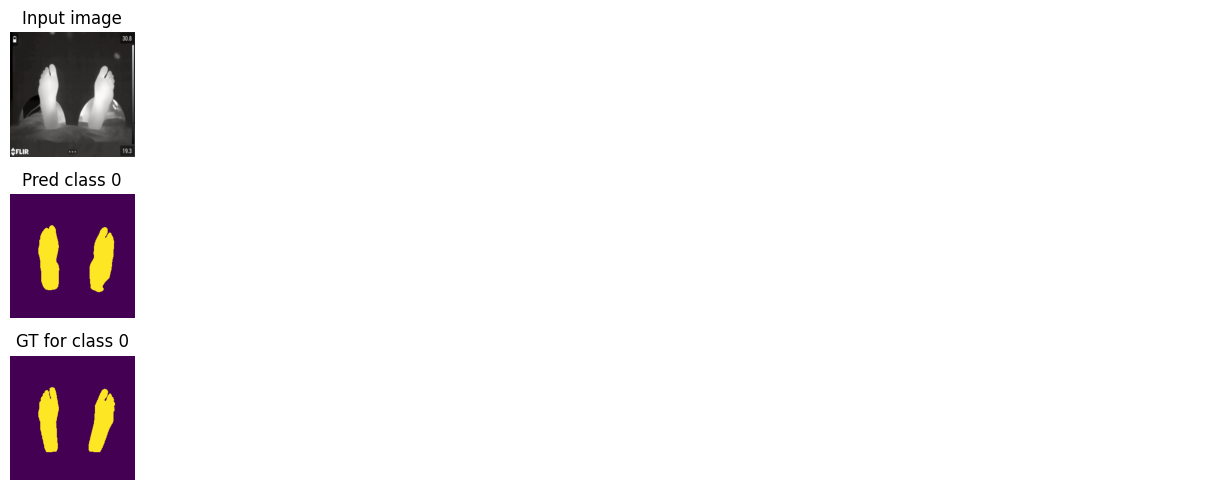

Train loss: 0.13667 | Time: 3m 41s | Val loss: 0.12219
Train_DICE_avg: 0.87058 | Train_Jaccard_avg: 0.77911 | Train_Sensitivity_avg: 0.92627 | Train_Specificity_avg: 0.94385 
Class 0 - Train_DICE: 0.87058 | Train_Jaccard: 0.77911 | Train_Sensitivity: 0.92627 | Train_Specificity: 0.94385 
Val_DICE_avg: 0.89380 | Val_Jaccard_avg: 0.81334 | Val_Sensitivity_avg: 0.93046 | Val_Specificity_avg: 0.95193 
Class 0 - Val_DICE: 0.89380 | Val_Jaccard: 0.81334 | Val_Sensitivity: 0.93046 | Val_Specificity: 0.95193 

Epoch 57/61


Validation Epoch 57/61: 100%|██████████| 2/2 [00:00<00:00,  3.18it/s]


Train loss: 0.13946 | Time: 3m 45s | Val loss: 0.12162
Train_DICE_avg: 0.87194 | Train_Jaccard_avg: 0.77929 | Train_Sensitivity_avg: 0.92486 | Train_Specificity_avg: 0.94317 
Class 0 - Train_DICE: 0.87194 | Train_Jaccard: 0.77929 | Train_Sensitivity: 0.92486 | Train_Specificity: 0.94317 
Val_DICE_avg: 0.89274 | Val_Jaccard_avg: 0.81157 | Val_Sensitivity_avg: 0.93368 | Val_Specificity_avg: 0.95022 
Class 0 - Val_DICE: 0.89274 | Val_Jaccard: 0.81157 | Val_Sensitivity: 0.93368 | Val_Specificity: 0.95022 

Epoch 58/61


Validation Epoch 58/61: 100%|██████████| 2/2 [00:00<00:00,  3.09it/s]


Train loss: 0.13870 | Time: 3m 49s | Val loss: 0.12023
Train_DICE_avg: 0.87027 | Train_Jaccard_avg: 0.77633 | Train_Sensitivity_avg: 0.92588 | Train_Specificity_avg: 0.94313 
Class 0 - Train_DICE: 0.87027 | Train_Jaccard: 0.77633 | Train_Sensitivity: 0.92588 | Train_Specificity: 0.94313 
Val_DICE_avg: 0.89478 | Val_Jaccard_avg: 0.81490 | Val_Sensitivity_avg: 0.93168 | Val_Specificity_avg: 0.95177 
Class 0 - Val_DICE: 0.89478 | Val_Jaccard: 0.81490 | Val_Sensitivity: 0.93168 | Val_Specificity: 0.95177 

Epoch 59/61


Validation Epoch 59/61: 100%|██████████| 2/2 [00:00<00:00,  3.18it/s]


Train loss: 0.13803 | Time: 3m 53s | Val loss: 0.11995
Train_DICE_avg: 0.86984 | Train_Jaccard_avg: 0.77713 | Train_Sensitivity_avg: 0.92511 | Train_Specificity_avg: 0.94318 
Class 0 - Train_DICE: 0.86984 | Train_Jaccard: 0.77713 | Train_Sensitivity: 0.92511 | Train_Specificity: 0.94318 
Val_DICE_avg: 0.89277 | Val_Jaccard_avg: 0.81211 | Val_Sensitivity_avg: 0.93354 | Val_Specificity_avg: 0.95025 
Class 0 - Val_DICE: 0.89277 | Val_Jaccard: 0.81211 | Val_Sensitivity: 0.93354 | Val_Specificity: 0.95025 

Epoch 60/61


Validation Epoch 60/61: 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]


Train loss: 0.13793 | Time: 3m 57s | Val loss: 0.11922
Train_DICE_avg: 0.86980 | Train_Jaccard_avg: 0.77682 | Train_Sensitivity_avg: 0.92517 | Train_Specificity_avg: 0.94396 
Class 0 - Train_DICE: 0.86980 | Train_Jaccard: 0.77682 | Train_Sensitivity: 0.92517 | Train_Specificity: 0.94396 
Val_DICE_avg: 0.89200 | Val_Jaccard_avg: 0.81058 | Val_Sensitivity_avg: 0.93783 | Val_Specificity_avg: 0.94851 
Class 0 - Val_DICE: 0.89200 | Val_Jaccard: 0.81058 | Val_Sensitivity: 0.93783 | Val_Specificity: 0.94851 

Epoch 61/61


Validation Epoch 61/61: 100%|██████████| 2/2 [00:00<00:00,  2.98it/s]


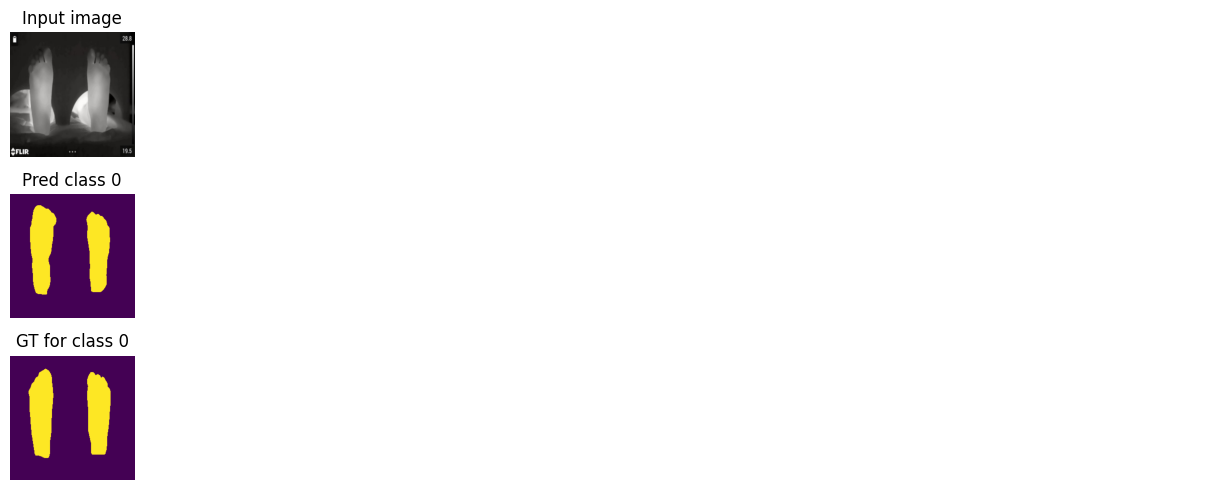

Train loss: 0.13378 | Time: 4m 1s | Val loss: 0.11973
Train_DICE_avg: 0.88052 | Train_Jaccard_avg: 0.79114 | Train_Sensitivity_avg: 0.92986 | Train_Specificity_avg: 0.94526 
Class 0 - Train_DICE: 0.88052 | Train_Jaccard: 0.79114 | Train_Sensitivity: 0.92986 | Train_Specificity: 0.94526 
Val_DICE_avg: 0.89317 | Val_Jaccard_avg: 0.81236 | Val_Sensitivity_avg: 0.93534 | Val_Specificity_avg: 0.94970 
Class 0 - Val_DICE: 0.89317 | Val_Jaccard: 0.81236 | Val_Sensitivity: 0.93534 | Val_Specificity: 0.94970 


Training DICE,▁▂▃▃▄▄▄▄▄▄▄▅▄▅▅▅▅▅▆▆▆▇▇▇▇▇▇▇▇▇██████████
Training Jaccard,▁▂▃▃▃▄▄▄▄▄▄▄▄▄▄▅▅▅▅▆▆▆▆▇▇▇▇▇▇▇██████████
Training Loss,█▇▇▆▆▅▅▄▄▄▄▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁
Training Sensitivity,▁▂▃▃▄▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇████████████████
Training Specificity,▁▃▄▄▄▃▂▂▂▂▂▂▃▂▂▃▃▄▄▄▄▅▅▆▆▇▇▇▇▇█▇████████
Validation DICE,▁▆▇▇▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇███████████████████
Validation Jaccard,▁▂▅▆▆▆▆▇▇▇▇▆▇▇▆▇▇▇▇▇▇▇██████████████████
Validation Loss,██▇▇▇▆▄▄▄▃▃▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Validation Sensitivity,█▇▄▂▁▁▂▃▄▄▅▅▅▅▆▅▆▆▇▆▆▆▆▇▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇
Validation Specificity,▁▄▇▇█▇▇▆▆▆▆▆▆▆▆▆▆▆▅▇▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇
Training DICE,0.88052



Training complete!


In [ ]:
trainer = SegmentationModel_Trainer(train_loader=train_dataset,valid_loader=valid_dataset,config=config)
trainer.start()

In [14]:
model = DeepLabV3Plus(in_channels=config["Input size"][0],out_channels=config["Number of classes"], final_activation=config["Activation function"])
state_dict = torch.load('./models/best_model(2).pt', weights_only=True)
model.load_state_dict(state_dict)

<All keys matched successfully>

In [15]:
PerformanceModels(model=model,test_dataset=test_dataset,config=config)

Testing model's performance: 100%|██████████| 1/1 [00:00<00:00,  2.76it/s]


Global Performance Metrics:
Loss mean: 0.14194, std: 0.00000
Dice Coefficient mean: 0.87291, std: 0.11250
Jaccard Index mean: 0.78823, std: 0.13970
Sensitivity mean: 0.88685, std: 0.09788
Specificity mean: 0.96591, std: 0.02955

Per-Class Performance Metrics:

Class 0:
Dice mean: 0.87291, std: 0.11250
Jaccard mean: 0.78823, std: 0.13970
Sensitivity mean: 0.88685, std: 0.09788
Specificity mean: 0.96591, std: 0.02955


### Focal Loss

In [16]:
config["Activation function"] = None
config["Loss function"] = "Focal"
config["Alpha"] = 0.75
config["Gamma"] = 2.0
config["Wandb monitoring"] = ["5092b6e1a9fb50d7448b32f2db4d0163bb5ef14f","MasterTests","FeetMamitas-DeepLabV3+-Focal"]

Automatic Mixed Precision (AMP) enabled.
DEVICE INFORMATION
Current device: cuda:0
Device type: cuda
CUDA available: Yes
CUDA version: 12.4
Number of CUDA devices: 1
Current CUDA device index: 0
Current CUDA device name: NVIDIA A100-SXM4-40GB
GPU Memory - Allocated: 0.66 GB
GPU Memory - Reserved: 1.95 GB
GPU Memory - Total: 39.56 GB
GPU Compute Capability: 8.0
GPU Multiprocessors: 108
PyTorch version: 2.6.0+cu124


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc



Epoch 1/61
Training phase 1


Validation Epoch 1/61: 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]


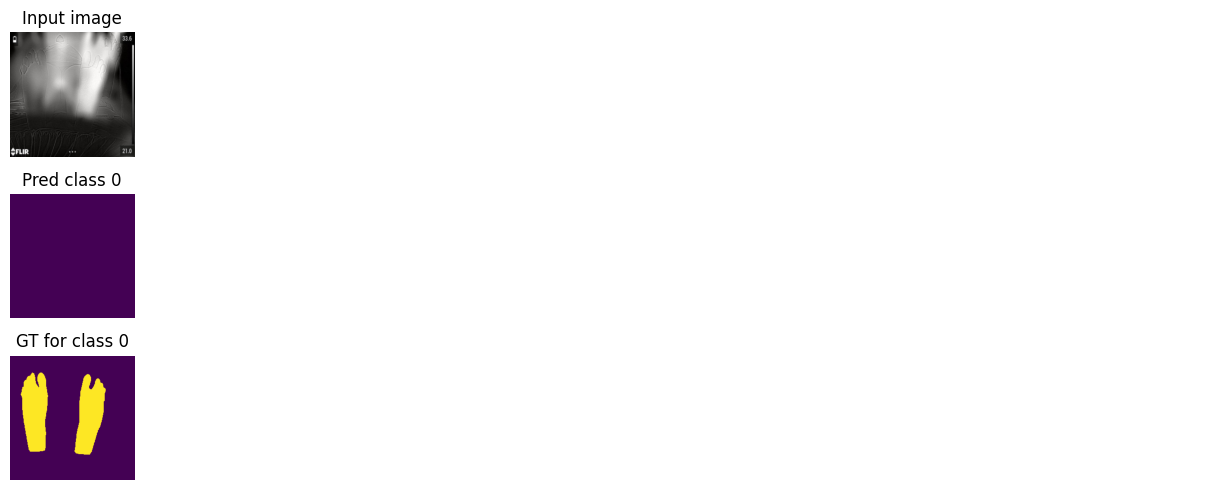

Train loss: 0.06229 | Time: 0m 4s | Val loss: 0.06504
Train_DICE_avg: 0.13120 | Train_Jaccard_avg: 0.07675 | Train_Sensitivity_avg: 0.40444 | Train_Specificity_avg: 0.76742 
Class 0 - Train_DICE: 0.13120 | Train_Jaccard: 0.07675 | Train_Sensitivity: 0.40444 | Train_Specificity: 0.76742 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 2/61


Validation Epoch 2/61: 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]


Train loss: 0.04964 | Time: 0m 7s | Val loss: 0.06313
Train_DICE_avg: 0.40491 | Train_Jaccard_avg: 0.27279 | Train_Sensitivity_avg: 0.65367 | Train_Specificity_avg: 0.81262 
Class 0 - Train_DICE: 0.40491 | Train_Jaccard: 0.27279 | Train_Sensitivity: 0.65367 | Train_Specificity: 0.81262 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 3/61


Validation Epoch 3/61: 100%|██████████| 2/2 [00:00<00:00,  3.21it/s]


Train loss: 0.04529 | Time: 0m 11s | Val loss: 0.05868
Train_DICE_avg: 0.51195 | Train_Jaccard_avg: 0.36660 | Train_Sensitivity_avg: 0.68523 | Train_Specificity_avg: 0.84094 
Class 0 - Train_DICE: 0.51195 | Train_Jaccard: 0.36660 | Train_Sensitivity: 0.68523 | Train_Specificity: 0.84094 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 4/61


Validation Epoch 4/61: 100%|██████████| 2/2 [00:00<00:00,  3.00it/s]


Train loss: 0.04335 | Time: 0m 15s | Val loss: 0.04929
Train_DICE_avg: 0.56804 | Train_Jaccard_avg: 0.42060 | Train_Sensitivity_avg: 0.69724 | Train_Specificity_avg: 0.85784 
Class 0 - Train_DICE: 0.56804 | Train_Jaccard: 0.42060 | Train_Sensitivity: 0.69724 | Train_Specificity: 0.85784 
Val_DICE_avg: 0.07442 | Val_Jaccard_avg: 0.04495 | Val_Sensitivity_avg: 0.94536 | Val_Specificity_avg: 0.75541 
Class 0 - Val_DICE: 0.07442 | Val_Jaccard: 0.04495 | Val_Sensitivity: 0.94536 | Val_Specificity: 0.75541 

Epoch 5/61


Validation Epoch 5/61: 100%|██████████| 2/2 [00:00<00:00,  3.18it/s]


Train loss: 0.04102 | Time: 0m 19s | Val loss: 0.04087
Train_DICE_avg: 0.61090 | Train_Jaccard_avg: 0.45932 | Train_Sensitivity_avg: 0.70140 | Train_Specificity_avg: 0.87063 
Class 0 - Train_DICE: 0.61090 | Train_Jaccard: 0.45932 | Train_Sensitivity: 0.70140 | Train_Specificity: 0.87063 
Val_DICE_avg: 0.50141 | Val_Jaccard_avg: 0.36697 | Val_Sensitivity_avg: 0.83632 | Val_Specificity_avg: 0.83289 
Class 0 - Val_DICE: 0.50141 | Val_Jaccard: 0.36697 | Val_Sensitivity: 0.83632 | Val_Specificity: 0.83289 

Epoch 6/61


Validation Epoch 6/61: 100%|██████████| 2/2 [00:00<00:00,  3.20it/s]


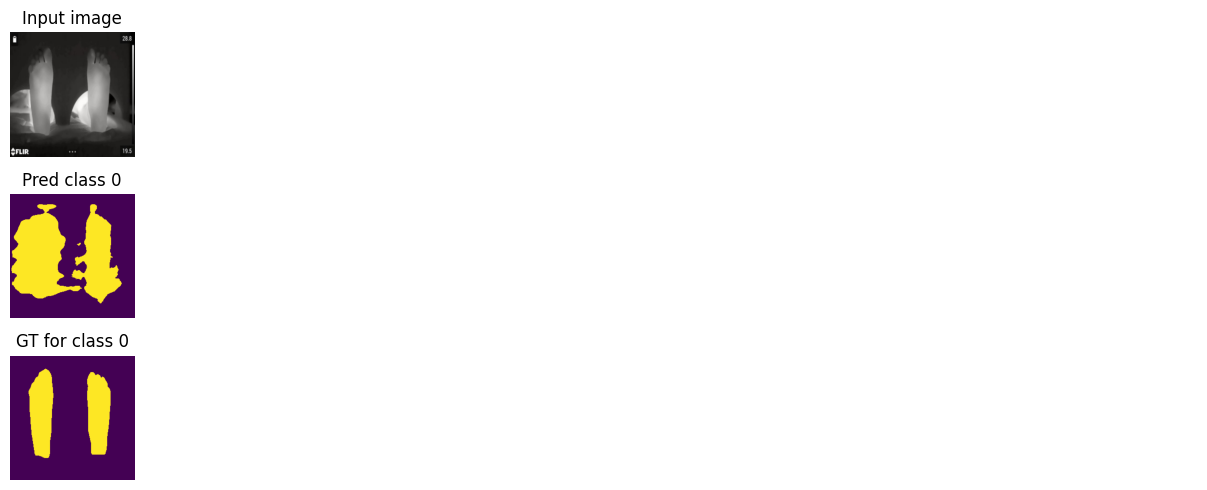

Train loss: 0.03959 | Time: 0m 23s | Val loss: 0.03760
Train_DICE_avg: 0.62254 | Train_Jaccard_avg: 0.47060 | Train_Sensitivity_avg: 0.71550 | Train_Specificity_avg: 0.87311 
Class 0 - Train_DICE: 0.62254 | Train_Jaccard: 0.47060 | Train_Sensitivity: 0.71550 | Train_Specificity: 0.87311 
Val_DICE_avg: 0.69903 | Val_Jaccard_avg: 0.55537 | Val_Sensitivity_avg: 0.78566 | Val_Specificity_avg: 0.89474 
Class 0 - Val_DICE: 0.69903 | Val_Jaccard: 0.55537 | Val_Sensitivity: 0.78566 | Val_Specificity: 0.89474 

Epoch 7/61


Validation Epoch 7/61: 100%|██████████| 2/2 [00:00<00:00,  3.08it/s]


Train loss: 0.03770 | Time: 0m 27s | Val loss: 0.03633
Train_DICE_avg: 0.64053 | Train_Jaccard_avg: 0.49002 | Train_Sensitivity_avg: 0.74001 | Train_Specificity_avg: 0.87586 
Class 0 - Train_DICE: 0.64053 | Train_Jaccard: 0.49002 | Train_Sensitivity: 0.74001 | Train_Specificity: 0.87586 
Val_DICE_avg: 0.75604 | Val_Jaccard_avg: 0.62040 | Val_Sensitivity_avg: 0.74962 | Val_Specificity_avg: 0.92640 
Class 0 - Val_DICE: 0.75604 | Val_Jaccard: 0.62040 | Val_Sensitivity: 0.74962 | Val_Specificity: 0.92640 

Epoch 8/61


Validation Epoch 8/61: 100%|██████████| 2/2 [00:00<00:00,  3.21it/s]


Train loss: 0.03671 | Time: 0m 31s | Val loss: 0.03369
Train_DICE_avg: 0.64854 | Train_Jaccard_avg: 0.49803 | Train_Sensitivity_avg: 0.75516 | Train_Specificity_avg: 0.87807 
Class 0 - Train_DICE: 0.64854 | Train_Jaccard: 0.49803 | Train_Sensitivity: 0.75516 | Train_Specificity: 0.87807 
Val_DICE_avg: 0.76830 | Val_Jaccard_avg: 0.63637 | Val_Sensitivity_avg: 0.76000 | Val_Specificity_avg: 0.92971 
Class 0 - Val_DICE: 0.76830 | Val_Jaccard: 0.63637 | Val_Sensitivity: 0.76000 | Val_Specificity: 0.92971 

Epoch 9/61


Validation Epoch 9/61: 100%|██████████| 2/2 [00:00<00:00,  3.22it/s]


Train loss: 0.03566 | Time: 0m 35s | Val loss: 0.03114
Train_DICE_avg: 0.65837 | Train_Jaccard_avg: 0.50807 | Train_Sensitivity_avg: 0.75298 | Train_Specificity_avg: 0.88093 
Class 0 - Train_DICE: 0.65837 | Train_Jaccard: 0.50807 | Train_Sensitivity: 0.75298 | Train_Specificity: 0.88093 
Val_DICE_avg: 0.77821 | Val_Jaccard_avg: 0.64920 | Val_Sensitivity_avg: 0.78298 | Val_Specificity_avg: 0.92731 
Class 0 - Val_DICE: 0.77821 | Val_Jaccard: 0.64920 | Val_Sensitivity: 0.78298 | Val_Specificity: 0.92731 

Epoch 10/61


Validation Epoch 10/61: 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]


Train loss: 0.03450 | Time: 0m 39s | Val loss: 0.02929
Train_DICE_avg: 0.67492 | Train_Jaccard_avg: 0.52518 | Train_Sensitivity_avg: 0.76433 | Train_Specificity_avg: 0.88423 
Class 0 - Train_DICE: 0.67492 | Train_Jaccard: 0.52518 | Train_Sensitivity: 0.76433 | Train_Specificity: 0.88423 
Val_DICE_avg: 0.78944 | Val_Jaccard_avg: 0.66378 | Val_Sensitivity_avg: 0.79666 | Val_Specificity_avg: 0.92997 
Class 0 - Val_DICE: 0.78944 | Val_Jaccard: 0.66378 | Val_Sensitivity: 0.79666 | Val_Specificity: 0.92997 

Epoch 11/61
Training phase 2


Validation Epoch 11/61: 100%|██████████| 2/2 [00:00<00:00,  3.14it/s]


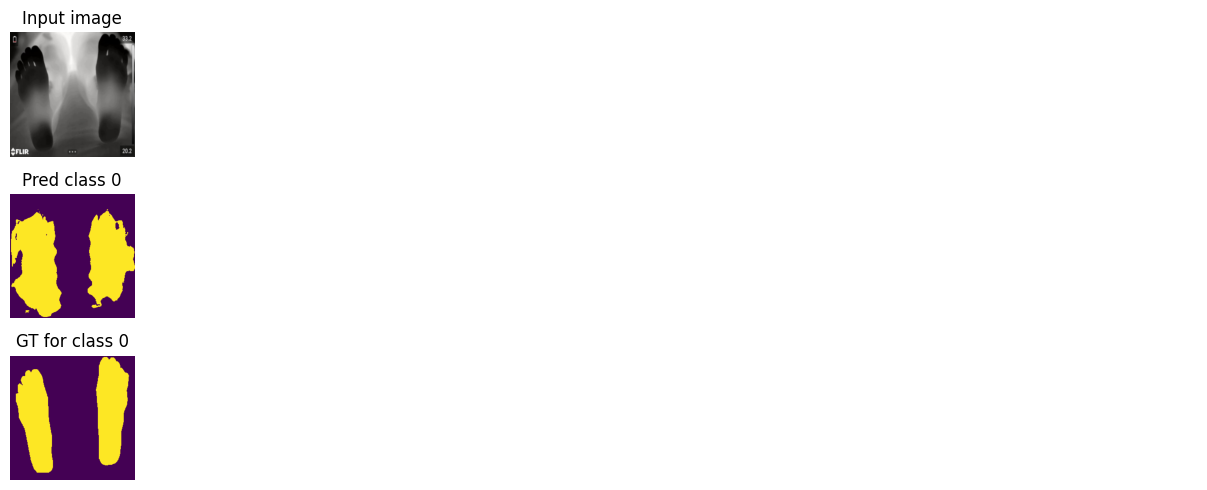

Train loss: 0.03527 | Time: 0m 43s | Val loss: 0.02738
Train_DICE_avg: 0.66160 | Train_Jaccard_avg: 0.51281 | Train_Sensitivity_avg: 0.76404 | Train_Specificity_avg: 0.88048 
Class 0 - Train_DICE: 0.66160 | Train_Jaccard: 0.51281 | Train_Sensitivity: 0.76404 | Train_Specificity: 0.88048 
Val_DICE_avg: 0.75495 | Val_Jaccard_avg: 0.62451 | Val_Sensitivity_avg: 0.84079 | Val_Specificity_avg: 0.90487 
Class 0 - Val_DICE: 0.75495 | Val_Jaccard: 0.62451 | Val_Sensitivity: 0.84079 | Val_Specificity: 0.90487 

Epoch 12/61


Validation Epoch 12/61: 100%|██████████| 2/2 [00:00<00:00,  3.21it/s]


Train loss: 0.03352 | Time: 0m 47s | Val loss: 0.02628
Train_DICE_avg: 0.67976 | Train_Jaccard_avg: 0.53243 | Train_Sensitivity_avg: 0.77698 | Train_Specificity_avg: 0.88523 
Class 0 - Train_DICE: 0.67976 | Train_Jaccard: 0.53243 | Train_Sensitivity: 0.77698 | Train_Specificity: 0.88523 
Val_DICE_avg: 0.79178 | Val_Jaccard_avg: 0.66845 | Val_Sensitivity_avg: 0.82510 | Val_Specificity_avg: 0.92561 
Class 0 - Val_DICE: 0.79178 | Val_Jaccard: 0.66845 | Val_Sensitivity: 0.82510 | Val_Specificity: 0.92561 

Epoch 13/61


Validation Epoch 13/61: 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]


Train loss: 0.03253 | Time: 0m 51s | Val loss: 0.02705
Train_DICE_avg: 0.69336 | Train_Jaccard_avg: 0.54988 | Train_Sensitivity_avg: 0.78166 | Train_Specificity_avg: 0.89068 
Class 0 - Train_DICE: 0.69336 | Train_Jaccard: 0.54988 | Train_Sensitivity: 0.78166 | Train_Specificity: 0.89068 
Val_DICE_avg: 0.80006 | Val_Jaccard_avg: 0.67981 | Val_Sensitivity_avg: 0.78940 | Val_Specificity_avg: 0.93962 
Class 0 - Val_DICE: 0.80006 | Val_Jaccard: 0.67981 | Val_Sensitivity: 0.78940 | Val_Specificity: 0.93962 

Epoch 14/61


Validation Epoch 14/61: 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]


Train loss: 0.03138 | Time: 0m 55s | Val loss: 0.02494
Train_DICE_avg: 0.70726 | Train_Jaccard_avg: 0.56621 | Train_Sensitivity_avg: 0.77647 | Train_Specificity_avg: 0.89743 
Class 0 - Train_DICE: 0.70726 | Train_Jaccard: 0.56621 | Train_Sensitivity: 0.77647 | Train_Specificity: 0.89743 
Val_DICE_avg: 0.80084 | Val_Jaccard_avg: 0.67926 | Val_Sensitivity_avg: 0.83524 | Val_Specificity_avg: 0.92560 
Class 0 - Val_DICE: 0.80084 | Val_Jaccard: 0.67926 | Val_Sensitivity: 0.83524 | Val_Specificity: 0.92560 

Epoch 15/61


Validation Epoch 15/61: 100%|██████████| 2/2 [00:00<00:00,  3.21it/s]


Train loss: 0.03117 | Time: 0m 59s | Val loss: 0.02505
Train_DICE_avg: 0.71310 | Train_Jaccard_avg: 0.57046 | Train_Sensitivity_avg: 0.78952 | Train_Specificity_avg: 0.89695 
Class 0 - Train_DICE: 0.71310 | Train_Jaccard: 0.57046 | Train_Sensitivity: 0.78952 | Train_Specificity: 0.89695 
Val_DICE_avg: 0.80542 | Val_Jaccard_avg: 0.68563 | Val_Sensitivity_avg: 0.82045 | Val_Specificity_avg: 0.93008 
Class 0 - Val_DICE: 0.80542 | Val_Jaccard: 0.68563 | Val_Sensitivity: 0.82045 | Val_Specificity: 0.93008 

Epoch 16/61


Validation Epoch 16/61: 100%|██████████| 2/2 [00:00<00:00,  3.18it/s]


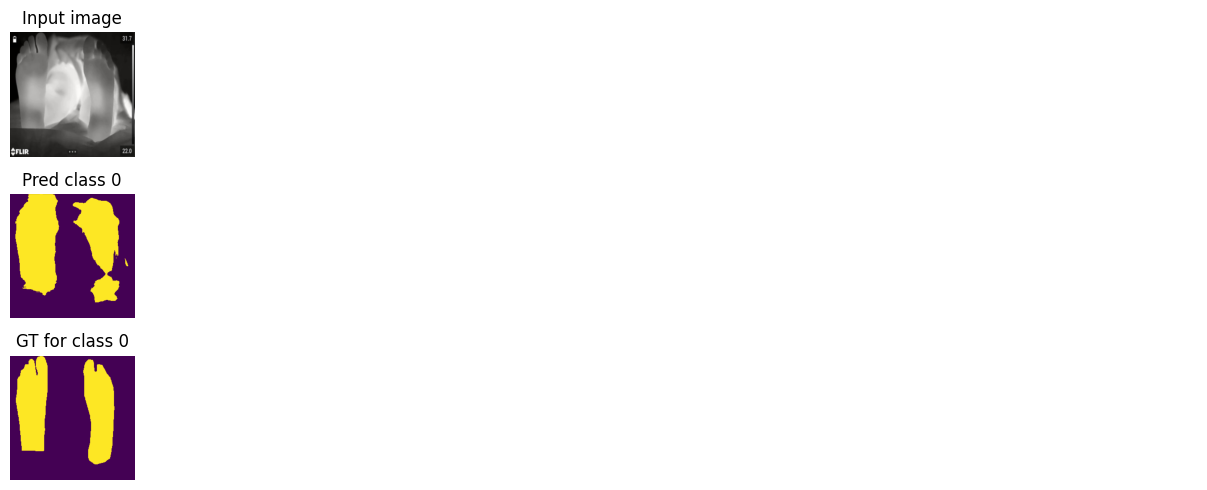

Train loss: 0.03058 | Time: 1m 3s | Val loss: 0.02445
Train_DICE_avg: 0.71634 | Train_Jaccard_avg: 0.57445 | Train_Sensitivity_avg: 0.78524 | Train_Specificity_avg: 0.90033 
Class 0 - Train_DICE: 0.71634 | Train_Jaccard: 0.57445 | Train_Sensitivity: 0.78524 | Train_Specificity: 0.90033 
Val_DICE_avg: 0.80833 | Val_Jaccard_avg: 0.68955 | Val_Sensitivity_avg: 0.82654 | Val_Specificity_avg: 0.93021 
Class 0 - Val_DICE: 0.80833 | Val_Jaccard: 0.68955 | Val_Sensitivity: 0.82654 | Val_Specificity: 0.93021 

Epoch 17/61


Validation Epoch 17/61: 100%|██████████| 2/2 [00:00<00:00,  3.18it/s]


Train loss: 0.03003 | Time: 1m 7s | Val loss: 0.02422
Train_DICE_avg: 0.72550 | Train_Jaccard_avg: 0.58465 | Train_Sensitivity_avg: 0.79096 | Train_Specificity_avg: 0.90165 
Class 0 - Train_DICE: 0.72550 | Train_Jaccard: 0.58465 | Train_Sensitivity: 0.79096 | Train_Specificity: 0.90165 
Val_DICE_avg: 0.81102 | Val_Jaccard_avg: 0.69333 | Val_Sensitivity_avg: 0.82475 | Val_Specificity_avg: 0.93211 
Class 0 - Val_DICE: 0.81102 | Val_Jaccard: 0.69333 | Val_Sensitivity: 0.82475 | Val_Specificity: 0.93211 

Epoch 18/61


Validation Epoch 18/61: 100%|██████████| 2/2 [00:00<00:00,  3.22it/s]


Train loss: 0.02880 | Time: 1m 11s | Val loss: 0.02352
Train_DICE_avg: 0.74020 | Train_Jaccard_avg: 0.60077 | Train_Sensitivity_avg: 0.80481 | Train_Specificity_avg: 0.90433 
Class 0 - Train_DICE: 0.74020 | Train_Jaccard: 0.60077 | Train_Sensitivity: 0.80481 | Train_Specificity: 0.90433 
Val_DICE_avg: 0.81538 | Val_Jaccard_avg: 0.70033 | Val_Sensitivity_avg: 0.83018 | Val_Specificity_avg: 0.93627 
Class 0 - Val_DICE: 0.81538 | Val_Jaccard: 0.70033 | Val_Sensitivity: 0.83018 | Val_Specificity: 0.93627 

Epoch 19/61


Validation Epoch 19/61: 100%|██████████| 2/2 [00:00<00:00,  3.02it/s]


Train loss: 0.02894 | Time: 1m 15s | Val loss: 0.02336
Train_DICE_avg: 0.73391 | Train_Jaccard_avg: 0.59622 | Train_Sensitivity_avg: 0.80348 | Train_Specificity_avg: 0.90493 
Class 0 - Train_DICE: 0.73391 | Train_Jaccard: 0.59622 | Train_Sensitivity: 0.80348 | Train_Specificity: 0.90493 
Val_DICE_avg: 0.81820 | Val_Jaccard_avg: 0.70418 | Val_Sensitivity_avg: 0.82888 | Val_Specificity_avg: 0.93828 
Class 0 - Val_DICE: 0.81820 | Val_Jaccard: 0.70418 | Val_Sensitivity: 0.82888 | Val_Specificity: 0.93828 

Epoch 20/61


Validation Epoch 20/61: 100%|██████████| 2/2 [00:00<00:00,  3.17it/s]


Train loss: 0.02838 | Time: 1m 19s | Val loss: 0.02270
Train_DICE_avg: 0.73971 | Train_Jaccard_avg: 0.60219 | Train_Sensitivity_avg: 0.80704 | Train_Specificity_avg: 0.90761 
Class 0 - Train_DICE: 0.73971 | Train_Jaccard: 0.60219 | Train_Sensitivity: 0.80704 | Train_Specificity: 0.90761 
Val_DICE_avg: 0.81571 | Val_Jaccard_avg: 0.70112 | Val_Sensitivity_avg: 0.84562 | Val_Specificity_avg: 0.93258 
Class 0 - Val_DICE: 0.81571 | Val_Jaccard: 0.70112 | Val_Sensitivity: 0.84562 | Val_Specificity: 0.93258 

Epoch 21/61
Training phase 3


Validation Epoch 21/61: 100%|██████████| 2/2 [00:00<00:00,  3.19it/s]


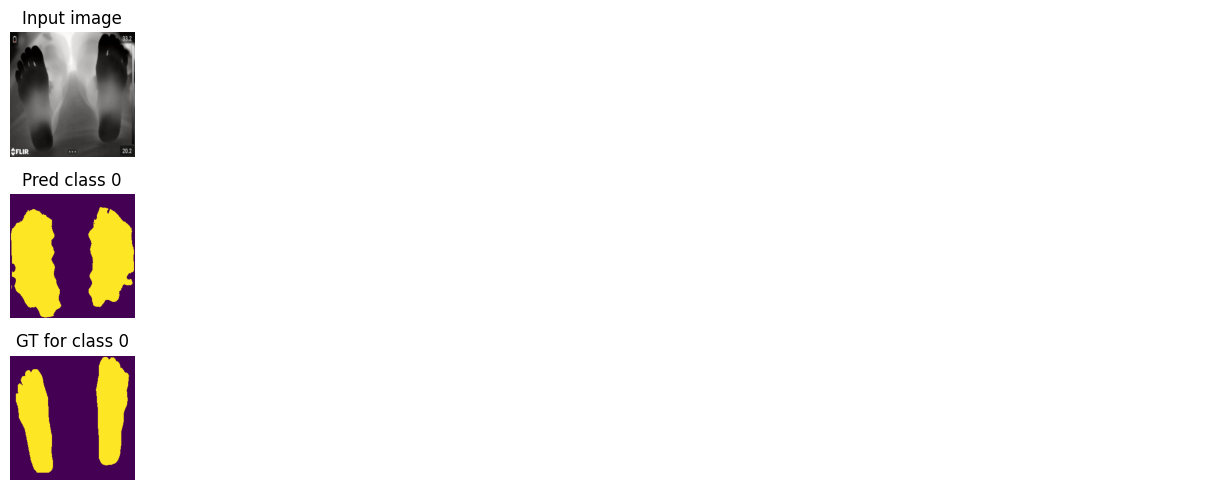

Train loss: 0.02912 | Time: 1m 23s | Val loss: 0.02312
Train_DICE_avg: 0.72532 | Train_Jaccard_avg: 0.58641 | Train_Sensitivity_avg: 0.80339 | Train_Specificity_avg: 0.90089 
Class 0 - Train_DICE: 0.72532 | Train_Jaccard: 0.58641 | Train_Sensitivity: 0.80339 | Train_Specificity: 0.90089 
Val_DICE_avg: 0.81888 | Val_Jaccard_avg: 0.70324 | Val_Sensitivity_avg: 0.83193 | Val_Specificity_avg: 0.93562 
Class 0 - Val_DICE: 0.81888 | Val_Jaccard: 0.70324 | Val_Sensitivity: 0.83193 | Val_Specificity: 0.93562 

Epoch 22/61


Validation Epoch 22/61: 100%|██████████| 2/2 [00:00<00:00,  3.00it/s]


Train loss: 0.02715 | Time: 1m 27s | Val loss: 0.02264
Train_DICE_avg: 0.74924 | Train_Jaccard_avg: 0.61469 | Train_Sensitivity_avg: 0.81441 | Train_Specificity_avg: 0.91016 
Class 0 - Train_DICE: 0.74924 | Train_Jaccard: 0.61469 | Train_Sensitivity: 0.81441 | Train_Specificity: 0.91016 
Val_DICE_avg: 0.80978 | Val_Jaccard_avg: 0.69160 | Val_Sensitivity_avg: 0.87796 | Val_Specificity_avg: 0.91993 
Class 0 - Val_DICE: 0.80978 | Val_Jaccard: 0.69160 | Val_Sensitivity: 0.87796 | Val_Specificity: 0.91993 

Epoch 23/61


Validation Epoch 23/61: 100%|██████████| 2/2 [00:00<00:00,  3.19it/s]


Train loss: 0.02639 | Time: 1m 31s | Val loss: 0.02409
Train_DICE_avg: 0.76422 | Train_Jaccard_avg: 0.63356 | Train_Sensitivity_avg: 0.81428 | Train_Specificity_avg: 0.91568 
Class 0 - Train_DICE: 0.76422 | Train_Jaccard: 0.63356 | Train_Sensitivity: 0.81428 | Train_Specificity: 0.91568 
Val_DICE_avg: 0.83083 | Val_Jaccard_avg: 0.71991 | Val_Sensitivity_avg: 0.79333 | Val_Specificity_avg: 0.95680 
Class 0 - Val_DICE: 0.83083 | Val_Jaccard: 0.71991 | Val_Sensitivity: 0.79333 | Val_Specificity: 0.95680 

Epoch 24/61


Validation Epoch 24/61: 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]


Train loss: 0.02580 | Time: 1m 35s | Val loss: 0.02155
Train_DICE_avg: 0.77244 | Train_Jaccard_avg: 0.64281 | Train_Sensitivity_avg: 0.82090 | Train_Specificity_avg: 0.91880 
Class 0 - Train_DICE: 0.77244 | Train_Jaccard: 0.64281 | Train_Sensitivity: 0.82090 | Train_Specificity: 0.91880 
Val_DICE_avg: 0.82494 | Val_Jaccard_avg: 0.71325 | Val_Sensitivity_avg: 0.86129 | Val_Specificity_avg: 0.93190 
Class 0 - Val_DICE: 0.82494 | Val_Jaccard: 0.71325 | Val_Sensitivity: 0.86129 | Val_Specificity: 0.93190 

Epoch 25/61


Validation Epoch 25/61: 100%|██████████| 2/2 [00:00<00:00,  3.18it/s]


Train loss: 0.02524 | Time: 1m 39s | Val loss: 0.02054
Train_DICE_avg: 0.77669 | Train_Jaccard_avg: 0.64655 | Train_Sensitivity_avg: 0.82359 | Train_Specificity_avg: 0.91842 
Class 0 - Train_DICE: 0.77669 | Train_Jaccard: 0.64655 | Train_Sensitivity: 0.82359 | Train_Specificity: 0.91842 
Val_DICE_avg: 0.83050 | Val_Jaccard_avg: 0.72134 | Val_Sensitivity_avg: 0.86731 | Val_Specificity_avg: 0.93252 
Class 0 - Val_DICE: 0.83050 | Val_Jaccard: 0.72134 | Val_Sensitivity: 0.86731 | Val_Specificity: 0.93252 

Epoch 26/61


Validation Epoch 26/61: 100%|██████████| 2/2 [00:00<00:00,  3.21it/s]


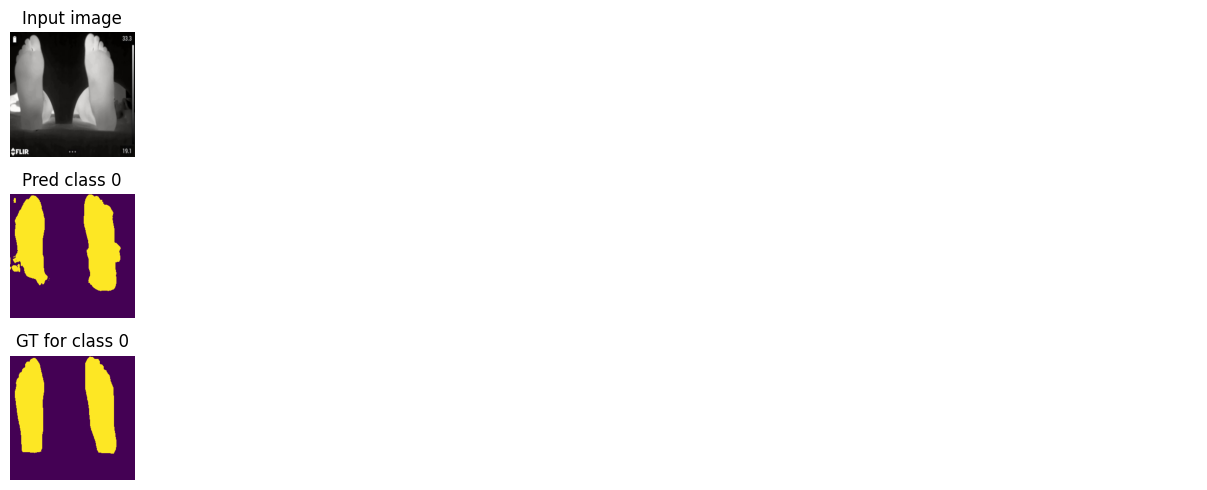

Train loss: 0.02464 | Time: 1m 43s | Val loss: 0.02084
Train_DICE_avg: 0.78139 | Train_Jaccard_avg: 0.65467 | Train_Sensitivity_avg: 0.82354 | Train_Specificity_avg: 0.92080 
Class 0 - Train_DICE: 0.78139 | Train_Jaccard: 0.65467 | Train_Sensitivity: 0.82354 | Train_Specificity: 0.92080 
Val_DICE_avg: 0.84511 | Val_Jaccard_avg: 0.74120 | Val_Sensitivity_avg: 0.83606 | Val_Specificity_avg: 0.95324 
Class 0 - Val_DICE: 0.84511 | Val_Jaccard: 0.74120 | Val_Sensitivity: 0.83606 | Val_Specificity: 0.95324 

Epoch 27/61


Validation Epoch 27/61: 100%|██████████| 2/2 [00:00<00:00,  3.21it/s]


Train loss: 0.02432 | Time: 1m 47s | Val loss: 0.02070
Train_DICE_avg: 0.77782 | Train_Jaccard_avg: 0.65355 | Train_Sensitivity_avg: 0.82499 | Train_Specificity_avg: 0.92294 
Class 0 - Train_DICE: 0.77782 | Train_Jaccard: 0.65355 | Train_Sensitivity: 0.82499 | Train_Specificity: 0.92294 
Val_DICE_avg: 0.84697 | Val_Jaccard_avg: 0.74265 | Val_Sensitivity_avg: 0.83697 | Val_Specificity_avg: 0.95395 
Class 0 - Val_DICE: 0.84697 | Val_Jaccard: 0.74265 | Val_Sensitivity: 0.83697 | Val_Specificity: 0.95395 

Epoch 28/61


Validation Epoch 28/61: 100%|██████████| 2/2 [00:00<00:00,  3.04it/s]


Train loss: 0.02377 | Time: 1m 51s | Val loss: 0.01981
Train_DICE_avg: 0.78665 | Train_Jaccard_avg: 0.66204 | Train_Sensitivity_avg: 0.83511 | Train_Specificity_avg: 0.92355 
Class 0 - Train_DICE: 0.78665 | Train_Jaccard: 0.66204 | Train_Sensitivity: 0.83511 | Train_Specificity: 0.92355 
Val_DICE_avg: 0.83335 | Val_Jaccard_avg: 0.72460 | Val_Sensitivity_avg: 0.88937 | Val_Specificity_avg: 0.93213 
Class 0 - Val_DICE: 0.83335 | Val_Jaccard: 0.72460 | Val_Sensitivity: 0.88937 | Val_Specificity: 0.93213 

Epoch 29/61


Validation Epoch 29/61: 100%|██████████| 2/2 [00:00<00:00,  3.20it/s]


Train loss: 0.02329 | Time: 1m 54s | Val loss: 0.01962
Train_DICE_avg: 0.79689 | Train_Jaccard_avg: 0.67310 | Train_Sensitivity_avg: 0.84153 | Train_Specificity_avg: 0.92490 
Class 0 - Train_DICE: 0.79689 | Train_Jaccard: 0.67310 | Train_Sensitivity: 0.84153 | Train_Specificity: 0.92490 
Val_DICE_avg: 0.83809 | Val_Jaccard_avg: 0.73037 | Val_Sensitivity_avg: 0.88313 | Val_Specificity_avg: 0.93299 
Class 0 - Val_DICE: 0.83809 | Val_Jaccard: 0.73037 | Val_Sensitivity: 0.88313 | Val_Specificity: 0.93299 

Epoch 30/61


Validation Epoch 30/61: 100%|██████████| 2/2 [00:00<00:00,  2.96it/s]


Train loss: 0.02287 | Time: 1m 58s | Val loss: 0.01862
Train_DICE_avg: 0.79985 | Train_Jaccard_avg: 0.68094 | Train_Sensitivity_avg: 0.84295 | Train_Specificity_avg: 0.92812 
Class 0 - Train_DICE: 0.79985 | Train_Jaccard: 0.68094 | Train_Sensitivity: 0.84295 | Train_Specificity: 0.92812 
Val_DICE_avg: 0.85613 | Val_Jaccard_avg: 0.75619 | Val_Sensitivity_avg: 0.86707 | Val_Specificity_avg: 0.94743 
Class 0 - Val_DICE: 0.85613 | Val_Jaccard: 0.75619 | Val_Sensitivity: 0.86707 | Val_Specificity: 0.94743 

Epoch 31/61
Training phase 4


Validation Epoch 31/61: 100%|██████████| 2/2 [00:00<00:00,  3.18it/s]


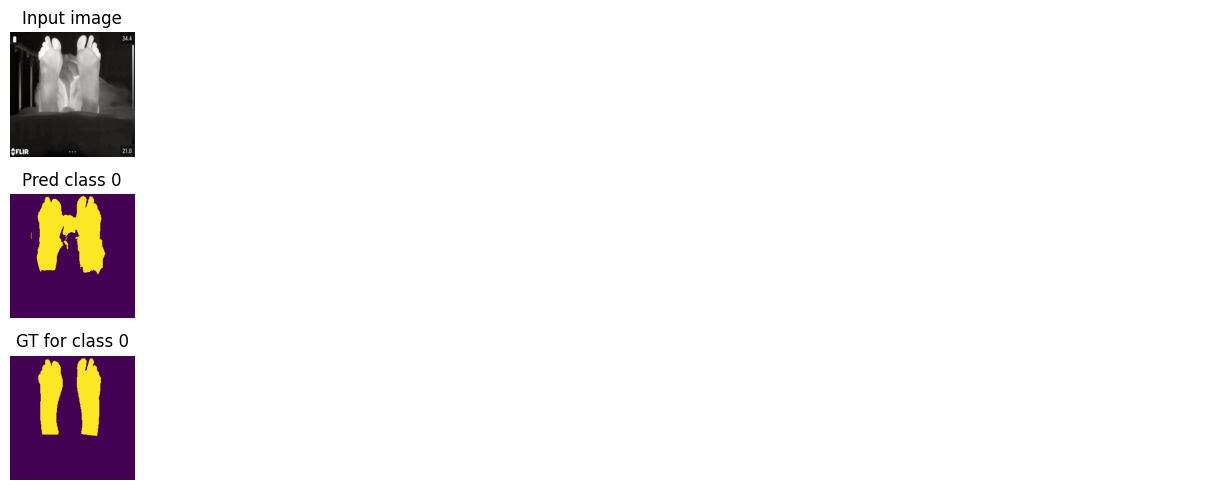

Train loss: 0.02323 | Time: 2m 3s | Val loss: 0.01882
Train_DICE_avg: 0.79400 | Train_Jaccard_avg: 0.67236 | Train_Sensitivity_avg: 0.85127 | Train_Specificity_avg: 0.92242 
Class 0 - Train_DICE: 0.79400 | Train_Jaccard: 0.67236 | Train_Sensitivity: 0.85127 | Train_Specificity: 0.92242 
Val_DICE_avg: 0.84712 | Val_Jaccard_avg: 0.74404 | Val_Sensitivity_avg: 0.88084 | Val_Specificity_avg: 0.94090 
Class 0 - Val_DICE: 0.84712 | Val_Jaccard: 0.74404 | Val_Sensitivity: 0.88084 | Val_Specificity: 0.94090 

Epoch 32/61


Validation Epoch 32/61: 100%|██████████| 2/2 [00:00<00:00,  3.19it/s]


Train loss: 0.02177 | Time: 2m 6s | Val loss: 0.01862
Train_DICE_avg: 0.80964 | Train_Jaccard_avg: 0.69113 | Train_Sensitivity_avg: 0.85048 | Train_Specificity_avg: 0.93006 
Class 0 - Train_DICE: 0.80964 | Train_Jaccard: 0.69113 | Train_Sensitivity: 0.85048 | Train_Specificity: 0.93006 
Val_DICE_avg: 0.84105 | Val_Jaccard_avg: 0.73706 | Val_Sensitivity_avg: 0.90102 | Val_Specificity_avg: 0.93311 
Class 0 - Val_DICE: 0.84105 | Val_Jaccard: 0.73706 | Val_Sensitivity: 0.90102 | Val_Specificity: 0.93311 

Epoch 33/61


Validation Epoch 33/61: 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]


Train loss: 0.02119 | Time: 2m 10s | Val loss: 0.01839
Train_DICE_avg: 0.81955 | Train_Jaccard_avg: 0.70480 | Train_Sensitivity_avg: 0.85029 | Train_Specificity_avg: 0.93593 
Class 0 - Train_DICE: 0.81955 | Train_Jaccard: 0.70480 | Train_Sensitivity: 0.85029 | Train_Specificity: 0.93593 
Val_DICE_avg: 0.86063 | Val_Jaccard_avg: 0.76387 | Val_Sensitivity_avg: 0.85199 | Val_Specificity_avg: 0.95697 
Class 0 - Val_DICE: 0.86063 | Val_Jaccard: 0.76387 | Val_Sensitivity: 0.85199 | Val_Specificity: 0.95697 

Epoch 34/61


Validation Epoch 34/61: 100%|██████████| 2/2 [00:00<00:00,  3.22it/s]


Train loss: 0.02069 | Time: 2m 14s | Val loss: 0.01745
Train_DICE_avg: 0.82407 | Train_Jaccard_avg: 0.71005 | Train_Sensitivity_avg: 0.85577 | Train_Specificity_avg: 0.93613 
Class 0 - Train_DICE: 0.82407 | Train_Jaccard: 0.71005 | Train_Sensitivity: 0.85577 | Train_Specificity: 0.93613 
Val_DICE_avg: 0.85641 | Val_Jaccard_avg: 0.75854 | Val_Sensitivity_avg: 0.89066 | Val_Specificity_avg: 0.94399 
Class 0 - Val_DICE: 0.85641 | Val_Jaccard: 0.75854 | Val_Sensitivity: 0.89066 | Val_Specificity: 0.94399 

Epoch 35/61


Validation Epoch 35/61: 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]


Train loss: 0.01977 | Time: 2m 18s | Val loss: 0.01692
Train_DICE_avg: 0.82468 | Train_Jaccard_avg: 0.71270 | Train_Sensitivity_avg: 0.86649 | Train_Specificity_avg: 0.93622 
Class 0 - Train_DICE: 0.82468 | Train_Jaccard: 0.71270 | Train_Sensitivity: 0.86649 | Train_Specificity: 0.93622 
Val_DICE_avg: 0.86254 | Val_Jaccard_avg: 0.76721 | Val_Sensitivity_avg: 0.88328 | Val_Specificity_avg: 0.94821 
Class 0 - Val_DICE: 0.86254 | Val_Jaccard: 0.76721 | Val_Sensitivity: 0.88328 | Val_Specificity: 0.94821 

Epoch 36/61


Validation Epoch 36/61: 100%|██████████| 2/2 [00:00<00:00,  3.19it/s]


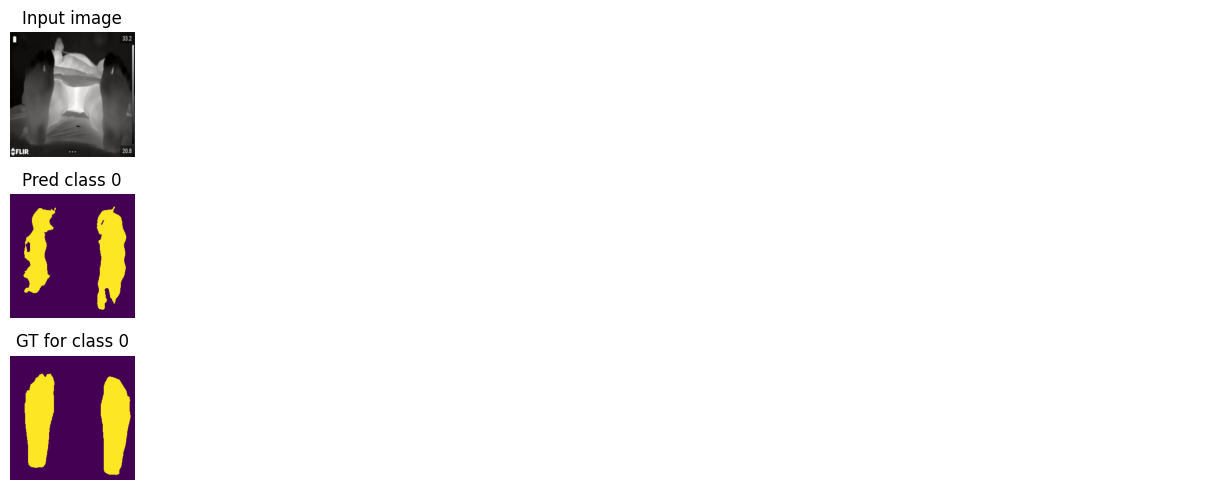

Train loss: 0.01932 | Time: 2m 23s | Val loss: 0.01624
Train_DICE_avg: 0.83313 | Train_Jaccard_avg: 0.72449 | Train_Sensitivity_avg: 0.86191 | Train_Specificity_avg: 0.94109 
Class 0 - Train_DICE: 0.83313 | Train_Jaccard: 0.72449 | Train_Sensitivity: 0.86191 | Train_Specificity: 0.94109 
Val_DICE_avg: 0.87426 | Val_Jaccard_avg: 0.78368 | Val_Sensitivity_avg: 0.87654 | Val_Specificity_avg: 0.95566 
Class 0 - Val_DICE: 0.87426 | Val_Jaccard: 0.78368 | Val_Sensitivity: 0.87654 | Val_Specificity: 0.95566 

Epoch 37/61


Validation Epoch 37/61: 100%|██████████| 2/2 [00:00<00:00,  3.23it/s]


Train loss: 0.01878 | Time: 2m 26s | Val loss: 0.01648
Train_DICE_avg: 0.84055 | Train_Jaccard_avg: 0.73380 | Train_Sensitivity_avg: 0.86954 | Train_Specificity_avg: 0.94176 
Class 0 - Train_DICE: 0.84055 | Train_Jaccard: 0.73380 | Train_Sensitivity: 0.86954 | Train_Specificity: 0.94176 
Val_DICE_avg: 0.87342 | Val_Jaccard_avg: 0.78278 | Val_Sensitivity_avg: 0.86812 | Val_Specificity_avg: 0.95913 
Class 0 - Val_DICE: 0.87342 | Val_Jaccard: 0.78278 | Val_Sensitivity: 0.86812 | Val_Specificity: 0.95913 

Epoch 38/61


Validation Epoch 38/61: 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]


Train loss: 0.01833 | Time: 2m 30s | Val loss: 0.01649
Train_DICE_avg: 0.84631 | Train_Jaccard_avg: 0.74147 | Train_Sensitivity_avg: 0.87567 | Train_Specificity_avg: 0.94257 
Class 0 - Train_DICE: 0.84631 | Train_Jaccard: 0.74147 | Train_Sensitivity: 0.87567 | Train_Specificity: 0.94257 
Val_DICE_avg: 0.87981 | Val_Jaccard_avg: 0.79193 | Val_Sensitivity_avg: 0.85909 | Val_Specificity_avg: 0.96740 
Class 0 - Val_DICE: 0.87981 | Val_Jaccard: 0.79193 | Val_Sensitivity: 0.85909 | Val_Specificity: 0.96740 

Epoch 39/61


Validation Epoch 39/61: 100%|██████████| 2/2 [00:00<00:00,  3.19it/s]


Train loss: 0.01820 | Time: 2m 34s | Val loss: 0.01525
Train_DICE_avg: 0.84348 | Train_Jaccard_avg: 0.73887 | Train_Sensitivity_avg: 0.87562 | Train_Specificity_avg: 0.94323 
Class 0 - Train_DICE: 0.84348 | Train_Jaccard: 0.73887 | Train_Sensitivity: 0.87562 | Train_Specificity: 0.94323 
Val_DICE_avg: 0.88054 | Val_Jaccard_avg: 0.79290 | Val_Sensitivity_avg: 0.89188 | Val_Specificity_avg: 0.95576 
Class 0 - Val_DICE: 0.88054 | Val_Jaccard: 0.79290 | Val_Sensitivity: 0.89188 | Val_Specificity: 0.95576 

Epoch 40/61


Validation Epoch 40/61: 100%|██████████| 2/2 [00:00<00:00,  3.12it/s]


Train loss: 0.01696 | Time: 2m 38s | Val loss: 0.01510
Train_DICE_avg: 0.85648 | Train_Jaccard_avg: 0.75721 | Train_Sensitivity_avg: 0.88390 | Train_Specificity_avg: 0.94806 
Class 0 - Train_DICE: 0.85648 | Train_Jaccard: 0.75721 | Train_Sensitivity: 0.88390 | Train_Specificity: 0.94806 
Val_DICE_avg: 0.87828 | Val_Jaccard_avg: 0.78983 | Val_Sensitivity_avg: 0.90417 | Val_Specificity_avg: 0.95089 
Class 0 - Val_DICE: 0.87828 | Val_Jaccard: 0.78983 | Val_Sensitivity: 0.90417 | Val_Specificity: 0.95089 

Epoch 41/61


Validation Epoch 41/61: 100%|██████████| 2/2 [00:00<00:00,  3.19it/s]


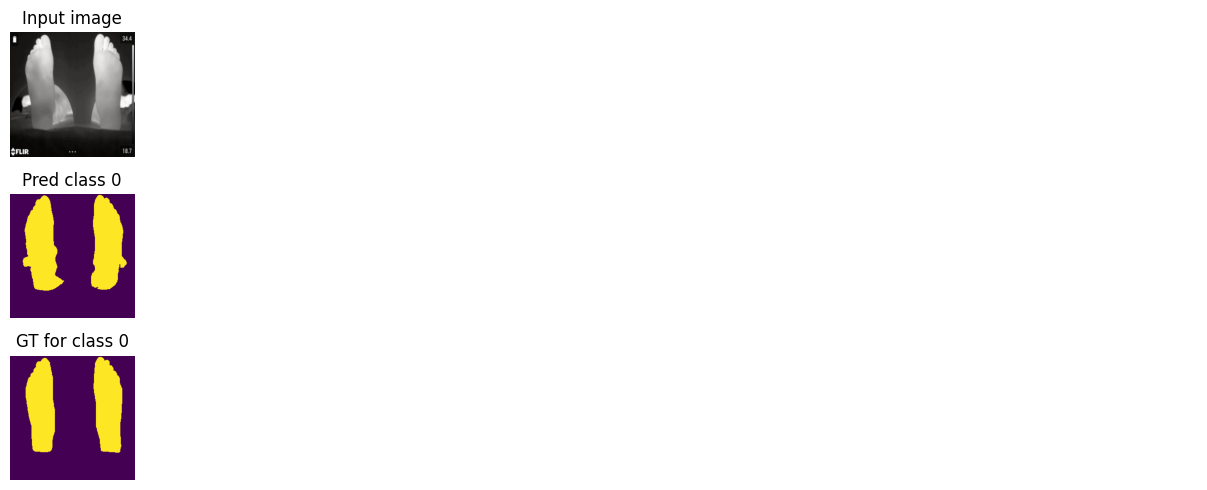

Train loss: 0.01713 | Time: 2m 42s | Val loss: 0.01482
Train_DICE_avg: 0.85347 | Train_Jaccard_avg: 0.75281 | Train_Sensitivity_avg: 0.88358 | Train_Specificity_avg: 0.94734 
Class 0 - Train_DICE: 0.85347 | Train_Jaccard: 0.75281 | Train_Sensitivity: 0.88358 | Train_Specificity: 0.94734 
Val_DICE_avg: 0.88378 | Val_Jaccard_avg: 0.79807 | Val_Sensitivity_avg: 0.89390 | Val_Specificity_avg: 0.95746 
Class 0 - Val_DICE: 0.88378 | Val_Jaccard: 0.79807 | Val_Sensitivity: 0.89390 | Val_Specificity: 0.95746 

Epoch 42/61


Validation Epoch 42/61: 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]


Train loss: 0.01673 | Time: 2m 46s | Val loss: 0.01468
Train_DICE_avg: 0.86128 | Train_Jaccard_avg: 0.76334 | Train_Sensitivity_avg: 0.88305 | Train_Specificity_avg: 0.94921 
Class 0 - Train_DICE: 0.86128 | Train_Jaccard: 0.76334 | Train_Sensitivity: 0.88305 | Train_Specificity: 0.94921 
Val_DICE_avg: 0.88531 | Val_Jaccard_avg: 0.80006 | Val_Sensitivity_avg: 0.89663 | Val_Specificity_avg: 0.95552 
Class 0 - Val_DICE: 0.88531 | Val_Jaccard: 0.80006 | Val_Sensitivity: 0.89663 | Val_Specificity: 0.95552 

Epoch 43/61


Validation Epoch 43/61: 100%|██████████| 2/2 [00:00<00:00,  3.19it/s]


Train loss: 0.01635 | Time: 2m 50s | Val loss: 0.01438
Train_DICE_avg: 0.86600 | Train_Jaccard_avg: 0.77003 | Train_Sensitivity_avg: 0.88586 | Train_Specificity_avg: 0.95029 
Class 0 - Train_DICE: 0.86600 | Train_Jaccard: 0.77003 | Train_Sensitivity: 0.88586 | Train_Specificity: 0.95029 
Val_DICE_avg: 0.89145 | Val_Jaccard_avg: 0.80924 | Val_Sensitivity_avg: 0.88762 | Val_Specificity_avg: 0.96376 
Class 0 - Val_DICE: 0.89145 | Val_Jaccard: 0.80924 | Val_Sensitivity: 0.88762 | Val_Specificity: 0.96376 

Epoch 44/61


Validation Epoch 44/61: 100%|██████████| 2/2 [00:00<00:00,  3.19it/s]


Train loss: 0.01641 | Time: 2m 54s | Val loss: 0.01432
Train_DICE_avg: 0.86222 | Train_Jaccard_avg: 0.76563 | Train_Sensitivity_avg: 0.88691 | Train_Specificity_avg: 0.94914 
Class 0 - Train_DICE: 0.86222 | Train_Jaccard: 0.76563 | Train_Sensitivity: 0.88691 | Train_Specificity: 0.94914 
Val_DICE_avg: 0.89183 | Val_Jaccard_avg: 0.80983 | Val_Sensitivity_avg: 0.88589 | Val_Specificity_avg: 0.96470 
Class 0 - Val_DICE: 0.89183 | Val_Jaccard: 0.80983 | Val_Sensitivity: 0.88589 | Val_Specificity: 0.96470 

Epoch 45/61


Validation Epoch 45/61: 100%|██████████| 2/2 [00:00<00:00,  3.14it/s]


Train loss: 0.01621 | Time: 2m 58s | Val loss: 0.01365
Train_DICE_avg: 0.86162 | Train_Jaccard_avg: 0.76441 | Train_Sensitivity_avg: 0.88934 | Train_Specificity_avg: 0.94872 
Class 0 - Train_DICE: 0.86162 | Train_Jaccard: 0.76441 | Train_Sensitivity: 0.88934 | Train_Specificity: 0.94872 
Val_DICE_avg: 0.89353 | Val_Jaccard_avg: 0.81240 | Val_Sensitivity_avg: 0.90191 | Val_Specificity_avg: 0.96115 
Class 0 - Val_DICE: 0.89353 | Val_Jaccard: 0.81240 | Val_Sensitivity: 0.90191 | Val_Specificity: 0.96115 

Epoch 46/61


Validation Epoch 46/61: 100%|██████████| 2/2 [00:00<00:00,  3.14it/s]


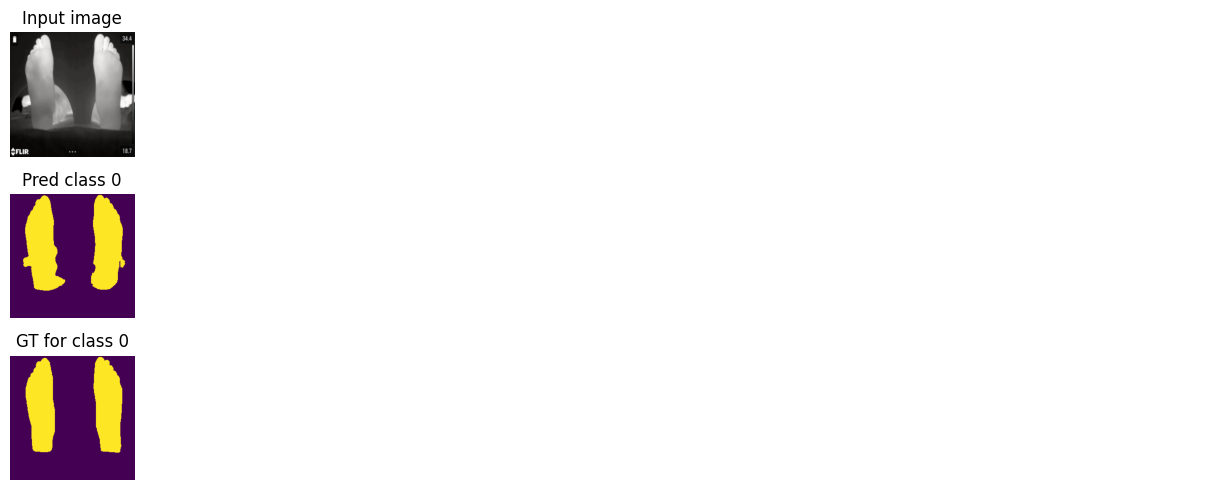

Train loss: 0.01591 | Time: 3m 3s | Val loss: 0.01344
Train_DICE_avg: 0.86540 | Train_Jaccard_avg: 0.76980 | Train_Sensitivity_avg: 0.89209 | Train_Specificity_avg: 0.95038 
Class 0 - Train_DICE: 0.86540 | Train_Jaccard: 0.76980 | Train_Sensitivity: 0.89209 | Train_Specificity: 0.95038 
Val_DICE_avg: 0.89140 | Val_Jaccard_avg: 0.80946 | Val_Sensitivity_avg: 0.91021 | Val_Specificity_avg: 0.95801 
Class 0 - Val_DICE: 0.89140 | Val_Jaccard: 0.80946 | Val_Sensitivity: 0.91021 | Val_Specificity: 0.95801 

Epoch 47/61


Validation Epoch 47/61: 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]


Train loss: 0.01573 | Time: 3m 7s | Val loss: 0.01322
Train_DICE_avg: 0.87019 | Train_Jaccard_avg: 0.77664 | Train_Sensitivity_avg: 0.89441 | Train_Specificity_avg: 0.95137 
Class 0 - Train_DICE: 0.87019 | Train_Jaccard: 0.77664 | Train_Sensitivity: 0.89441 | Train_Specificity: 0.95137 
Val_DICE_avg: 0.89456 | Val_Jaccard_avg: 0.81423 | Val_Sensitivity_avg: 0.90906 | Val_Specificity_avg: 0.96020 
Class 0 - Val_DICE: 0.89456 | Val_Jaccard: 0.81423 | Val_Sensitivity: 0.90906 | Val_Specificity: 0.96020 

Epoch 48/61


Validation Epoch 48/61: 100%|██████████| 2/2 [00:00<00:00,  3.18it/s]


Train loss: 0.01517 | Time: 3m 11s | Val loss: 0.01316
Train_DICE_avg: 0.87227 | Train_Jaccard_avg: 0.77981 | Train_Sensitivity_avg: 0.89624 | Train_Specificity_avg: 0.95265 
Class 0 - Train_DICE: 0.87227 | Train_Jaccard: 0.77981 | Train_Sensitivity: 0.89624 | Train_Specificity: 0.95265 
Val_DICE_avg: 0.89637 | Val_Jaccard_avg: 0.81700 | Val_Sensitivity_avg: 0.90649 | Val_Specificity_avg: 0.96210 
Class 0 - Val_DICE: 0.89637 | Val_Jaccard: 0.81700 | Val_Sensitivity: 0.90649 | Val_Specificity: 0.96210 

Epoch 49/61


Validation Epoch 49/61: 100%|██████████| 2/2 [00:00<00:00,  3.18it/s]


Train loss: 0.01506 | Time: 3m 14s | Val loss: 0.01303
Train_DICE_avg: 0.87500 | Train_Jaccard_avg: 0.78431 | Train_Sensitivity_avg: 0.89848 | Train_Specificity_avg: 0.95321 
Class 0 - Train_DICE: 0.87500 | Train_Jaccard: 0.78431 | Train_Sensitivity: 0.89848 | Train_Specificity: 0.95321 
Val_DICE_avg: 0.89579 | Val_Jaccard_avg: 0.81599 | Val_Sensitivity_avg: 0.91085 | Val_Specificity_avg: 0.95985 
Class 0 - Val_DICE: 0.89579 | Val_Jaccard: 0.81599 | Val_Sensitivity: 0.91085 | Val_Specificity: 0.95985 

Epoch 50/61


Validation Epoch 50/61: 100%|██████████| 2/2 [00:00<00:00,  3.12it/s]


Train loss: 0.01499 | Time: 3m 19s | Val loss: 0.01310
Train_DICE_avg: 0.87390 | Train_Jaccard_avg: 0.78315 | Train_Sensitivity_avg: 0.89742 | Train_Specificity_avg: 0.95375 
Class 0 - Train_DICE: 0.87390 | Train_Jaccard: 0.78315 | Train_Sensitivity: 0.89742 | Train_Specificity: 0.95375 
Val_DICE_avg: 0.89683 | Val_Jaccard_avg: 0.81752 | Val_Sensitivity_avg: 0.90795 | Val_Specificity_avg: 0.96040 
Class 0 - Val_DICE: 0.89683 | Val_Jaccard: 0.81752 | Val_Sensitivity: 0.90795 | Val_Specificity: 0.96040 

Epoch 51/61


Validation Epoch 51/61: 100%|██████████| 2/2 [00:00<00:00,  3.19it/s]


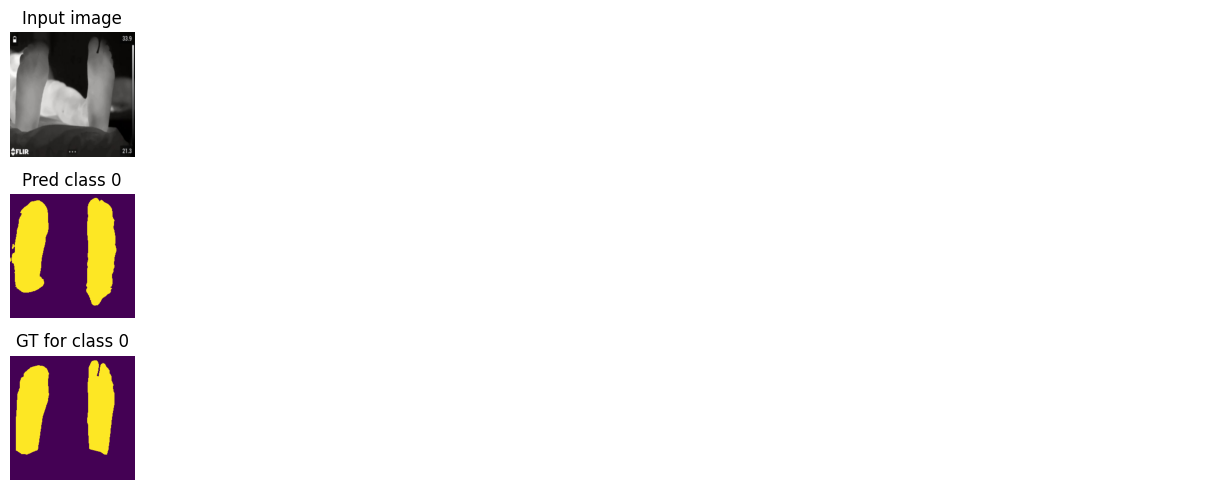

Train loss: 0.01498 | Time: 3m 23s | Val loss: 0.01302
Train_DICE_avg: 0.87494 | Train_Jaccard_avg: 0.78399 | Train_Sensitivity_avg: 0.89418 | Train_Specificity_avg: 0.95488 
Class 0 - Train_DICE: 0.87494 | Train_Jaccard: 0.78399 | Train_Sensitivity: 0.89418 | Train_Specificity: 0.95488 
Val_DICE_avg: 0.90011 | Val_Jaccard_avg: 0.82229 | Val_Sensitivity_avg: 0.90432 | Val_Specificity_avg: 0.96260 
Class 0 - Val_DICE: 0.90011 | Val_Jaccard: 0.82229 | Val_Sensitivity: 0.90432 | Val_Specificity: 0.96260 

Epoch 52/61


Validation Epoch 52/61: 100%|██████████| 2/2 [00:00<00:00,  3.04it/s]


Train loss: 0.01474 | Time: 3m 27s | Val loss: 0.01282
Train_DICE_avg: 0.87704 | Train_Jaccard_avg: 0.78836 | Train_Sensitivity_avg: 0.90057 | Train_Specificity_avg: 0.95481 
Class 0 - Train_DICE: 0.87704 | Train_Jaccard: 0.78836 | Train_Sensitivity: 0.90057 | Train_Specificity: 0.95481 
Val_DICE_avg: 0.90196 | Val_Jaccard_avg: 0.82542 | Val_Sensitivity_avg: 0.90406 | Val_Specificity_avg: 0.96471 
Class 0 - Val_DICE: 0.90196 | Val_Jaccard: 0.82542 | Val_Sensitivity: 0.90406 | Val_Specificity: 0.96471 

Epoch 53/61


Validation Epoch 53/61: 100%|██████████| 2/2 [00:00<00:00,  3.20it/s]


Train loss: 0.01440 | Time: 3m 31s | Val loss: 0.01280
Train_DICE_avg: 0.87469 | Train_Jaccard_avg: 0.78595 | Train_Sensitivity_avg: 0.90369 | Train_Specificity_avg: 0.95429 
Class 0 - Train_DICE: 0.87469 | Train_Jaccard: 0.78595 | Train_Sensitivity: 0.90369 | Train_Specificity: 0.95429 
Val_DICE_avg: 0.90247 | Val_Jaccard_avg: 0.82620 | Val_Sensitivity_avg: 0.90225 | Val_Specificity_avg: 0.96598 
Class 0 - Val_DICE: 0.90247 | Val_Jaccard: 0.82620 | Val_Sensitivity: 0.90225 | Val_Specificity: 0.96598 

Epoch 54/61


Validation Epoch 54/61: 100%|██████████| 2/2 [00:00<00:00,  3.17it/s]


Train loss: 0.01430 | Time: 3m 35s | Val loss: 0.01275
Train_DICE_avg: 0.88062 | Train_Jaccard_avg: 0.79316 | Train_Sensitivity_avg: 0.90321 | Train_Specificity_avg: 0.95624 
Class 0 - Train_DICE: 0.88062 | Train_Jaccard: 0.79316 | Train_Sensitivity: 0.90321 | Train_Specificity: 0.95624 
Val_DICE_avg: 0.90197 | Val_Jaccard_avg: 0.82538 | Val_Sensitivity_avg: 0.90599 | Val_Specificity_avg: 0.96457 
Class 0 - Val_DICE: 0.90197 | Val_Jaccard: 0.82538 | Val_Sensitivity: 0.90599 | Val_Specificity: 0.96457 

Epoch 55/61


Validation Epoch 55/61: 100%|██████████| 2/2 [00:00<00:00,  3.19it/s]


Train loss: 0.01436 | Time: 3m 38s | Val loss: 0.01285
Train_DICE_avg: 0.88081 | Train_Jaccard_avg: 0.79335 | Train_Sensitivity_avg: 0.90154 | Train_Specificity_avg: 0.95545 
Class 0 - Train_DICE: 0.88081 | Train_Jaccard: 0.79335 | Train_Sensitivity: 0.90154 | Train_Specificity: 0.95545 
Val_DICE_avg: 0.90123 | Val_Jaccard_avg: 0.82439 | Val_Sensitivity_avg: 0.90604 | Val_Specificity_avg: 0.96416 
Class 0 - Val_DICE: 0.90123 | Val_Jaccard: 0.82439 | Val_Sensitivity: 0.90604 | Val_Specificity: 0.96416 

Epoch 56/61


Validation Epoch 56/61: 100%|██████████| 2/2 [00:00<00:00,  3.06it/s]


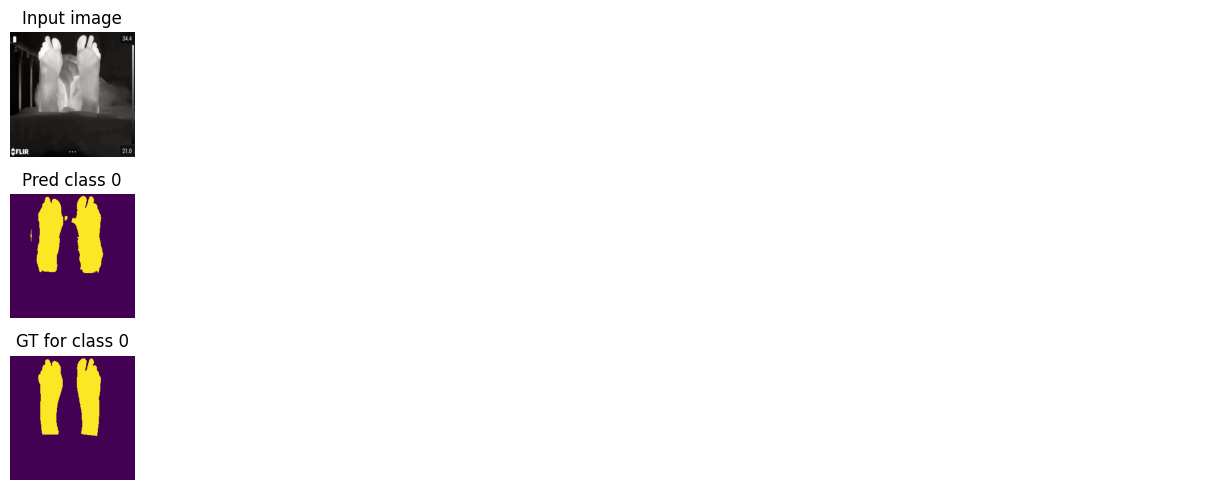

Train loss: 0.01418 | Time: 3m 43s | Val loss: 0.01269
Train_DICE_avg: 0.88443 | Train_Jaccard_avg: 0.79804 | Train_Sensitivity_avg: 0.90445 | Train_Specificity_avg: 0.95652 
Class 0 - Train_DICE: 0.88443 | Train_Jaccard: 0.79804 | Train_Sensitivity: 0.90445 | Train_Specificity: 0.95652 
Val_DICE_avg: 0.90087 | Val_Jaccard_avg: 0.82390 | Val_Sensitivity_avg: 0.90853 | Val_Specificity_avg: 0.96290 
Class 0 - Val_DICE: 0.90087 | Val_Jaccard: 0.82390 | Val_Sensitivity: 0.90853 | Val_Specificity: 0.96290 

Epoch 57/61


Validation Epoch 57/61: 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]


Train loss: 0.01403 | Time: 3m 47s | Val loss: 0.01241
Train_DICE_avg: 0.88101 | Train_Jaccard_avg: 0.79371 | Train_Sensitivity_avg: 0.90733 | Train_Specificity_avg: 0.95598 
Class 0 - Train_DICE: 0.88101 | Train_Jaccard: 0.79371 | Train_Sensitivity: 0.90733 | Train_Specificity: 0.95598 
Val_DICE_avg: 0.90254 | Val_Jaccard_avg: 0.82648 | Val_Sensitivity_avg: 0.91352 | Val_Specificity_avg: 0.96211 
Class 0 - Val_DICE: 0.90254 | Val_Jaccard: 0.82648 | Val_Sensitivity: 0.91352 | Val_Specificity: 0.96211 

Epoch 58/61


Validation Epoch 58/61: 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]


Train loss: 0.01422 | Time: 3m 51s | Val loss: 0.01238
Train_DICE_avg: 0.87975 | Train_Jaccard_avg: 0.79262 | Train_Sensitivity_avg: 0.90471 | Train_Specificity_avg: 0.95623 
Class 0 - Train_DICE: 0.87975 | Train_Jaccard: 0.79262 | Train_Sensitivity: 0.90471 | Train_Specificity: 0.95623 
Val_DICE_avg: 0.90130 | Val_Jaccard_avg: 0.82465 | Val_Sensitivity_avg: 0.91953 | Val_Specificity_avg: 0.95975 
Class 0 - Val_DICE: 0.90130 | Val_Jaccard: 0.82465 | Val_Sensitivity: 0.91953 | Val_Specificity: 0.95975 

Epoch 59/61


Validation Epoch 59/61: 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]


Train loss: 0.01362 | Time: 3m 55s | Val loss: 0.01240
Train_DICE_avg: 0.88725 | Train_Jaccard_avg: 0.80246 | Train_Sensitivity_avg: 0.90458 | Train_Specificity_avg: 0.95868 
Class 0 - Train_DICE: 0.88725 | Train_Jaccard: 0.80246 | Train_Sensitivity: 0.90458 | Train_Specificity: 0.95868 
Val_DICE_avg: 0.90215 | Val_Jaccard_avg: 0.82612 | Val_Sensitivity_avg: 0.91696 | Val_Specificity_avg: 0.96119 
Class 0 - Val_DICE: 0.90215 | Val_Jaccard: 0.82612 | Val_Sensitivity: 0.91696 | Val_Specificity: 0.96119 

Epoch 60/61


Validation Epoch 60/61: 100%|██████████| 2/2 [00:00<00:00,  3.09it/s]


Train loss: 0.01377 | Time: 3m 59s | Val loss: 0.01241
Train_DICE_avg: 0.88568 | Train_Jaccard_avg: 0.80035 | Train_Sensitivity_avg: 0.90509 | Train_Specificity_avg: 0.95829 
Class 0 - Train_DICE: 0.88568 | Train_Jaccard: 0.80035 | Train_Sensitivity: 0.90509 | Train_Specificity: 0.95829 
Val_DICE_avg: 0.90469 | Val_Jaccard_avg: 0.82982 | Val_Sensitivity_avg: 0.91182 | Val_Specificity_avg: 0.96353 
Class 0 - Val_DICE: 0.90469 | Val_Jaccard: 0.82982 | Val_Sensitivity: 0.91182 | Val_Specificity: 0.96353 

Epoch 61/61


Validation Epoch 61/61: 100%|██████████| 2/2 [00:00<00:00,  3.17it/s]


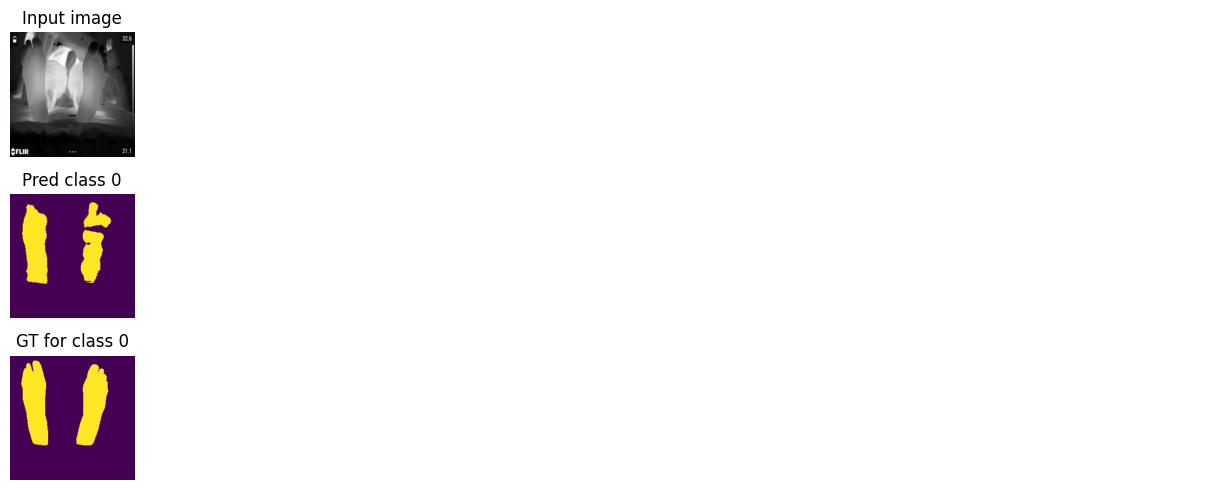

Train loss: 0.01363 | Time: 4m 3s | Val loss: 0.01237
Train_DICE_avg: 0.88688 | Train_Jaccard_avg: 0.80194 | Train_Sensitivity_avg: 0.90668 | Train_Specificity_avg: 0.95786 
Class 0 - Train_DICE: 0.88688 | Train_Jaccard: 0.80194 | Train_Sensitivity: 0.90668 | Train_Specificity: 0.95786 
Val_DICE_avg: 0.90633 | Val_Jaccard_avg: 0.83239 | Val_Sensitivity_avg: 0.90777 | Val_Specificity_avg: 0.96583 
Class 0 - Val_DICE: 0.90633 | Val_Jaccard: 0.83239 | Val_Sensitivity: 0.90777 | Val_Specificity: 0.96583 


Training DICE,▁▃▃▄▄▅▅▅▅▅▆▆▆▆▆▆▆▇▇▇▇▇▇▇▇███████████████
Training Jaccard,▁▂▃▃▄▄▄▅▅▅▅▅▅▅▆▆▆▆▆▆▆▇▇▇▇▇▇▇▇█▇█████████
Training Loss,█▇▇▆▅▅▅▄▄▄▄▄▄▄▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁
Training Sensitivity,▁▂▃▄▄▄▅▄▅▅▅▅▆▆▆▆▆▆▆▆▇▇▇▇▇▇▇▇████████████
Training Specificity,▁▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇▇▇██████████████
Validation DICE,▁▁▅▆▇▇▇▇▇▇▇▇▇▇▇▇██▇▇█▇██████████████████
Validation Jaccard,▁▁▄▆▆▆▇▆▇▇▇▇▇▇▇▇▇▇▇▇▇███████████████████
Validation Loss,█▇▅▄▄▃▃▃▃▃▃▃▂▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Validation Sensitivity,██▆▃▂▁▂▂▃▃▃▃▃▃▃▂▄▃▃▅▄▅▅▄▅▄▄▅▅▅▅▅▅▅▅▅▅▅▆▅
Validation Specificity,▁▁▄▆▇▇▆▇▇▇▇▇▇▇▇▇█▇▇▇▇▇██████████████████
Training DICE,0.88688



Training complete!


In [ ]:
trainer = SegmentationModel_Trainer(train_loader=train_dataset,valid_loader=valid_dataset,config=config)
trainer.start()

In [17]:
model = DeepLabV3Plus(in_channels=config["Input size"][0],out_channels=config["Number of classes"], final_activation=config["Activation function"])
state_dict = torch.load('./models/best_model(3).pt', weights_only=True)
model.load_state_dict(state_dict)

<All keys matched successfully>

In [18]:
PerformanceModels(model=model,test_dataset=test_dataset,config=config)

Testing model's performance: 100%|██████████| 1/1 [00:00<00:00,  2.79it/s]


Global Performance Metrics:
Loss mean: 0.01513, std: 0.00000
Dice Coefficient mean: 0.85524, std: 0.12066
Jaccard Index mean: 0.76272, std: 0.14988
Sensitivity mean: 0.95223, std: 0.05073
Specificity mean: 0.92618, std: 0.05045

Per-Class Performance Metrics:

Class 0:
Dice mean: 0.85524, std: 0.12066
Jaccard mean: 0.76272, std: 0.14988
Sensitivity mean: 0.95223, std: 0.05073
Specificity mean: 0.92618, std: 0.05045


### Tversky Loss

In [19]:
config["Activation function"] = "sigmoid"
config["Loss function"] = "Tversky"
config["Alpha"] = 0.7
config["Beta"] = 0.3
config["Wandb monitoring"] = ["5092b6e1a9fb50d7448b32f2db4d0163bb5ef14f","MasterTests","FeetMamitas-DeepLabV3+-Tversky"]

Automatic Mixed Precision (AMP) enabled.
DEVICE INFORMATION
Current device: cuda:0
Device type: cuda
CUDA available: Yes
CUDA version: 12.4
Number of CUDA devices: 1
Current CUDA device index: 0
Current CUDA device name: NVIDIA A100-SXM4-40GB
GPU Memory - Allocated: 0.76 GB
GPU Memory - Reserved: 1.96 GB
GPU Memory - Total: 39.56 GB
GPU Compute Capability: 8.0
GPU Multiprocessors: 108
PyTorch version: 2.6.0+cu124


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc



Epoch 1/61
Training phase 1


Validation Epoch 1/61: 100%|██████████| 2/2 [00:00<00:00,  3.17it/s]


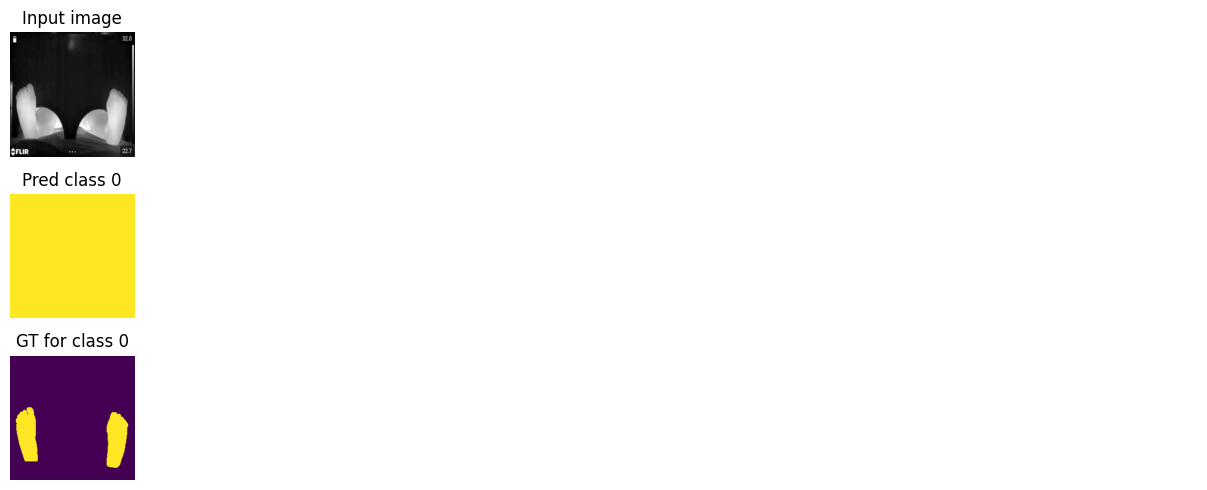

Train loss: 0.67865 | Time: 0m 4s | Val loss: 0.70620
Train_DICE_avg: 0.44648 | Train_Jaccard_avg: 0.29871 | Train_Sensitivity_avg: 0.37229 | Train_Specificity_avg: 0.85461 
Class 0 - Train_DICE: 0.44648 | Train_Jaccard: 0.29871 | Train_Sensitivity: 0.37229 | Train_Specificity: 0.85461 
Val_DICE_avg: 0.39369 | Val_Jaccard_avg: 0.25519 | Val_Sensitivity_avg: 0.25519 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.39369 | Val_Jaccard: 0.25519 | Val_Sensitivity: 0.25519 | Val_Specificity: 1.00000 

Epoch 2/61


Validation Epoch 2/61: 100%|██████████| 2/2 [00:00<00:00,  3.19it/s]


Train loss: 0.61453 | Time: 0m 8s | Val loss: 0.69692
Train_DICE_avg: 0.53653 | Train_Jaccard_avg: 0.37692 | Train_Sensitivity_avg: 0.41068 | Train_Specificity_avg: 0.92393 
Class 0 - Train_DICE: 0.53653 | Train_Jaccard: 0.37692 | Train_Sensitivity: 0.41068 | Train_Specificity: 0.92393 
Val_DICE_avg: 0.49545 | Val_Jaccard_avg: 0.34238 | Val_Sensitivity_avg: 0.35021 | Val_Specificity_avg: 0.95586 
Class 0 - Val_DICE: 0.49545 | Val_Jaccard: 0.34238 | Val_Sensitivity: 0.35021 | Val_Specificity: 0.95586 

Epoch 3/61


Validation Epoch 3/61: 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]


Train loss: 0.57624 | Time: 0m 12s | Val loss: 0.67126
Train_DICE_avg: 0.55101 | Train_Jaccard_avg: 0.39184 | Train_Sensitivity_avg: 0.42397 | Train_Specificity_avg: 0.93238 
Class 0 - Train_DICE: 0.55101 | Train_Jaccard: 0.39184 | Train_Sensitivity: 0.42397 | Train_Specificity: 0.93238 
Val_DICE_avg: 0.59448 | Val_Jaccard_avg: 0.43481 | Val_Sensitivity_avg: 0.48586 | Val_Specificity_avg: 0.92026 
Class 0 - Val_DICE: 0.59448 | Val_Jaccard: 0.43481 | Val_Sensitivity: 0.48586 | Val_Specificity: 0.92026 

Epoch 4/61


Validation Epoch 4/61: 100%|██████████| 2/2 [00:00<00:00,  3.20it/s]


Train loss: 0.54215 | Time: 0m 15s | Val loss: 0.62132
Train_DICE_avg: 0.58239 | Train_Jaccard_avg: 0.42233 | Train_Sensitivity_avg: 0.45407 | Train_Specificity_avg: 0.94127 
Class 0 - Train_DICE: 0.58239 | Train_Jaccard: 0.42233 | Train_Sensitivity: 0.45407 | Train_Specificity: 0.94127 
Val_DICE_avg: 0.65103 | Val_Jaccard_avg: 0.49541 | Val_Sensitivity_avg: 0.64853 | Val_Specificity_avg: 0.89450 
Class 0 - Val_DICE: 0.65103 | Val_Jaccard: 0.49541 | Val_Sensitivity: 0.64853 | Val_Specificity: 0.89450 

Epoch 5/61


Validation Epoch 5/61: 100%|██████████| 2/2 [00:00<00:00,  3.21it/s]


Train loss: 0.51515 | Time: 0m 19s | Val loss: 0.53931
Train_DICE_avg: 0.61110 | Train_Jaccard_avg: 0.45325 | Train_Sensitivity_avg: 0.49363 | Train_Specificity_avg: 0.94249 
Class 0 - Train_DICE: 0.61110 | Train_Jaccard: 0.45325 | Train_Sensitivity: 0.49363 | Train_Specificity: 0.94249 
Val_DICE_avg: 0.69366 | Val_Jaccard_avg: 0.54569 | Val_Sensitivity_avg: 0.67461 | Val_Specificity_avg: 0.91460 
Class 0 - Val_DICE: 0.69366 | Val_Jaccard: 0.54569 | Val_Sensitivity: 0.67461 | Val_Specificity: 0.91460 

Epoch 6/61


Validation Epoch 6/61: 100%|██████████| 2/2 [00:00<00:00,  3.18it/s]


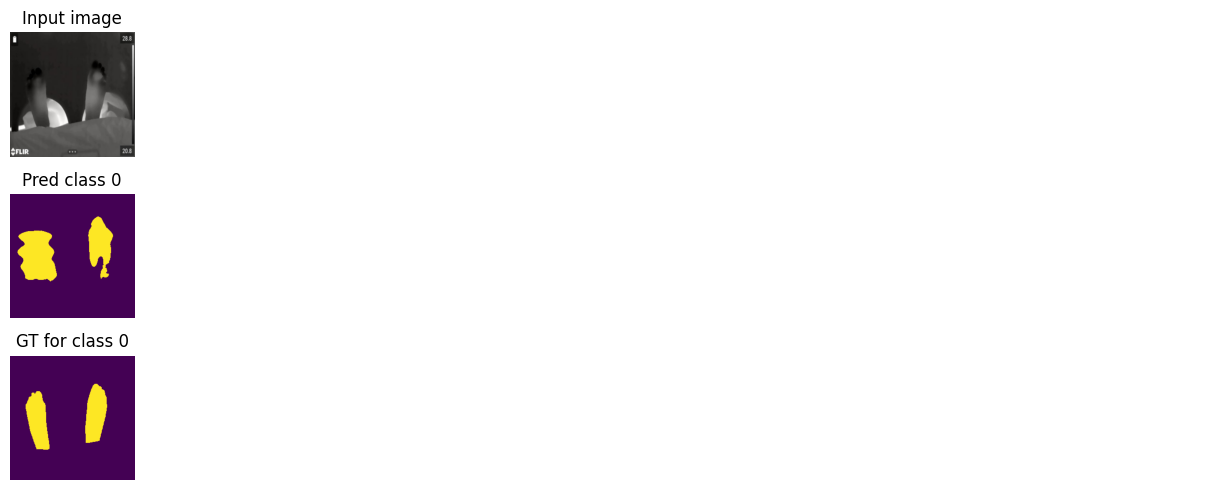

Train loss: 0.48807 | Time: 0m 23s | Val loss: 0.47809
Train_DICE_avg: 0.63650 | Train_Jaccard_avg: 0.48145 | Train_Sensitivity_avg: 0.52486 | Train_Specificity_avg: 0.94432 
Class 0 - Train_DICE: 0.63650 | Train_Jaccard: 0.48145 | Train_Sensitivity: 0.52486 | Train_Specificity: 0.94432 
Val_DICE_avg: 0.70574 | Val_Jaccard_avg: 0.56102 | Val_Sensitivity_avg: 0.61850 | Val_Specificity_avg: 0.94852 
Class 0 - Val_DICE: 0.70574 | Val_Jaccard: 0.56102 | Val_Sensitivity: 0.61850 | Val_Specificity: 0.94852 

Epoch 7/61


Validation Epoch 7/61: 100%|██████████| 2/2 [00:00<00:00,  3.19it/s]


Train loss: 0.46823 | Time: 0m 27s | Val loss: 0.47077
Train_DICE_avg: 0.65061 | Train_Jaccard_avg: 0.49654 | Train_Sensitivity_avg: 0.54876 | Train_Specificity_avg: 0.94142 
Class 0 - Train_DICE: 0.65061 | Train_Jaccard: 0.49654 | Train_Sensitivity: 0.54876 | Train_Specificity: 0.94142 
Val_DICE_avg: 0.67514 | Val_Jaccard_avg: 0.52657 | Val_Sensitivity_avg: 0.54628 | Val_Specificity_avg: 0.97533 
Class 0 - Val_DICE: 0.67514 | Val_Jaccard: 0.52657 | Val_Sensitivity: 0.54628 | Val_Specificity: 0.97533 

Epoch 8/61


Validation Epoch 8/61: 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]


Train loss: 0.44778 | Time: 0m 31s | Val loss: 0.46185
Train_DICE_avg: 0.66764 | Train_Jaccard_avg: 0.51459 | Train_Sensitivity_avg: 0.57606 | Train_Specificity_avg: 0.93983 
Class 0 - Train_DICE: 0.66764 | Train_Jaccard: 0.51459 | Train_Sensitivity: 0.57606 | Train_Specificity: 0.93983 
Val_DICE_avg: 0.67347 | Val_Jaccard_avg: 0.52469 | Val_Sensitivity_avg: 0.53931 | Val_Specificity_avg: 0.98186 
Class 0 - Val_DICE: 0.67347 | Val_Jaccard: 0.52469 | Val_Sensitivity: 0.53931 | Val_Specificity: 0.98186 

Epoch 9/61


Validation Epoch 9/61: 100%|██████████| 2/2 [00:00<00:00,  3.20it/s]


Train loss: 0.43092 | Time: 0m 34s | Val loss: 0.45019
Train_DICE_avg: 0.68265 | Train_Jaccard_avg: 0.53137 | Train_Sensitivity_avg: 0.59865 | Train_Specificity_avg: 0.94025 
Class 0 - Train_DICE: 0.68265 | Train_Jaccard: 0.53137 | Train_Sensitivity: 0.59865 | Train_Specificity: 0.94025 
Val_DICE_avg: 0.67916 | Val_Jaccard_avg: 0.53138 | Val_Sensitivity_avg: 0.54556 | Val_Specificity_avg: 0.98362 
Class 0 - Val_DICE: 0.67916 | Val_Jaccard: 0.53138 | Val_Sensitivity: 0.54556 | Val_Specificity: 0.98362 

Epoch 10/61


Validation Epoch 10/61: 100%|██████████| 2/2 [00:00<00:00,  3.19it/s]


Train loss: 0.41848 | Time: 0m 38s | Val loss: 0.44168
Train_DICE_avg: 0.69105 | Train_Jaccard_avg: 0.54037 | Train_Sensitivity_avg: 0.61223 | Train_Specificity_avg: 0.93897 
Class 0 - Train_DICE: 0.69105 | Train_Jaccard: 0.54037 | Train_Sensitivity: 0.61223 | Train_Specificity: 0.93897 
Val_DICE_avg: 0.68057 | Val_Jaccard_avg: 0.53252 | Val_Sensitivity_avg: 0.54550 | Val_Specificity_avg: 0.98445 
Class 0 - Val_DICE: 0.68057 | Val_Jaccard: 0.53252 | Val_Sensitivity: 0.54550 | Val_Specificity: 0.98445 

Epoch 11/61
Training phase 2


Validation Epoch 11/61: 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]


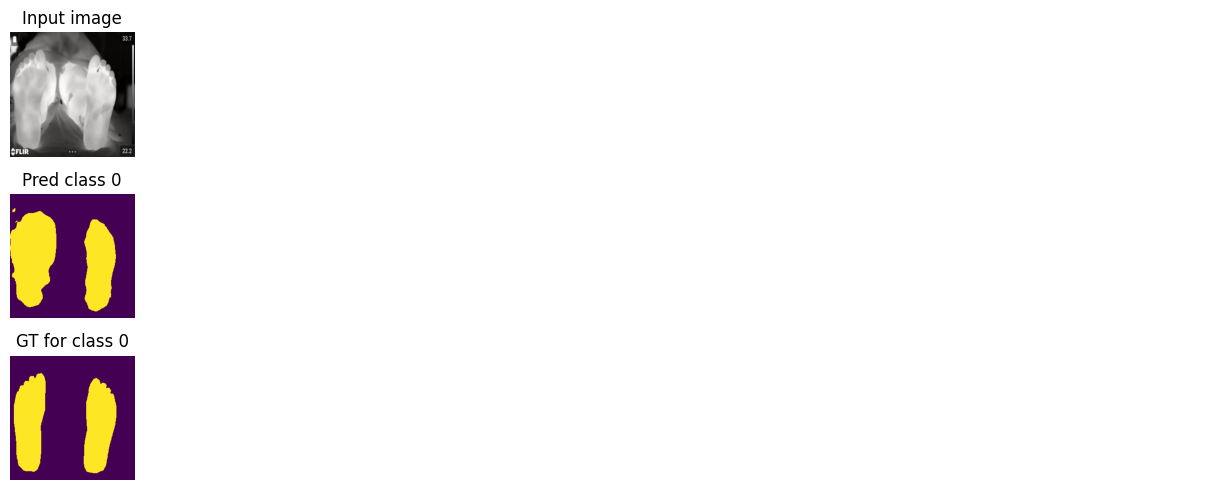

Train loss: 0.41267 | Time: 0m 43s | Val loss: 0.37825
Train_DICE_avg: 0.68932 | Train_Jaccard_avg: 0.53838 | Train_Sensitivity_avg: 0.62097 | Train_Specificity_avg: 0.93328 
Class 0 - Train_DICE: 0.68932 | Train_Jaccard: 0.53838 | Train_Sensitivity: 0.62097 | Train_Specificity: 0.93328 
Val_DICE_avg: 0.74922 | Val_Jaccard_avg: 0.61164 | Val_Sensitivity_avg: 0.65852 | Val_Specificity_avg: 0.96214 
Class 0 - Val_DICE: 0.74922 | Val_Jaccard: 0.61164 | Val_Sensitivity: 0.65852 | Val_Specificity: 0.96214 

Epoch 12/61


Validation Epoch 12/61: 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]


Train loss: 0.39365 | Time: 0m 46s | Val loss: 0.34548
Train_DICE_avg: 0.70682 | Train_Jaccard_avg: 0.55903 | Train_Sensitivity_avg: 0.64372 | Train_Specificity_avg: 0.93542 
Class 0 - Train_DICE: 0.70682 | Train_Jaccard: 0.55903 | Train_Sensitivity: 0.64372 | Train_Specificity: 0.93542 
Val_DICE_avg: 0.77406 | Val_Jaccard_avg: 0.64160 | Val_Sensitivity_avg: 0.72787 | Val_Specificity_avg: 0.94672 
Class 0 - Val_DICE: 0.77406 | Val_Jaccard: 0.64160 | Val_Sensitivity: 0.72787 | Val_Specificity: 0.94672 

Epoch 13/61


Validation Epoch 13/61: 100%|██████████| 2/2 [00:00<00:00,  3.17it/s]


Train loss: 0.38193 | Time: 0m 50s | Val loss: 0.35870
Train_DICE_avg: 0.71617 | Train_Jaccard_avg: 0.57076 | Train_Sensitivity_avg: 0.65553 | Train_Specificity_avg: 0.93652 
Class 0 - Train_DICE: 0.71617 | Train_Jaccard: 0.57076 | Train_Sensitivity: 0.65553 | Train_Specificity: 0.93652 
Val_DICE_avg: 0.75851 | Val_Jaccard_avg: 0.62387 | Val_Sensitivity_avg: 0.66766 | Val_Specificity_avg: 0.96552 
Class 0 - Val_DICE: 0.75851 | Val_Jaccard: 0.62387 | Val_Sensitivity: 0.66766 | Val_Specificity: 0.96552 

Epoch 14/61


Validation Epoch 14/61: 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]


Train loss: 0.37195 | Time: 0m 54s | Val loss: 0.33187
Train_DICE_avg: 0.72122 | Train_Jaccard_avg: 0.57672 | Train_Sensitivity_avg: 0.66288 | Train_Specificity_avg: 0.93766 
Class 0 - Train_DICE: 0.72122 | Train_Jaccard: 0.57672 | Train_Sensitivity: 0.66288 | Train_Specificity: 0.93766 
Val_DICE_avg: 0.77664 | Val_Jaccard_avg: 0.64553 | Val_Sensitivity_avg: 0.71220 | Val_Specificity_avg: 0.95475 
Class 0 - Val_DICE: 0.77664 | Val_Jaccard: 0.64553 | Val_Sensitivity: 0.71220 | Val_Specificity: 0.95475 

Epoch 15/61


Validation Epoch 15/61: 100%|██████████| 2/2 [00:00<00:00,  3.10it/s]


Train loss: 0.36612 | Time: 0m 58s | Val loss: 0.32327
Train_DICE_avg: 0.72497 | Train_Jaccard_avg: 0.58073 | Train_Sensitivity_avg: 0.67574 | Train_Specificity_avg: 0.93338 
Class 0 - Train_DICE: 0.72497 | Train_Jaccard: 0.58073 | Train_Sensitivity: 0.67574 | Train_Specificity: 0.93338 
Val_DICE_avg: 0.77995 | Val_Jaccard_avg: 0.64990 | Val_Sensitivity_avg: 0.71956 | Val_Specificity_avg: 0.95379 
Class 0 - Val_DICE: 0.77995 | Val_Jaccard: 0.64990 | Val_Sensitivity: 0.71956 | Val_Specificity: 0.95379 

Epoch 16/61


Validation Epoch 16/61: 100%|██████████| 2/2 [00:00<00:00,  3.18it/s]


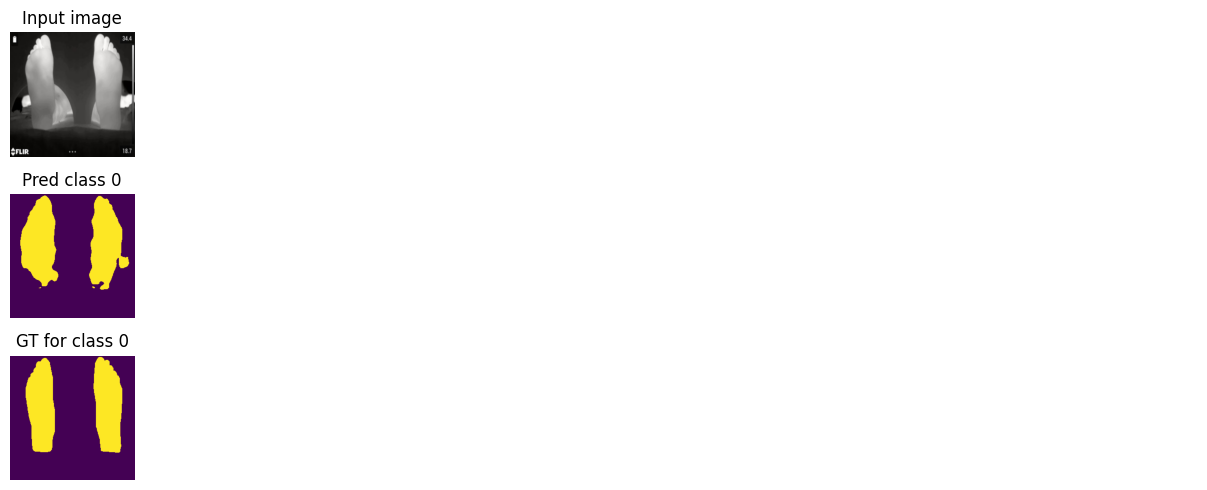

Train loss: 0.35853 | Time: 1m 2s | Val loss: 0.34314
Train_DICE_avg: 0.72913 | Train_Jaccard_avg: 0.58621 | Train_Sensitivity_avg: 0.68140 | Train_Specificity_avg: 0.93455 
Class 0 - Train_DICE: 0.72913 | Train_Jaccard: 0.58621 | Train_Sensitivity: 0.68140 | Train_Specificity: 0.93455 
Val_DICE_avg: 0.75987 | Val_Jaccard_avg: 0.62559 | Val_Sensitivity_avg: 0.66222 | Val_Specificity_avg: 0.97015 
Class 0 - Val_DICE: 0.75987 | Val_Jaccard: 0.62559 | Val_Sensitivity: 0.66222 | Val_Specificity: 0.97015 

Epoch 17/61


Validation Epoch 17/61: 100%|██████████| 2/2 [00:00<00:00,  2.88it/s]


Train loss: 0.35100 | Time: 1m 6s | Val loss: 0.29925
Train_DICE_avg: 0.73366 | Train_Jaccard_avg: 0.59163 | Train_Sensitivity_avg: 0.69038 | Train_Specificity_avg: 0.93394 
Class 0 - Train_DICE: 0.73366 | Train_Jaccard: 0.59163 | Train_Sensitivity: 0.69038 | Train_Specificity: 0.93394 
Val_DICE_avg: 0.79146 | Val_Jaccard_avg: 0.66491 | Val_Sensitivity_avg: 0.74784 | Val_Specificity_avg: 0.94874 
Class 0 - Val_DICE: 0.79146 | Val_Jaccard: 0.66491 | Val_Sensitivity: 0.74784 | Val_Specificity: 0.94874 

Epoch 18/61


Validation Epoch 18/61: 100%|██████████| 2/2 [00:00<00:00,  3.12it/s]


Train loss: 0.34408 | Time: 1m 10s | Val loss: 0.28591
Train_DICE_avg: 0.73849 | Train_Jaccard_avg: 0.59632 | Train_Sensitivity_avg: 0.69724 | Train_Specificity_avg: 0.93501 
Class 0 - Train_DICE: 0.73849 | Train_Jaccard: 0.59632 | Train_Sensitivity: 0.69724 | Train_Specificity: 0.93501 
Val_DICE_avg: 0.79523 | Val_Jaccard_avg: 0.66983 | Val_Sensitivity_avg: 0.78240 | Val_Specificity_avg: 0.93828 
Class 0 - Val_DICE: 0.79523 | Val_Jaccard: 0.66983 | Val_Sensitivity: 0.78240 | Val_Specificity: 0.93828 

Epoch 19/61


Validation Epoch 19/61: 100%|██████████| 2/2 [00:00<00:00,  3.14it/s]


Train loss: 0.33780 | Time: 1m 14s | Val loss: 0.28712
Train_DICE_avg: 0.74210 | Train_Jaccard_avg: 0.60113 | Train_Sensitivity_avg: 0.70274 | Train_Specificity_avg: 0.93449 
Class 0 - Train_DICE: 0.74210 | Train_Jaccard: 0.60113 | Train_Sensitivity: 0.70274 | Train_Specificity: 0.93449 
Val_DICE_avg: 0.79671 | Val_Jaccard_avg: 0.67264 | Val_Sensitivity_avg: 0.76006 | Val_Specificity_avg: 0.94793 
Class 0 - Val_DICE: 0.79671 | Val_Jaccard: 0.67264 | Val_Sensitivity: 0.76006 | Val_Specificity: 0.94793 

Epoch 20/61


Validation Epoch 20/61: 100%|██████████| 2/2 [00:00<00:00,  2.96it/s]


Train loss: 0.32928 | Time: 1m 18s | Val loss: 0.28942
Train_DICE_avg: 0.74694 | Train_Jaccard_avg: 0.60849 | Train_Sensitivity_avg: 0.71453 | Train_Specificity_avg: 0.93439 
Class 0 - Train_DICE: 0.74694 | Train_Jaccard: 0.60849 | Train_Sensitivity: 0.71453 | Train_Specificity: 0.93439 
Val_DICE_avg: 0.79514 | Val_Jaccard_avg: 0.67128 | Val_Sensitivity_avg: 0.74194 | Val_Specificity_avg: 0.95477 
Class 0 - Val_DICE: 0.79514 | Val_Jaccard: 0.67128 | Val_Sensitivity: 0.74194 | Val_Specificity: 0.95477 

Epoch 21/61
Training phase 3


Validation Epoch 21/61: 100%|██████████| 2/2 [00:00<00:00,  3.19it/s]


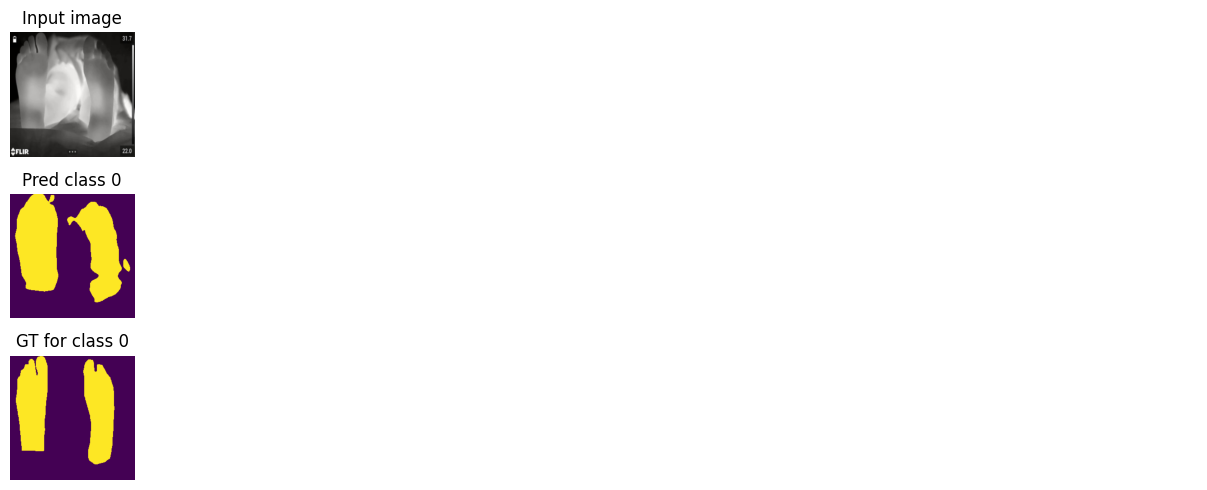

Train loss: 0.32869 | Time: 1m 22s | Val loss: 0.27351
Train_DICE_avg: 0.74434 | Train_Jaccard_avg: 0.60587 | Train_Sensitivity_avg: 0.71937 | Train_Specificity_avg: 0.93155 
Class 0 - Train_DICE: 0.74434 | Train_Jaccard: 0.60587 | Train_Sensitivity: 0.71937 | Train_Specificity: 0.93155 
Val_DICE_avg: 0.80311 | Val_Jaccard_avg: 0.68053 | Val_Sensitivity_avg: 0.76845 | Val_Specificity_avg: 0.94707 
Class 0 - Val_DICE: 0.80311 | Val_Jaccard: 0.68053 | Val_Sensitivity: 0.76845 | Val_Specificity: 0.94707 

Epoch 22/61


Validation Epoch 22/61: 100%|██████████| 2/2 [00:00<00:00,  3.19it/s]


Train loss: 0.31667 | Time: 1m 26s | Val loss: 0.25510
Train_DICE_avg: 0.75399 | Train_Jaccard_avg: 0.61695 | Train_Sensitivity_avg: 0.72731 | Train_Specificity_avg: 0.93314 
Class 0 - Train_DICE: 0.75399 | Train_Jaccard: 0.61695 | Train_Sensitivity: 0.72731 | Train_Specificity: 0.93314 
Val_DICE_avg: 0.80973 | Val_Jaccard_avg: 0.68872 | Val_Sensitivity_avg: 0.80914 | Val_Specificity_avg: 0.93464 
Class 0 - Val_DICE: 0.80973 | Val_Jaccard: 0.68872 | Val_Sensitivity: 0.80914 | Val_Specificity: 0.93464 

Epoch 23/61


Validation Epoch 23/61: 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]


Train loss: 0.31328 | Time: 1m 31s | Val loss: 0.24841
Train_DICE_avg: 0.75472 | Train_Jaccard_avg: 0.61859 | Train_Sensitivity_avg: 0.73016 | Train_Specificity_avg: 0.93268 
Class 0 - Train_DICE: 0.75472 | Train_Jaccard: 0.61859 | Train_Sensitivity: 0.73016 | Train_Specificity: 0.93268 
Val_DICE_avg: 0.81098 | Val_Jaccard_avg: 0.69192 | Val_Sensitivity_avg: 0.82102 | Val_Specificity_avg: 0.93399 
Class 0 - Val_DICE: 0.81098 | Val_Jaccard: 0.69192 | Val_Sensitivity: 0.82102 | Val_Specificity: 0.93399 

Epoch 24/61


Validation Epoch 24/61: 100%|██████████| 2/2 [00:00<00:00,  3.19it/s]


Train loss: 0.29580 | Time: 1m 34s | Val loss: 0.24861
Train_DICE_avg: 0.77141 | Train_Jaccard_avg: 0.63905 | Train_Sensitivity_avg: 0.74999 | Train_Specificity_avg: 0.93715 
Class 0 - Train_DICE: 0.77141 | Train_Jaccard: 0.63905 | Train_Sensitivity: 0.74999 | Train_Specificity: 0.93715 
Val_DICE_avg: 0.80864 | Val_Jaccard_avg: 0.69050 | Val_Sensitivity_avg: 0.81829 | Val_Specificity_avg: 0.93711 
Class 0 - Val_DICE: 0.80864 | Val_Jaccard: 0.69050 | Val_Sensitivity: 0.81829 | Val_Specificity: 0.93711 

Epoch 25/61


Validation Epoch 25/61: 100%|██████████| 2/2 [00:00<00:00,  3.14it/s]


Train loss: 0.29128 | Time: 1m 38s | Val loss: 0.24075
Train_DICE_avg: 0.77458 | Train_Jaccard_avg: 0.64305 | Train_Sensitivity_avg: 0.75318 | Train_Specificity_avg: 0.93763 
Class 0 - Train_DICE: 0.77458 | Train_Jaccard: 0.64305 | Train_Sensitivity: 0.75318 | Train_Specificity: 0.93763 
Val_DICE_avg: 0.81218 | Val_Jaccard_avg: 0.69564 | Val_Sensitivity_avg: 0.83141 | Val_Specificity_avg: 0.93604 
Class 0 - Val_DICE: 0.81218 | Val_Jaccard: 0.69564 | Val_Sensitivity: 0.83141 | Val_Specificity: 0.93604 

Epoch 26/61


Validation Epoch 26/61: 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]


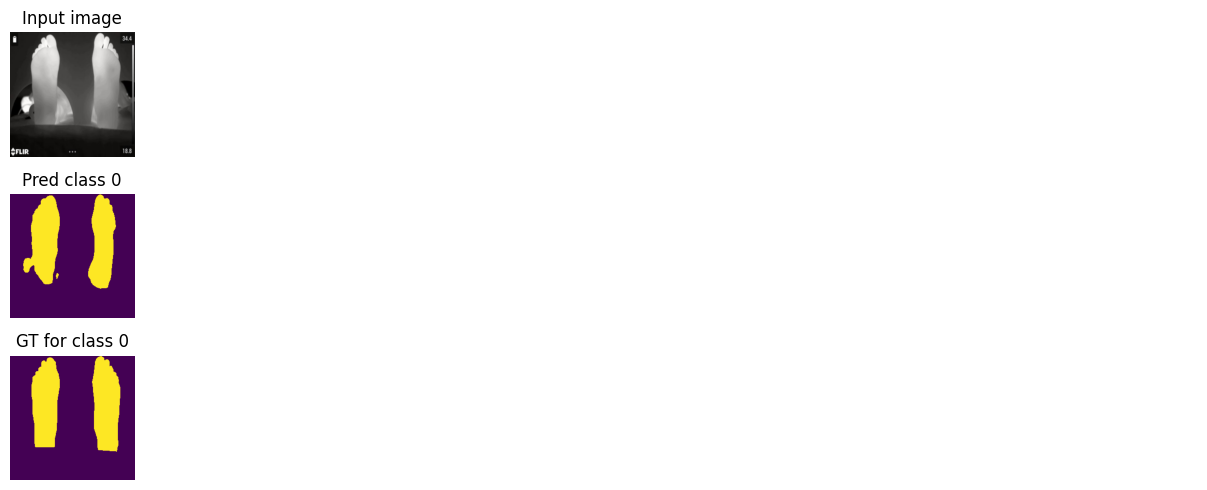

Train loss: 0.28419 | Time: 1m 43s | Val loss: 0.24260
Train_DICE_avg: 0.77842 | Train_Jaccard_avg: 0.64868 | Train_Sensitivity_avg: 0.76366 | Train_Specificity_avg: 0.93628 
Class 0 - Train_DICE: 0.77842 | Train_Jaccard: 0.64868 | Train_Sensitivity: 0.76366 | Train_Specificity: 0.93628 
Val_DICE_avg: 0.81764 | Val_Jaccard_avg: 0.70163 | Val_Sensitivity_avg: 0.80580 | Val_Specificity_avg: 0.94553 
Class 0 - Val_DICE: 0.81764 | Val_Jaccard: 0.70163 | Val_Sensitivity: 0.80580 | Val_Specificity: 0.94553 

Epoch 27/61


Validation Epoch 27/61: 100%|██████████| 2/2 [00:00<00:00,  3.20it/s]


Train loss: 0.28398 | Time: 1m 47s | Val loss: 0.23592
Train_DICE_avg: 0.77546 | Train_Jaccard_avg: 0.64712 | Train_Sensitivity_avg: 0.76403 | Train_Specificity_avg: 0.93452 
Class 0 - Train_DICE: 0.77546 | Train_Jaccard: 0.64712 | Train_Sensitivity: 0.76403 | Train_Specificity: 0.93452 
Val_DICE_avg: 0.82484 | Val_Jaccard_avg: 0.71129 | Val_Sensitivity_avg: 0.80882 | Val_Specificity_avg: 0.94917 
Class 0 - Val_DICE: 0.82484 | Val_Jaccard: 0.71129 | Val_Sensitivity: 0.80882 | Val_Specificity: 0.94917 

Epoch 28/61


Validation Epoch 28/61: 100%|██████████| 2/2 [00:00<00:00,  3.17it/s]


Train loss: 0.27590 | Time: 1m 50s | Val loss: 0.23028
Train_DICE_avg: 0.78241 | Train_Jaccard_avg: 0.65442 | Train_Sensitivity_avg: 0.77480 | Train_Specificity_avg: 0.93410 
Class 0 - Train_DICE: 0.78241 | Train_Jaccard: 0.65442 | Train_Sensitivity: 0.77480 | Train_Specificity: 0.93410 
Val_DICE_avg: 0.82432 | Val_Jaccard_avg: 0.71132 | Val_Sensitivity_avg: 0.81914 | Val_Specificity_avg: 0.94615 
Class 0 - Val_DICE: 0.82432 | Val_Jaccard: 0.71132 | Val_Sensitivity: 0.81914 | Val_Specificity: 0.94615 

Epoch 29/61


Validation Epoch 29/61: 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]


Train loss: 0.27050 | Time: 1m 54s | Val loss: 0.22027
Train_DICE_avg: 0.78614 | Train_Jaccard_avg: 0.65888 | Train_Sensitivity_avg: 0.77595 | Train_Specificity_avg: 0.93594 
Class 0 - Train_DICE: 0.78614 | Train_Jaccard: 0.65888 | Train_Sensitivity: 0.77595 | Train_Specificity: 0.93594 
Val_DICE_avg: 0.83034 | Val_Jaccard_avg: 0.71945 | Val_Sensitivity_avg: 0.83247 | Val_Specificity_avg: 0.94464 
Class 0 - Val_DICE: 0.83034 | Val_Jaccard: 0.71945 | Val_Sensitivity: 0.83247 | Val_Specificity: 0.94464 

Epoch 30/61


Validation Epoch 30/61: 100%|██████████| 2/2 [00:00<00:00,  3.07it/s]


Train loss: 0.26143 | Time: 1m 58s | Val loss: 0.22168
Train_DICE_avg: 0.79399 | Train_Jaccard_avg: 0.66889 | Train_Sensitivity_avg: 0.78656 | Train_Specificity_avg: 0.93603 
Class 0 - Train_DICE: 0.79399 | Train_Jaccard: 0.66889 | Train_Sensitivity: 0.78656 | Train_Specificity: 0.93603 
Val_DICE_avg: 0.82944 | Val_Jaccard_avg: 0.71785 | Val_Sensitivity_avg: 0.82700 | Val_Specificity_avg: 0.94601 
Class 0 - Val_DICE: 0.82944 | Val_Jaccard: 0.71785 | Val_Sensitivity: 0.82700 | Val_Specificity: 0.94601 

Epoch 31/61
Training phase 4


Validation Epoch 31/61: 100%|██████████| 2/2 [00:00<00:00,  3.18it/s]


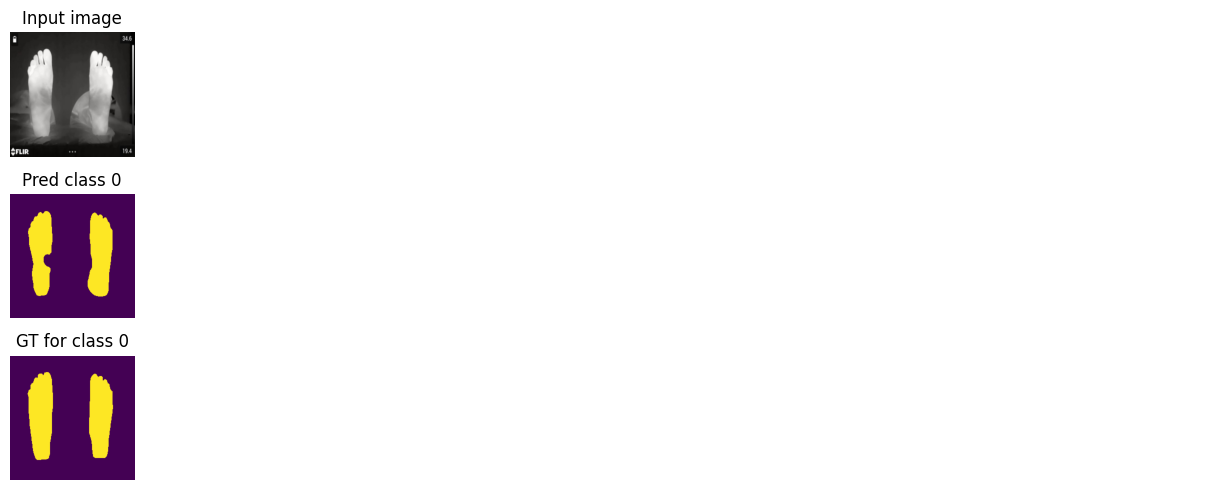

Train loss: 0.26050 | Time: 2m 2s | Val loss: 0.21175
Train_DICE_avg: 0.79023 | Train_Jaccard_avg: 0.66207 | Train_Sensitivity_avg: 0.79410 | Train_Specificity_avg: 0.93223 
Class 0 - Train_DICE: 0.79023 | Train_Jaccard: 0.66207 | Train_Sensitivity: 0.79410 | Train_Specificity: 0.93223 
Val_DICE_avg: 0.82565 | Val_Jaccard_avg: 0.71275 | Val_Sensitivity_avg: 0.86417 | Val_Specificity_avg: 0.93110 
Class 0 - Val_DICE: 0.82565 | Val_Jaccard: 0.71275 | Val_Sensitivity: 0.86417 | Val_Specificity: 0.93110 

Epoch 32/61


Validation Epoch 32/61: 100%|██████████| 2/2 [00:00<00:00,  2.96it/s]


Train loss: 0.25050 | Time: 2m 6s | Val loss: 0.20330
Train_DICE_avg: 0.79748 | Train_Jaccard_avg: 0.67306 | Train_Sensitivity_avg: 0.80315 | Train_Specificity_avg: 0.93493 
Class 0 - Train_DICE: 0.79748 | Train_Jaccard: 0.67306 | Train_Sensitivity: 0.80315 | Train_Specificity: 0.93493 
Val_DICE_avg: 0.82855 | Val_Jaccard_avg: 0.71693 | Val_Sensitivity_avg: 0.87499 | Val_Specificity_avg: 0.93037 
Class 0 - Val_DICE: 0.82855 | Val_Jaccard: 0.71693 | Val_Sensitivity: 0.87499 | Val_Specificity: 0.93037 

Epoch 33/61


Validation Epoch 33/61: 100%|██████████| 2/2 [00:00<00:00,  3.18it/s]


Train loss: 0.24363 | Time: 2m 10s | Val loss: 0.19568
Train_DICE_avg: 0.80290 | Train_Jaccard_avg: 0.68152 | Train_Sensitivity_avg: 0.80747 | Train_Specificity_avg: 0.93628 
Class 0 - Train_DICE: 0.80290 | Train_Jaccard: 0.68152 | Train_Sensitivity: 0.80747 | Train_Specificity: 0.93628 
Val_DICE_avg: 0.84598 | Val_Jaccard_avg: 0.74085 | Val_Sensitivity_avg: 0.85343 | Val_Specificity_avg: 0.94740 
Class 0 - Val_DICE: 0.84598 | Val_Jaccard: 0.74085 | Val_Sensitivity: 0.85343 | Val_Specificity: 0.94740 

Epoch 34/61


Validation Epoch 34/61: 100%|██████████| 2/2 [00:00<00:00,  3.17it/s]


Train loss: 0.23286 | Time: 2m 14s | Val loss: 0.19211
Train_DICE_avg: 0.81382 | Train_Jaccard_avg: 0.69532 | Train_Sensitivity_avg: 0.81963 | Train_Specificity_avg: 0.93796 
Class 0 - Train_DICE: 0.81382 | Train_Jaccard: 0.69532 | Train_Sensitivity: 0.81963 | Train_Specificity: 0.93796 
Val_DICE_avg: 0.85190 | Val_Jaccard_avg: 0.74958 | Val_Sensitivity_avg: 0.84954 | Val_Specificity_avg: 0.95258 
Class 0 - Val_DICE: 0.85190 | Val_Jaccard: 0.74958 | Val_Sensitivity: 0.84954 | Val_Specificity: 0.95258 

Epoch 35/61


Validation Epoch 35/61: 100%|██████████| 2/2 [00:00<00:00,  3.00it/s]


Train loss: 0.22747 | Time: 2m 18s | Val loss: 0.18550
Train_DICE_avg: 0.81568 | Train_Jaccard_avg: 0.69831 | Train_Sensitivity_avg: 0.82919 | Train_Specificity_avg: 0.93778 
Class 0 - Train_DICE: 0.81568 | Train_Jaccard: 0.69831 | Train_Sensitivity: 0.82919 | Train_Specificity: 0.93778 
Val_DICE_avg: 0.85125 | Val_Jaccard_avg: 0.74851 | Val_Sensitivity_avg: 0.86942 | Val_Specificity_avg: 0.94514 
Class 0 - Val_DICE: 0.85125 | Val_Jaccard: 0.74851 | Val_Sensitivity: 0.86942 | Val_Specificity: 0.94514 

Epoch 36/61


Validation Epoch 36/61: 100%|██████████| 2/2 [00:00<00:00,  3.19it/s]


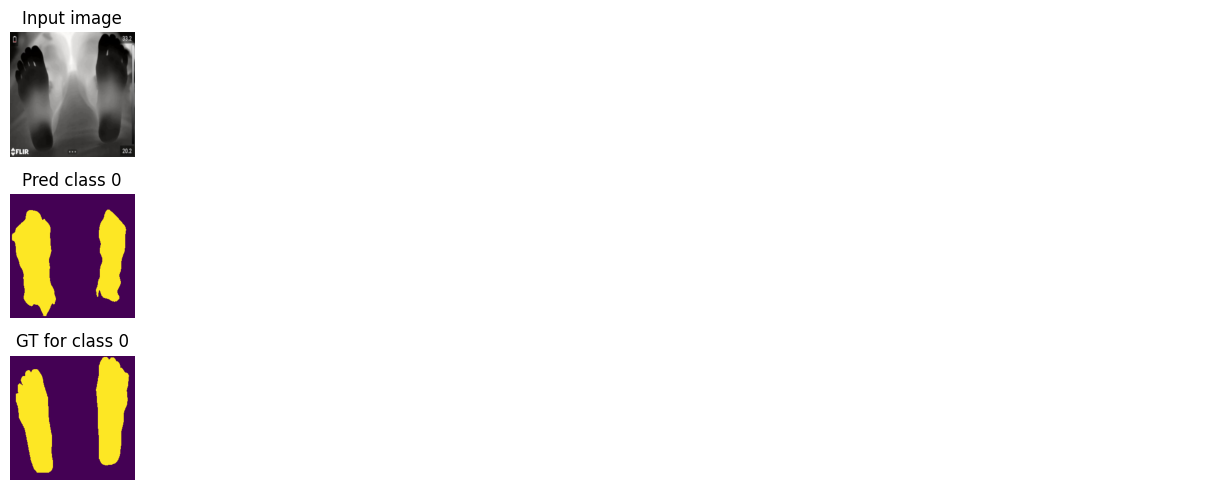

Train loss: 0.22310 | Time: 2m 22s | Val loss: 0.17874
Train_DICE_avg: 0.81844 | Train_Jaccard_avg: 0.70178 | Train_Sensitivity_avg: 0.83207 | Train_Specificity_avg: 0.93858 
Class 0 - Train_DICE: 0.81844 | Train_Jaccard: 0.70178 | Train_Sensitivity: 0.83207 | Train_Specificity: 0.93858 
Val_DICE_avg: 0.85705 | Val_Jaccard_avg: 0.75652 | Val_Sensitivity_avg: 0.87237 | Val_Specificity_avg: 0.94655 
Class 0 - Val_DICE: 0.85705 | Val_Jaccard: 0.75652 | Val_Sensitivity: 0.87237 | Val_Specificity: 0.94655 

Epoch 37/61


Validation Epoch 37/61: 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]


Train loss: 0.21499 | Time: 2m 26s | Val loss: 0.17823
Train_DICE_avg: 0.82534 | Train_Jaccard_avg: 0.71197 | Train_Sensitivity_avg: 0.83838 | Train_Specificity_avg: 0.93889 
Class 0 - Train_DICE: 0.82534 | Train_Jaccard: 0.71197 | Train_Sensitivity: 0.83838 | Train_Specificity: 0.93889 
Val_DICE_avg: 0.85594 | Val_Jaccard_avg: 0.75497 | Val_Sensitivity_avg: 0.87419 | Val_Specificity_avg: 0.94495 
Class 0 - Val_DICE: 0.85594 | Val_Jaccard: 0.75497 | Val_Sensitivity: 0.87419 | Val_Specificity: 0.94495 

Epoch 38/61


Validation Epoch 38/61: 100%|██████████| 2/2 [00:00<00:00,  2.99it/s]


Train loss: 0.20679 | Time: 2m 30s | Val loss: 0.17108
Train_DICE_avg: 0.83281 | Train_Jaccard_avg: 0.72182 | Train_Sensitivity_avg: 0.84601 | Train_Specificity_avg: 0.94005 
Class 0 - Train_DICE: 0.83281 | Train_Jaccard: 0.72182 | Train_Sensitivity: 0.84601 | Train_Specificity: 0.94005 
Val_DICE_avg: 0.85846 | Val_Jaccard_avg: 0.75854 | Val_Sensitivity_avg: 0.89033 | Val_Specificity_avg: 0.94233 
Class 0 - Val_DICE: 0.85846 | Val_Jaccard: 0.75854 | Val_Sensitivity: 0.89033 | Val_Specificity: 0.94233 

Epoch 39/61


Validation Epoch 39/61: 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]


Train loss: 0.20486 | Time: 2m 34s | Val loss: 0.16726
Train_DICE_avg: 0.83229 | Train_Jaccard_avg: 0.72155 | Train_Sensitivity_avg: 0.85310 | Train_Specificity_avg: 0.93934 
Class 0 - Train_DICE: 0.83229 | Train_Jaccard: 0.72155 | Train_Sensitivity: 0.85310 | Train_Specificity: 0.93934 
Val_DICE_avg: 0.86361 | Val_Jaccard_avg: 0.76631 | Val_Sensitivity_avg: 0.88709 | Val_Specificity_avg: 0.94551 
Class 0 - Val_DICE: 0.86361 | Val_Jaccard: 0.76631 | Val_Sensitivity: 0.88709 | Val_Specificity: 0.94551 

Epoch 40/61


Validation Epoch 40/61: 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]


Train loss: 0.20398 | Time: 2m 38s | Val loss: 0.16440
Train_DICE_avg: 0.83225 | Train_Jaccard_avg: 0.72157 | Train_Sensitivity_avg: 0.85187 | Train_Specificity_avg: 0.93863 
Class 0 - Train_DICE: 0.83225 | Train_Jaccard: 0.72157 | Train_Sensitivity: 0.85187 | Train_Specificity: 0.93863 
Val_DICE_avg: 0.87215 | Val_Jaccard_avg: 0.77918 | Val_Sensitivity_avg: 0.87627 | Val_Specificity_avg: 0.95387 
Class 0 - Val_DICE: 0.87215 | Val_Jaccard: 0.77918 | Val_Sensitivity: 0.87627 | Val_Specificity: 0.95387 

Epoch 41/61


Validation Epoch 41/61: 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]


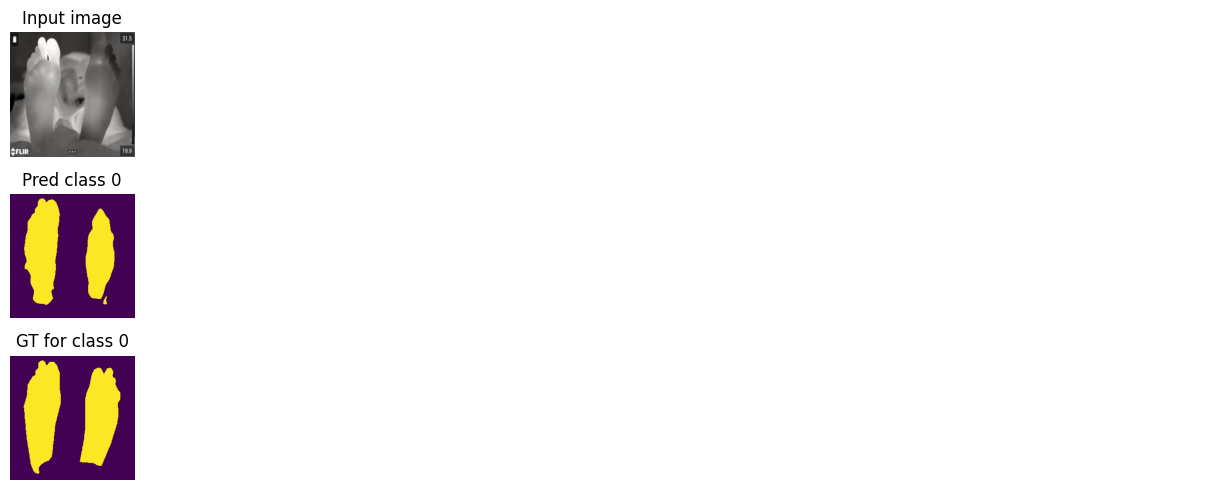

Train loss: 0.19751 | Time: 2m 42s | Val loss: 0.15663
Train_DICE_avg: 0.83706 | Train_Jaccard_avg: 0.72753 | Train_Sensitivity_avg: 0.85867 | Train_Specificity_avg: 0.93942 
Class 0 - Train_DICE: 0.83706 | Train_Jaccard: 0.72753 | Train_Sensitivity: 0.85867 | Train_Specificity: 0.93942 
Val_DICE_avg: 0.86848 | Val_Jaccard_avg: 0.77294 | Val_Sensitivity_avg: 0.90651 | Val_Specificity_avg: 0.94249 
Class 0 - Val_DICE: 0.86848 | Val_Jaccard: 0.77294 | Val_Sensitivity: 0.90651 | Val_Specificity: 0.94249 

Epoch 42/61


Validation Epoch 42/61: 100%|██████████| 2/2 [00:00<00:00,  3.18it/s]


Train loss: 0.19121 | Time: 2m 46s | Val loss: 0.15944
Train_DICE_avg: 0.84276 | Train_Jaccard_avg: 0.73622 | Train_Sensitivity_avg: 0.86821 | Train_Specificity_avg: 0.94004 
Class 0 - Train_DICE: 0.84276 | Train_Jaccard: 0.73622 | Train_Sensitivity: 0.86821 | Train_Specificity: 0.94004 
Val_DICE_avg: 0.86644 | Val_Jaccard_avg: 0.76989 | Val_Sensitivity_avg: 0.89867 | Val_Specificity_avg: 0.94270 
Class 0 - Val_DICE: 0.86644 | Val_Jaccard: 0.76989 | Val_Sensitivity: 0.89867 | Val_Specificity: 0.94270 

Epoch 43/61


Validation Epoch 43/61: 100%|██████████| 2/2 [00:00<00:00,  3.17it/s]


Train loss: 0.18908 | Time: 2m 50s | Val loss: 0.15497
Train_DICE_avg: 0.84306 | Train_Jaccard_avg: 0.73649 | Train_Sensitivity_avg: 0.87143 | Train_Specificity_avg: 0.94096 
Class 0 - Train_DICE: 0.84306 | Train_Jaccard: 0.73649 | Train_Sensitivity: 0.87143 | Train_Specificity: 0.94096 
Val_DICE_avg: 0.87518 | Val_Jaccard_avg: 0.78319 | Val_Sensitivity_avg: 0.89409 | Val_Specificity_avg: 0.94860 
Class 0 - Val_DICE: 0.87518 | Val_Jaccard: 0.78319 | Val_Sensitivity: 0.89409 | Val_Specificity: 0.94860 

Epoch 44/61


Validation Epoch 44/61: 100%|██████████| 2/2 [00:00<00:00,  2.95it/s]


Train loss: 0.18618 | Time: 2m 54s | Val loss: 0.15443
Train_DICE_avg: 0.84665 | Train_Jaccard_avg: 0.74124 | Train_Sensitivity_avg: 0.87211 | Train_Specificity_avg: 0.94144 
Class 0 - Train_DICE: 0.84665 | Train_Jaccard: 0.74124 | Train_Sensitivity: 0.87211 | Train_Specificity: 0.94144 
Val_DICE_avg: 0.87488 | Val_Jaccard_avg: 0.78285 | Val_Sensitivity_avg: 0.89208 | Val_Specificity_avg: 0.94913 
Class 0 - Val_DICE: 0.87488 | Val_Jaccard: 0.78285 | Val_Sensitivity: 0.89208 | Val_Specificity: 0.94913 

Epoch 45/61


Validation Epoch 45/61: 100%|██████████| 2/2 [00:00<00:00,  3.17it/s]


Train loss: 0.18170 | Time: 2m 58s | Val loss: 0.15160
Train_DICE_avg: 0.84982 | Train_Jaccard_avg: 0.74642 | Train_Sensitivity_avg: 0.87640 | Train_Specificity_avg: 0.94265 
Class 0 - Train_DICE: 0.84982 | Train_Jaccard: 0.74642 | Train_Sensitivity: 0.87640 | Train_Specificity: 0.94265 
Val_DICE_avg: 0.87537 | Val_Jaccard_avg: 0.78349 | Val_Sensitivity_avg: 0.89836 | Val_Specificity_avg: 0.94699 
Class 0 - Val_DICE: 0.87537 | Val_Jaccard: 0.78349 | Val_Sensitivity: 0.89836 | Val_Specificity: 0.94699 

Epoch 46/61


Validation Epoch 46/61: 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]


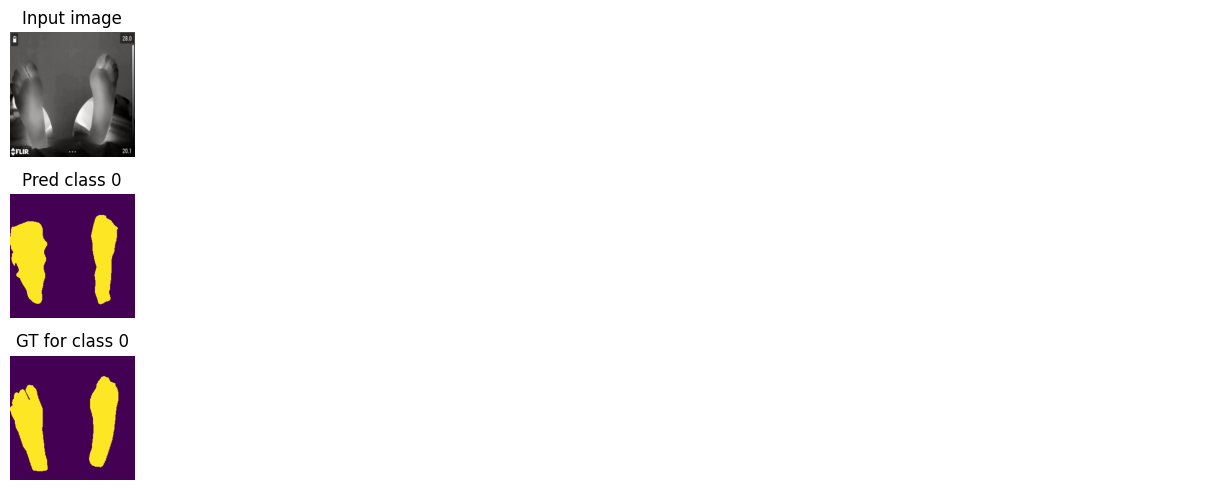

Train loss: 0.18010 | Time: 3m 2s | Val loss: 0.14811
Train_DICE_avg: 0.84927 | Train_Jaccard_avg: 0.74585 | Train_Sensitivity_avg: 0.88194 | Train_Specificity_avg: 0.94074 
Class 0 - Train_DICE: 0.84927 | Train_Jaccard: 0.74585 | Train_Sensitivity: 0.88194 | Train_Specificity: 0.94074 
Val_DICE_avg: 0.87339 | Val_Jaccard_avg: 0.78036 | Val_Sensitivity_avg: 0.91109 | Val_Specificity_avg: 0.94260 
Class 0 - Val_DICE: 0.87339 | Val_Jaccard: 0.78036 | Val_Sensitivity: 0.91109 | Val_Specificity: 0.94260 

Epoch 47/61


Validation Epoch 47/61: 100%|██████████| 2/2 [00:00<00:00,  2.96it/s]


Train loss: 0.17821 | Time: 3m 6s | Val loss: 0.14622
Train_DICE_avg: 0.85179 | Train_Jaccard_avg: 0.74891 | Train_Sensitivity_avg: 0.87959 | Train_Specificity_avg: 0.94196 
Class 0 - Train_DICE: 0.85179 | Train_Jaccard: 0.74891 | Train_Sensitivity: 0.87959 | Train_Specificity: 0.94196 
Val_DICE_avg: 0.87193 | Val_Jaccard_avg: 0.77797 | Val_Sensitivity_avg: 0.91774 | Val_Specificity_avg: 0.94033 
Class 0 - Val_DICE: 0.87193 | Val_Jaccard: 0.77797 | Val_Sensitivity: 0.91774 | Val_Specificity: 0.94033 

Epoch 48/61


Validation Epoch 48/61: 100%|██████████| 2/2 [00:00<00:00,  3.18it/s]


Train loss: 0.17771 | Time: 3m 10s | Val loss: 0.14596
Train_DICE_avg: 0.85091 | Train_Jaccard_avg: 0.74759 | Train_Sensitivity_avg: 0.88152 | Train_Specificity_avg: 0.94124 
Class 0 - Train_DICE: 0.85091 | Train_Jaccard: 0.74759 | Train_Sensitivity: 0.88152 | Train_Specificity: 0.94124 
Val_DICE_avg: 0.87726 | Val_Jaccard_avg: 0.78646 | Val_Sensitivity_avg: 0.90706 | Val_Specificity_avg: 0.94638 
Class 0 - Val_DICE: 0.87726 | Val_Jaccard: 0.78646 | Val_Sensitivity: 0.90706 | Val_Specificity: 0.94638 

Epoch 49/61


Validation Epoch 49/61: 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]


Train loss: 0.17210 | Time: 3m 14s | Val loss: 0.14490
Train_DICE_avg: 0.85606 | Train_Jaccard_avg: 0.75531 | Train_Sensitivity_avg: 0.88661 | Train_Specificity_avg: 0.94210 
Class 0 - Train_DICE: 0.85606 | Train_Jaccard: 0.75531 | Train_Sensitivity: 0.88661 | Train_Specificity: 0.94210 
Val_DICE_avg: 0.88153 | Val_Jaccard_avg: 0.79298 | Val_Sensitivity_avg: 0.90071 | Val_Specificity_avg: 0.95045 
Class 0 - Val_DICE: 0.88153 | Val_Jaccard: 0.79298 | Val_Sensitivity: 0.90071 | Val_Specificity: 0.95045 

Epoch 50/61


Validation Epoch 50/61: 100%|██████████| 2/2 [00:00<00:00,  2.99it/s]


Train loss: 0.17290 | Time: 3m 18s | Val loss: 0.13960
Train_DICE_avg: 0.85413 | Train_Jaccard_avg: 0.75228 | Train_Sensitivity_avg: 0.88593 | Train_Specificity_avg: 0.94173 
Class 0 - Train_DICE: 0.85413 | Train_Jaccard: 0.75228 | Train_Sensitivity: 0.88593 | Train_Specificity: 0.94173 
Val_DICE_avg: 0.88227 | Val_Jaccard_avg: 0.79378 | Val_Sensitivity_avg: 0.91406 | Val_Specificity_avg: 0.94723 
Class 0 - Val_DICE: 0.88227 | Val_Jaccard: 0.79378 | Val_Sensitivity: 0.91406 | Val_Specificity: 0.94723 

Epoch 51/61


Validation Epoch 51/61: 100%|██████████| 2/2 [00:00<00:00,  3.17it/s]


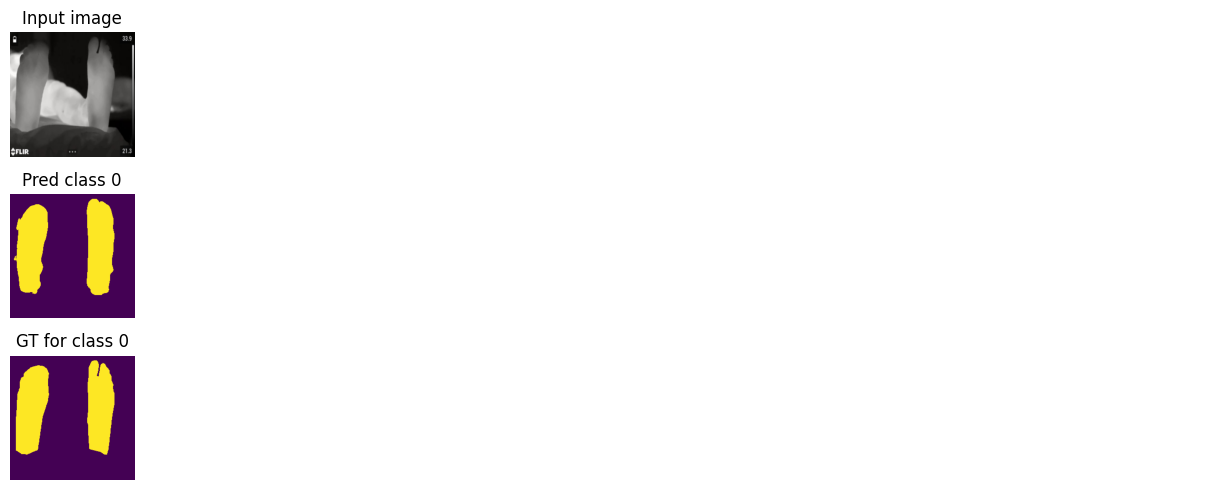

Train loss: 0.17044 | Time: 3m 22s | Val loss: 0.13780
Train_DICE_avg: 0.85601 | Train_Jaccard_avg: 0.75366 | Train_Sensitivity_avg: 0.89084 | Train_Specificity_avg: 0.94130 
Class 0 - Train_DICE: 0.85601 | Train_Jaccard: 0.75366 | Train_Sensitivity: 0.89084 | Train_Specificity: 0.94130 
Val_DICE_avg: 0.88246 | Val_Jaccard_avg: 0.79382 | Val_Sensitivity_avg: 0.91819 | Val_Specificity_avg: 0.94651 
Class 0 - Val_DICE: 0.88246 | Val_Jaccard: 0.79382 | Val_Sensitivity: 0.91819 | Val_Specificity: 0.94651 

Epoch 52/61


Validation Epoch 52/61: 100%|██████████| 2/2 [00:00<00:00,  3.22it/s]


Train loss: 0.16595 | Time: 3m 26s | Val loss: 0.13948
Train_DICE_avg: 0.86000 | Train_Jaccard_avg: 0.76074 | Train_Sensitivity_avg: 0.89720 | Train_Specificity_avg: 0.94197 
Class 0 - Train_DICE: 0.86000 | Train_Jaccard: 0.76074 | Train_Sensitivity: 0.89720 | Train_Specificity: 0.94197 
Val_DICE_avg: 0.88546 | Val_Jaccard_avg: 0.79850 | Val_Sensitivity_avg: 0.90662 | Val_Specificity_avg: 0.95114 
Class 0 - Val_DICE: 0.88546 | Val_Jaccard: 0.79850 | Val_Sensitivity: 0.90662 | Val_Specificity: 0.95114 

Epoch 53/61


Validation Epoch 53/61: 100%|██████████| 2/2 [00:00<00:00,  2.88it/s]


Train loss: 0.16566 | Time: 3m 30s | Val loss: 0.13896
Train_DICE_avg: 0.86025 | Train_Jaccard_avg: 0.76120 | Train_Sensitivity_avg: 0.89320 | Train_Specificity_avg: 0.94310 
Class 0 - Train_DICE: 0.86025 | Train_Jaccard: 0.76120 | Train_Sensitivity: 0.89320 | Train_Specificity: 0.94310 
Val_DICE_avg: 0.88634 | Val_Jaccard_avg: 0.80008 | Val_Sensitivity_avg: 0.90538 | Val_Specificity_avg: 0.95208 
Class 0 - Val_DICE: 0.88634 | Val_Jaccard: 0.80008 | Val_Sensitivity: 0.90538 | Val_Specificity: 0.95208 

Epoch 54/61


Validation Epoch 54/61: 100%|██████████| 2/2 [00:00<00:00,  3.10it/s]


Train loss: 0.16518 | Time: 3m 34s | Val loss: 0.13739
Train_DICE_avg: 0.86014 | Train_Jaccard_avg: 0.76028 | Train_Sensitivity_avg: 0.89595 | Train_Specificity_avg: 0.94190 
Class 0 - Train_DICE: 0.86014 | Train_Jaccard: 0.76028 | Train_Sensitivity: 0.89595 | Train_Specificity: 0.94190 
Val_DICE_avg: 0.88376 | Val_Jaccard_avg: 0.79606 | Val_Sensitivity_avg: 0.91398 | Val_Specificity_avg: 0.94801 
Class 0 - Val_DICE: 0.88376 | Val_Jaccard: 0.79606 | Val_Sensitivity: 0.91398 | Val_Specificity: 0.94801 

Epoch 55/61


Validation Epoch 55/61: 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]


Train loss: 0.16771 | Time: 3m 38s | Val loss: 0.13575
Train_DICE_avg: 0.85600 | Train_Jaccard_avg: 0.75606 | Train_Sensitivity_avg: 0.89746 | Train_Specificity_avg: 0.94077 
Class 0 - Train_DICE: 0.85600 | Train_Jaccard: 0.75606 | Train_Sensitivity: 0.89746 | Train_Specificity: 0.94077 
Val_DICE_avg: 0.88162 | Val_Jaccard_avg: 0.79246 | Val_Sensitivity_avg: 0.92141 | Val_Specificity_avg: 0.94401 
Class 0 - Val_DICE: 0.88162 | Val_Jaccard: 0.79246 | Val_Sensitivity: 0.92141 | Val_Specificity: 0.94401 

Epoch 56/61


Validation Epoch 56/61: 100%|██████████| 2/2 [00:00<00:00,  3.02it/s]


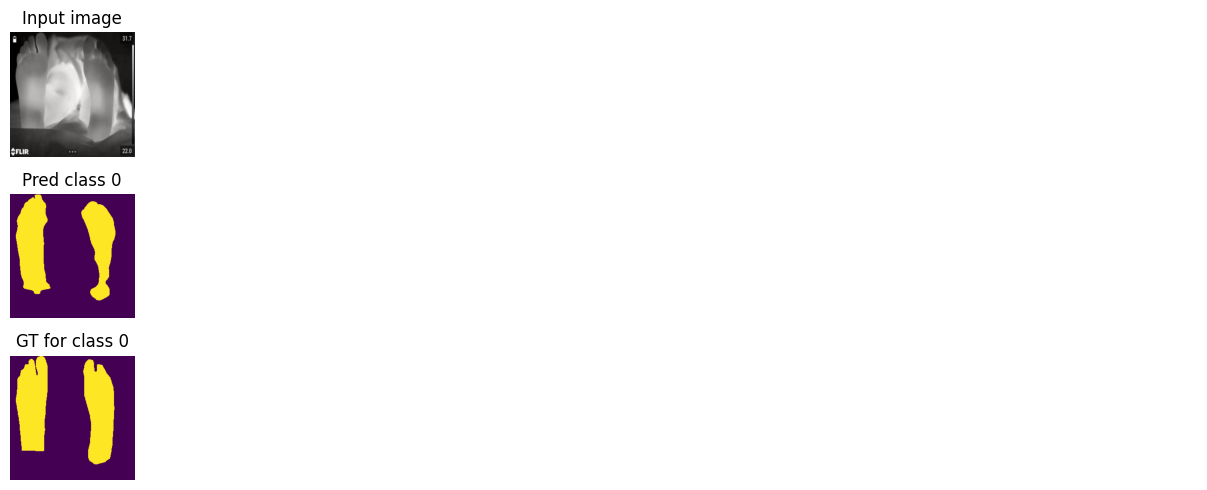

Train loss: 0.16380 | Time: 3m 42s | Val loss: 0.13475
Train_DICE_avg: 0.86048 | Train_Jaccard_avg: 0.76218 | Train_Sensitivity_avg: 0.89798 | Train_Specificity_avg: 0.94193 
Class 0 - Train_DICE: 0.86048 | Train_Jaccard: 0.76218 | Train_Sensitivity: 0.89798 | Train_Specificity: 0.94193 
Val_DICE_avg: 0.88254 | Val_Jaccard_avg: 0.79385 | Val_Sensitivity_avg: 0.92155 | Val_Specificity_avg: 0.94443 
Class 0 - Val_DICE: 0.88254 | Val_Jaccard: 0.79385 | Val_Sensitivity: 0.92155 | Val_Specificity: 0.94443 

Epoch 57/61


Validation Epoch 57/61: 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]


Train loss: 0.15917 | Time: 3m 46s | Val loss: 0.13449
Train_DICE_avg: 0.86575 | Train_Jaccard_avg: 0.76865 | Train_Sensitivity_avg: 0.90226 | Train_Specificity_avg: 0.94337 
Class 0 - Train_DICE: 0.86575 | Train_Jaccard: 0.76865 | Train_Sensitivity: 0.90226 | Train_Specificity: 0.94337 
Val_DICE_avg: 0.88311 | Val_Jaccard_avg: 0.79470 | Val_Sensitivity_avg: 0.91994 | Val_Specificity_avg: 0.94548 
Class 0 - Val_DICE: 0.88311 | Val_Jaccard: 0.79470 | Val_Sensitivity: 0.91994 | Val_Specificity: 0.94548 

Epoch 58/61


Validation Epoch 58/61: 100%|██████████| 2/2 [00:00<00:00,  3.18it/s]


Train loss: 0.16168 | Time: 3m 50s | Val loss: 0.13349
Train_DICE_avg: 0.86229 | Train_Jaccard_avg: 0.76458 | Train_Sensitivity_avg: 0.89608 | Train_Specificity_avg: 0.94307 
Class 0 - Train_DICE: 0.86229 | Train_Jaccard: 0.76458 | Train_Sensitivity: 0.89608 | Train_Specificity: 0.94307 
Val_DICE_avg: 0.88446 | Val_Jaccard_avg: 0.79681 | Val_Sensitivity_avg: 0.91940 | Val_Specificity_avg: 0.94620 
Class 0 - Val_DICE: 0.88446 | Val_Jaccard: 0.79681 | Val_Sensitivity: 0.91940 | Val_Specificity: 0.94620 

Epoch 59/61


Validation Epoch 59/61: 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]


Train loss: 0.15945 | Time: 3m 54s | Val loss: 0.13222
Train_DICE_avg: 0.86455 | Train_Jaccard_avg: 0.76662 | Train_Sensitivity_avg: 0.90064 | Train_Specificity_avg: 0.94353 
Class 0 - Train_DICE: 0.86455 | Train_Jaccard: 0.76662 | Train_Sensitivity: 0.90064 | Train_Specificity: 0.94353 
Val_DICE_avg: 0.88621 | Val_Jaccard_avg: 0.79945 | Val_Sensitivity_avg: 0.92037 | Val_Specificity_avg: 0.94728 
Class 0 - Val_DICE: 0.88621 | Val_Jaccard: 0.79945 | Val_Sensitivity: 0.92037 | Val_Specificity: 0.94728 

Epoch 60/61


Validation Epoch 60/61: 100%|██████████| 2/2 [00:00<00:00,  3.17it/s]


Train loss: 0.16086 | Time: 3m 58s | Val loss: 0.13239
Train_DICE_avg: 0.86271 | Train_Jaccard_avg: 0.76417 | Train_Sensitivity_avg: 0.89896 | Train_Specificity_avg: 0.94280 
Class 0 - Train_DICE: 0.86271 | Train_Jaccard: 0.76417 | Train_Sensitivity: 0.89896 | Train_Specificity: 0.94280 
Val_DICE_avg: 0.88691 | Val_Jaccard_avg: 0.80067 | Val_Sensitivity_avg: 0.91809 | Val_Specificity_avg: 0.94872 
Class 0 - Val_DICE: 0.88691 | Val_Jaccard: 0.80067 | Val_Sensitivity: 0.91809 | Val_Specificity: 0.94872 

Epoch 61/61


Validation Epoch 61/61: 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]


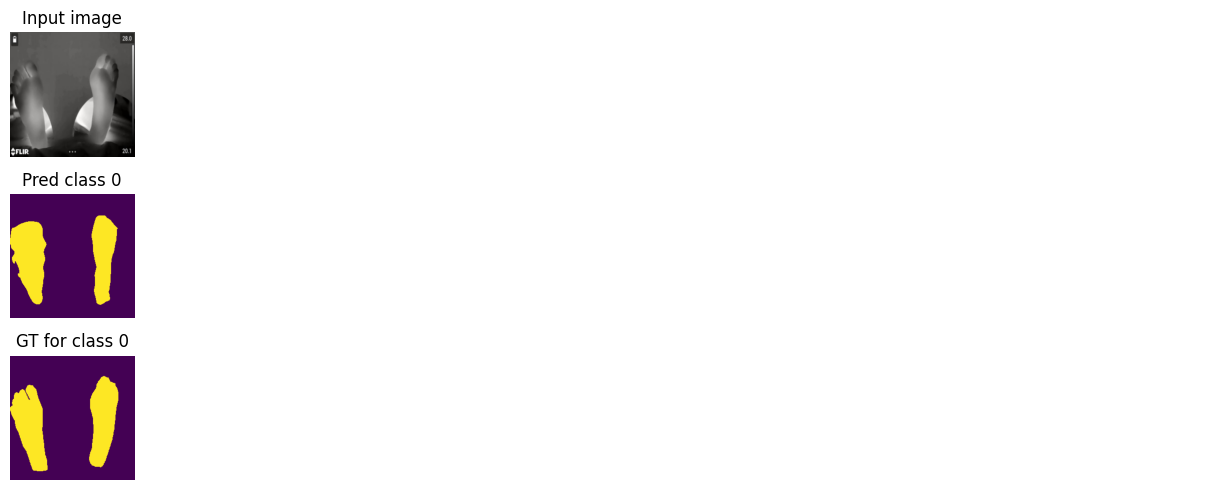

Train loss: 0.15413 | Time: 4m 2s | Val loss: 0.13130
Train_DICE_avg: 0.86969 | Train_Jaccard_avg: 0.77515 | Train_Sensitivity_avg: 0.90445 | Train_Specificity_avg: 0.94443 
Class 0 - Train_DICE: 0.86969 | Train_Jaccard: 0.77515 | Train_Sensitivity: 0.90445 | Train_Specificity: 0.94443 
Val_DICE_avg: 0.88657 | Val_Jaccard_avg: 0.80030 | Val_Sensitivity_avg: 0.92087 | Val_Specificity_avg: 0.94815 
Class 0 - Val_DICE: 0.88657 | Val_Jaccard: 0.80030 | Val_Sensitivity: 0.92087 | Val_Specificity: 0.94815 


Training DICE,▁▁▂▃▃▄▄▄▅▅▅▅▅▅▅▆▆▆▆▆▆▆▆▇▇▇▇▇████████████
Training Jaccard,▁▁▂▃▃▄▄▄▅▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇██████████
Training Loss,█▇▇▆▆▅▅▄▄▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁
Training Sensitivity,▁▁▂▃▃▄▄▄▅▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇▇█████████████
Training Specificity,▁▇▇█▇▇▄▅▅▆▅▄▅▅▄▆▆▅▅▅▆▆▆▆▆▇▇▇▇▇▇▇▇█▇▇████
Validation DICE,▁▃▄▅▄▄▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇███████████████
Validation Jaccard,▁▂▃▄▄▄▄▄▅▅▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇██████████████
Validation Loss,██▆▅▅▅▄▄▄▃▄▃▃▃▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Validation Sensitivity,▁▃▅▅▃▃▃▅▆▅▆▅▆▆▆▆▇▇▇▇▇▇▇▇▇▇██████████████
Validation Specificity,▆▃▁▃▅██▅▇▆▄▅▄▄▅▅▄▅▆▅▅▅▅▆▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅
Training DICE,0.86969



Training complete!


In [ ]:
trainer = SegmentationModel_Trainer(train_loader=train_dataset,valid_loader=valid_dataset,config=config)
trainer.start()

In [20]:
model = DeepLabV3Plus(in_channels=config["Input size"][0],out_channels=config["Number of classes"], final_activation=config["Activation function"])
state_dict = torch.load('./models/best_model(4).pt', weights_only=True)
model.load_state_dict(state_dict)

<All keys matched successfully>

In [21]:
PerformanceModels(model=model,test_dataset=test_dataset,config=config)

Testing model's performance: 100%|██████████| 1/1 [00:00<00:00,  3.15it/s]


Global Performance Metrics:
Loss mean: 0.15744, std: 0.00000
Dice Coefficient mean: 0.86945, std: 0.09489
Jaccard Index mean: 0.77927, std: 0.12311
Sensitivity mean: 0.86830, std: 0.09395
Specificity mean: 0.96864, std: 0.02600

Per-Class Performance Metrics:

Class 0:
Dice mean: 0.86945, std: 0.09489
Jaccard mean: 0.77927, std: 0.12311
Sensitivity mean: 0.86830, std: 0.09395
Specificity mean: 0.96864, std: 0.02600
